# Table of Contents [todo]
- Config
- Initial Design
    - Results of inital design
    - Inital design but with population of 50 and only 50 cities
- Modifying stage - This stage follows suggested procedure
    - Modifying parameters such as population size, probalities
    - Modifying selection methods, mutation methods, crossover methods
- Best algorithms and explanations on them (CNTRL F "Results of the experiments, and the best algorithms for minimizing fitness")
- Best design and results -
- Conclusion



    

## About this Jupyter Notebook
This notebook contains answers to the submission requirements but also contains the steps involved in the suggested procedure. 

The steps involved in my work flow is first using the intial algorithm and then testing it.
After that I use 50 cities and test parameters, then selection methods, crossover methods and then mutation methods.






# Config

In [10]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap.tools import HallOfFame

import csv
import array
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

These steps involve setting up/config

In [11]:
class TravelingSalesmanProblem:
    """This class encapsulates the Traveling Salesman Problem.
    City coordinates are read from a file and distance matrix is calculated.
    The data is serialized to disk.
    The total distance can be calculated for a path represented by a list of city indices.
    A plot can be created for a path represented by a list of city indices.

    :param name: The name of the TSPLIB problem, e.g. 'burma14' or 'bayg29'.
    """

    def __init__(self, name):
        """
        Creates an instance of a TSP

        :param name: name of the TSP problem
        """

        # initialize instance variables:
        self.name = name
        self.locations = []
        self.distances = []
        self.tspSize = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        returns the length of the underlying TSP
        :return: the length of the underlying TSP (number of cities)
        """
        return self.tspSize

    def __initData(self):
        """Reads the data by calling __create_data() to prepare it
        """
        self.__createData()

        # set the problem 'size':
        self.tspSize = len(self.locations)
    def __createData(self):
        """Reads the desired TSP file, extracts the city coordinates, calculates the distances
        between every two cities and uses them to populate a distance matrix (two-dimensional array).
        """
        self.locations = []

        # open whitespace-delimited file and read lines from it:
        with open(self.name + ".tsp") as f:
            reader = csv.reader(f, delimiter="\t", skipinitialspace=True)

            # read data lines until the end of the file:
            for row in reader:
                if row:
                    row_data = [float(val) for val in row[0].split()]
                    self.locations.append(np.asarray(row_data, dtype=np.float32))
                else:
                    break

        # set the problem 'size':
        self.tspSize = len(self.locations)

        # print data:
        print("length = {}, locations = {}".format(self.tspSize, self.locations))

        # initialize distance matrix by filling it with 0's:
        self.distances = [[0] * self.tspSize for _ in range(self.tspSize)]

        # populate the distance matrix with calculated distances:
        for i in range(self.tspSize):
            for j in range(i + 1, self.tspSize):
                # calculate euclidean distance between two ndarrays:
                distance = np.linalg.norm(self.locations[j] - self.locations[i])
                self.distances[i][j] = distance
                self.distances[j][i] = distance
                print("{}, {}: location1 = {}, location2 = {} => distance = {}".format(i, j, self.locations[i], self.locations[j], distance))



    def getTotalDistance(self, indices):
        """Calculates the total distance of the path described by the given indices of the cities

        :param indices: A list of ordered city indices describing the given path.
        :return: total distance of the path described by the given indices
        """
        # distance between th elast and first city:
        distance = self.distances[indices[-1]][indices[0]]

        # add the distance between each pair of consequtive cities:
        for i in range(len(indices) - 1):
            distance += self.distances[indices[i]][indices[i + 1]]

        return distance

    def plotData(self, indices):
        """plots the path described by the given indices of the cities

        :param indices: A list of ordered city indices describing the given path.
        :return: the resulting plot
        """

        # plot the dots representing the cities:
        plt.scatter(*zip(*self.locations), marker='.', color='red')

        # create a list of the corresponding city locations:
        locs = [self.locations[i] for i in indices]
        locs.append(locs[0])

        # plot a line between each pair of consequtive cities:
        plt.plot(*zip(*locs), linestyle='-', color='blue')

        return plt

In [12]:
# create the desired traveling salesman problem instace:
TSP_NAME = "d200-7"  # name of problem
tsp = TravelingSalesmanProblem(TSP_NAME)
tsp_lenth = len(tsp)
print(tsp_lenth)

# Genetic Algorithm constants:
POPULATION_SIZE = 300
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

length = 200, locations = [array([0.577415, 0.979374], dtype=float32), array([0.450028, 0.663745], dtype=float32), array([0.512647, 0.514206], dtype=float32), array([0.898622, 0.974126], dtype=float32), array([0.739949, 0.147543], dtype=float32), array([0.187987, 1.014345], dtype=float32), array([0.200212, 0.303877], dtype=float32), array([1.126736, 0.410751], dtype=float32), array([0.901877, 0.42644 ], dtype=float32), array([1.355639, 0.757939], dtype=float32), array([0.633797, 0.550195], dtype=float32), array([0.526203, 1.176042], dtype=float32), array([0.697197, 1.252739], dtype=float32), array([0.37523 , 1.092364], dtype=float32), array([0.229429, 0.76595 ], dtype=float32), array([1.222864, 0.672509], dtype=float32), array([1.278286, 1.226356], dtype=float32), array([0.743149, 0.488997], dtype=float32), array([0.22513 , 0.960315], dtype=float32), array([0.725579, 0.630836], dtype=float32), array([0.916381, 0.37342 ], dtype=float32), array([0.803347, 1.271614], dtype=float32), array

6, 160: location1 = [0.200212 0.303877], location2 = [0.833911 0.829788] => distance = 0.823502779006958
6, 161: location1 = [0.200212 0.303877], location2 = [0.671117 0.734309] => distance = 0.6379837393760681
6, 162: location1 = [0.200212 0.303877], location2 = [0.37656  0.964851] => distance = 0.6840944886207581
6, 163: location1 = [0.200212 0.303877], location2 = [0.084563 0.506787] => distance = 0.23355333507061005
6, 164: location1 = [0.200212 0.303877], location2 = [0.753524 0.435165] => distance = 0.5686745047569275
6, 165: location1 = [0.200212 0.303877], location2 = [0.600481 0.152381] => distance = 0.4279792904853821
6, 166: location1 = [0.200212 0.303877], location2 = [0.447369 0.354651] => distance = 0.252318412065506
6, 167: location1 = [0.200212 0.303877], location2 = [0.406432 0.641105] => distance = 0.395283967256546
6, 168: location1 = [0.200212 0.303877], location2 = [0.496192 0.578574] => distance = 0.4038101136684418
6, 169: location1 = [0.200212 0.303877], locatio

18, 120: location1 = [0.22513  0.960315], location2 = [0.40809 0.65246] => distance = 0.35811877250671387
18, 121: location1 = [0.22513  0.960315], location2 = [0.16487  0.762661] => distance = 0.20663584768772125
18, 122: location1 = [0.22513  0.960315], location2 = [0.632952 0.688664] => distance = 0.4900132417678833
18, 123: location1 = [0.22513  0.960315], location2 = [0.531648 0.432763] => distance = 0.6101347208023071
18, 124: location1 = [0.22513  0.960315], location2 = [0.468814 0.179104] => distance = 0.818335235118866
18, 125: location1 = [0.22513  0.960315], location2 = [0.479614 0.678464] => distance = 0.3797394931316376
18, 126: location1 = [0.22513  0.960315], location2 = [0.478459 0.60158 ] => distance = 0.43916553258895874
18, 127: location1 = [0.22513  0.960315], location2 = [0.688786 0.777561] => distance = 0.49837321043014526
18, 128: location1 = [0.22513  0.960315], location2 = [0.516991 0.368442] => distance = 0.6599215865135193
18, 129: location1 = [0.22513  0.960

26, 165: location1 = [0.848621 0.480769], location2 = [0.600481 0.152381] => distance = 0.4115971028804779
26, 166: location1 = [0.848621 0.480769], location2 = [0.447369 0.354651] => distance = 0.4206054210662842
26, 167: location1 = [0.848621 0.480769], location2 = [0.406432 0.641105] => distance = 0.4703602194786072
26, 168: location1 = [0.848621 0.480769], location2 = [0.496192 0.578574] => distance = 0.3657485544681549
26, 169: location1 = [0.848621 0.480769], location2 = [0.78686  0.562527] => distance = 0.10246361792087555
26, 170: location1 = [0.848621 0.480769], location2 = [0.845883 0.650345] => distance = 0.16959811747074127
26, 171: location1 = [0.848621 0.480769], location2 = [0.649302 0.575686] => distance = 0.22076524794101715
26, 172: location1 = [0.848621 0.480769], location2 = [0.278204 0.426835] => distance = 0.572961151599884
26, 173: location1 = [0.848621 0.480769], location2 = [0.400801 0.443865] => distance = 0.44933804869651794
26, 174: location1 = [0.848621 0.4

36, 142: location1 = [1.188285 1.038988], location2 = [0.827015 0.660732] => distance = 0.5230618119239807
36, 143: location1 = [1.188285 1.038988], location2 = [0.659496 0.718068] => distance = 0.6185526847839355
36, 144: location1 = [1.188285 1.038988], location2 = [0.716308 0.800961] => distance = 0.5286011099815369
36, 145: location1 = [1.188285 1.038988], location2 = [0.418872 0.654621] => distance = 0.8600780963897705
36, 146: location1 = [1.188285 1.038988], location2 = [0.268169 0.631   ] => distance = 1.0065126419067383
36, 147: location1 = [1.188285 1.038988], location2 = [0.738609 0.605353] => distance = 0.6246981620788574
36, 148: location1 = [1.188285 1.038988], location2 = [0.790976 0.389827] => distance = 0.7610942721366882
36, 149: location1 = [1.188285 1.038988], location2 = [0.73418  0.792575] => distance = 0.5166534185409546
36, 150: location1 = [1.188285 1.038988], location2 = [0.532398 0.672336] => distance = 0.7514129877090454
36, 151: location1 = [1.188285 1.0389

44, 80: location1 = [0.609023 1.298555], location2 = [0.543309 0.203231] => distance = 1.0972936153411865
44, 81: location1 = [0.609023 1.298555], location2 = [0.434454 1.175386] => distance = 0.2136467844247818
44, 82: location1 = [0.609023 1.298555], location2 = [0.224718 0.19352 ] => distance = 1.1699541807174683
44, 83: location1 = [0.609023 1.298555], location2 = [1.329618 0.188191] => distance = 1.323693871498108
44, 84: location1 = [0.609023 1.298555], location2 = [1.240578 0.286324] => distance = 1.19309401512146
44, 85: location1 = [0.609023 1.298555], location2 = [0.202053 0.858412] => distance = 0.5994584560394287
44, 86: location1 = [0.609023 1.298555], location2 = [0.629605 1.388557] => distance = 0.09232534468173981
44, 87: location1 = [0.609023 1.298555], location2 = [0.07774  0.502357] => distance = 0.9571796655654907
44, 88: location1 = [0.609023 1.298555], location2 = [1.233603 0.385038] => distance = 1.106622576713562
44, 89: location1 = [0.609023 1.298555], location

51, 145: location1 = [1.284166 0.962447], location2 = [0.418872 0.654621] => distance = 0.9184173941612244
51, 146: location1 = [1.284166 0.962447], location2 = [0.268169 0.631   ] => distance = 1.068693995475769
51, 147: location1 = [1.284166 0.962447], location2 = [0.738609 0.605353] => distance = 0.6520341634750366
51, 148: location1 = [1.284166 0.962447], location2 = [0.790976 0.389827] => distance = 0.755731463432312
51, 149: location1 = [1.284166 0.962447], location2 = [0.73418  0.792575] => distance = 0.5756223201751709
51, 150: location1 = [1.284166 0.962447], location2 = [0.532398 0.672336] => distance = 0.8058035969734192
51, 151: location1 = [1.284166 0.962447], location2 = [0.498445 0.786387] => distance = 0.8052046298980713
51, 152: location1 = [1.284166 0.962447], location2 = [0.497868 0.595128] => distance = 0.8678638935089111
51, 153: location1 = [1.284166 0.962447], location2 = [0.330873 0.794006] => distance = 0.9680598378181458
51, 154: location1 = [1.284166 0.962447

61, 82: location1 = [0.507112 0.078549], location2 = [0.224718 0.19352 ] => distance = 0.3049011528491974
61, 83: location1 = [0.507112 0.078549], location2 = [1.329618 0.188191] => distance = 0.8297815322875977
61, 84: location1 = [0.507112 0.078549], location2 = [1.240578 0.286324] => distance = 0.762327253818512
61, 85: location1 = [0.507112 0.078549], location2 = [0.202053 0.858412] => distance = 0.8374051451683044
61, 86: location1 = [0.507112 0.078549], location2 = [0.629605 1.388557] => distance = 1.3157223463058472
61, 87: location1 = [0.507112 0.078549], location2 = [0.07774  0.502357] => distance = 0.6033022403717041
61, 88: location1 = [0.507112 0.078549], location2 = [1.233603 0.385038] => distance = 0.7884951233863831
61, 89: location1 = [0.507112 0.078549], location2 = [0.110086 0.127428] => distance = 0.40002354979515076
61, 90: location1 = [0.507112 0.078549], location2 = [0.671834 0.254253] => distance = 0.24084272980690002
61, 91: location1 = [0.507112 0.078549], loca

71, 163: location1 = [0.577718 1.14428 ], location2 = [0.084563 0.506787] => distance = 0.8059771060943604
71, 164: location1 = [0.577718 1.14428 ], location2 = [0.753524 0.435165] => distance = 0.7305831909179688
71, 165: location1 = [0.577718 1.14428 ], location2 = [0.600481 0.152381] => distance = 0.9921600818634033
71, 166: location1 = [0.577718 1.14428 ], location2 = [0.447369 0.354651] => distance = 0.8003154397010803
71, 167: location1 = [0.577718 1.14428 ], location2 = [0.406432 0.641105] => distance = 0.5315297842025757
71, 168: location1 = [0.577718 1.14428 ], location2 = [0.496192 0.578574] => distance = 0.5715503096580505
71, 169: location1 = [0.577718 1.14428 ], location2 = [0.78686  0.562527] => distance = 0.6182045340538025
71, 170: location1 = [0.577718 1.14428 ], location2 = [0.845883 0.650345] => distance = 0.5620357394218445
71, 171: location1 = [0.577718 1.14428 ], location2 = [0.649302 0.575686] => distance = 0.5730823278427124
71, 172: location1 = [0.577718 1.1442

83, 137: location1 = [1.329618 0.188191], location2 = [0.442777 0.626474] => distance = 0.9892314672470093
83, 138: location1 = [1.329618 0.188191], location2 = [0.405721 0.693899] => distance = 1.0532455444335938
83, 139: location1 = [1.329618 0.188191], location2 = [0.490671 0.326439] => distance = 0.8502614498138428
83, 140: location1 = [1.329618 0.188191], location2 = [0.388784 0.110089] => distance = 0.9440702199935913
83, 141: location1 = [1.329618 0.188191], location2 = [0.767636 0.569745] => distance = 0.6792696118354797
83, 142: location1 = [1.329618 0.188191], location2 = [0.827015 0.660732] => distance = 0.6898584961891174
83, 143: location1 = [1.329618 0.188191], location2 = [0.659496 0.718068] => distance = 0.854302704334259
83, 144: location1 = [1.329618 0.188191], location2 = [0.716308 0.800961] => distance = 0.8669695258140564
83, 145: location1 = [1.329618 0.188191], location2 = [0.418872 0.654621] => distance = 1.0232375860214233
83, 146: location1 = [1.329618 0.18819

95, 133: location1 = [1.214684 0.505715], location2 = [0.900572 0.430452] => distance = 0.3230029046535492
95, 134: location1 = [1.214684 0.505715], location2 = [0.728763 0.290244] => distance = 0.5315514802932739
95, 135: location1 = [1.214684 0.505715], location2 = [0.520516 0.664931] => distance = 0.7121930718421936
95, 136: location1 = [1.214684 0.505715], location2 = [0.333492 0.203816] => distance = 0.9314731955528259
95, 137: location1 = [1.214684 0.505715], location2 = [0.442777 0.626474] => distance = 0.7812958359718323
95, 138: location1 = [1.214684 0.505715], location2 = [0.405721 0.693899] => distance = 0.8305626511573792
95, 139: location1 = [1.214684 0.505715], location2 = [0.490671 0.326439] => distance = 0.7458784580230713
95, 140: location1 = [1.214684 0.505715], location2 = [0.388784 0.110089] => distance = 0.9157678484916687
95, 141: location1 = [1.214684 0.505715], location2 = [0.767636 0.569745] => distance = 0.45161017775535583
95, 142: location1 = [1.214684 0.505

108, 154: location1 = [0.321188 0.435316], location2 = [0.462607 0.679571] => distance = 0.28224071860313416
108, 155: location1 = [0.321188 0.435316], location2 = [0.651777 0.398458] => distance = 0.33263736963272095
108, 156: location1 = [0.321188 0.435316], location2 = [0.770157 0.492061] => distance = 0.4525407552719116
108, 157: location1 = [0.321188 0.435316], location2 = [0.380994 0.41084 ] => distance = 0.06462066620588303
108, 158: location1 = [0.321188 0.435316], location2 = [0.79892  0.843181] => distance = 0.628157377243042
108, 159: location1 = [0.321188 0.435316], location2 = [0.797885 0.480897] => distance = 0.47887122631073
108, 160: location1 = [0.321188 0.435316], location2 = [0.833911 0.829788] => distance = 0.6469103693962097
108, 161: location1 = [0.321188 0.435316], location2 = [0.671117 0.734309] => distance = 0.4602685272693634
108, 162: location1 = [0.321188 0.435316], location2 = [0.37656  0.964851] => distance = 0.5324222445487976
108, 163: location1 = [0.321

125, 152: location1 = [0.479614 0.678464], location2 = [0.497868 0.595128] => distance = 0.08531176298856735
125, 153: location1 = [0.479614 0.678464], location2 = [0.330873 0.794006] => distance = 0.18834498524665833
125, 154: location1 = [0.479614 0.678464], location2 = [0.462607 0.679571] => distance = 0.0170429814606905
125, 155: location1 = [0.479614 0.678464], location2 = [0.651777 0.398458] => distance = 0.32869964838027954
125, 156: location1 = [0.479614 0.678464], location2 = [0.770157 0.492061] => distance = 0.34519749879837036
125, 157: location1 = [0.479614 0.678464], location2 = [0.380994 0.41084 ] => distance = 0.2852165997028351
125, 158: location1 = [0.479614 0.678464], location2 = [0.79892  0.843181] => distance = 0.35928821563720703
125, 159: location1 = [0.479614 0.678464], location2 = [0.797885 0.480897] => distance = 0.37460532784461975
125, 160: location1 = [0.479614 0.678464], location2 = [0.833911 0.829788] => distance = 0.38526007533073425
125, 161: location1 =

144, 173: location1 = [0.716308 0.800961], location2 = [0.400801 0.443865] => distance = 0.4765104651451111
144, 174: location1 = [0.716308 0.800961], location2 = [0.744381 0.90905 ] => distance = 0.11167506128549576
144, 175: location1 = [0.716308 0.800961], location2 = [0.567597 0.304524] => distance = 0.5182322263717651
144, 176: location1 = [0.716308 0.800961], location2 = [0.698985 0.53118 ] => distance = 0.2703365981578827
144, 177: location1 = [0.716308 0.800961], location2 = [0.839657 0.152366] => distance = 0.6602200269699097
144, 178: location1 = [0.716308 0.800961], location2 = [0.657954 0.291829] => distance = 0.512465238571167
144, 179: location1 = [0.716308 0.800961], location2 = [0.715905 0.412273] => distance = 0.38868823647499084
144, 180: location1 = [0.716308 0.800961], location2 = [0.781392 0.90207 ] => distance = 0.12024536728858948
144, 181: location1 = [0.716308 0.800961], location2 = [0.499558 0.677062] => distance = 0.2496628314256668
144, 182: location1 = [0.7

178, 184: location1 = [0.657954 0.291829], location2 = [0.78143  0.428641] => distance = 0.18429283797740936
178, 185: location1 = [0.657954 0.291829], location2 = [0.450517 0.792023] => distance = 0.5415017604827881
178, 186: location1 = [0.657954 0.291829], location2 = [0.532537 0.899082] => distance = 0.6200690865516663
178, 187: location1 = [0.657954 0.291829], location2 = [0.808603 0.228683] => distance = 0.16334791481494904
178, 188: location1 = [0.657954 0.291829], location2 = [0.348235 0.885618] => distance = 0.6697098016738892
178, 189: location1 = [0.657954 0.291829], location2 = [0.767399 0.728764] => distance = 0.4504335820674896
178, 190: location1 = [0.657954 0.291829], location2 = [0.651249 0.531449] => distance = 0.23971381783485413
178, 191: location1 = [0.657954 0.291829], location2 = [0.442541 0.294773] => distance = 0.21543309092521667
178, 192: location1 = [0.657954 0.291829], location2 = [0.554762 0.130857] => distance = 0.19120816886425018
178, 193: location1 = [

In [13]:

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # return a tuple


toolbox.register("evaluate", tpsDistance)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))

C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Below, we are code formatting the code so that it can be added to a table for easy view, this includes creating a pandas table
- Creating pandas table

In [14]:
results_df = pd.DataFrame(columns=['Avg Fitness', 'Population', 'Max Generations', 'P_Crossover', 'P_Mutation', 'Selection Method', 'Crossover Method', 'Mutation Method'])

In [15]:
# global variables here
selection_method_name = ""
selection_method_args = ""
crossover_method_name = ""
crossover_method_args = ""
mutation_method_name = ""
mutation_method_args = ""




def update_methods():
    global selection_method_name, selection_method_args, crossover_method_name, crossover_method_args, mutation_method_name, mutation_method_args
    selection_method = toolbox.__dict__["select"]
    selection_method_name = selection_method.func.__name__
    selection_method_args = ", ".join(f"{k}={v}" for k, v in selection_method.keywords.items())

    crossover_method = toolbox.__dict__["mate"]
    crossover_method_name = crossover_method.func.__name__
    crossover_method_args = ", ".join(f"{k}={v}" for k, v in crossover_method.keywords.items())

    mutation_method = toolbox.__dict__["mutate"]
    mutation_method_name = mutation_method.func.__name__
    mutation_method_args = ", ".join(f"{k}={v}" for k, v in mutation_method.keywords.items())
    



#This is a helper method for formatting the selection, crossover methods and mutation methods -
#we will be using this in the table we create, as without it methods cant update.




# (1) Your initial design of your GA.
The intital design of the algorithm is based on the Lab 03 code.
We have set the initial parameters to
### Initial Parameters 
- Population Size = 300
- Generation Size = 200
- Crossover Prob = 0.9
- Mutation Prob = 0.1


 ### Toolbox settings
 
 
 We are using a tournament selection method with a size of 2
 We are using Cx ordered crossover and using a mutShuffleIndex
 
 Despite hall of fame being in the main function, we are not using it in the intial genetic algorithm.
 
 We are using these as the intial parameters as they are are easy for computing due to the small population size and generation we can easily run the algorithm and use this as a base for tuning.


## Main function

In [16]:
def main(hall_of_fame):
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    hof = HallOfFame(HALL_OF_FAME_SIZE)


    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # perform the Genetic Algorithm flow with hof feature added:
    if hall_of_fame:
        population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS, stats=stats, verbose=True, halloffame=hof)
    else:
        population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                  ngen=MAX_GENERATIONS, stats=stats, verbose=True)

        
    
   # print("Best individual(s):", hof)


    # get the best individual from the final generation:
    best_ind = tools.selBest(population, k=1)[0]
    best_fitness = best_ind.fitness.values[0]
   


    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')
    
   
   

    # show the plot:
    #plt.show()

    # return the best fitness from the final generation:
    return meanFitnessValues[-1]


In [17]:
def run_main(num_runs, hall_of_fame, results_df):
    fitness_levels = []
    for i in range(num_runs):
        best_fitness = main(hall_of_fame)
        fitness_levels.append(best_fitness)

    fitness_levels.sort()
    avg_best_fitness = sum(fitness_levels) / len(fitness_levels)
    print("average best fitness across multiple runs", avg_best_fitness)
    print("worst fitness run", fitness_levels[-1])
    print("best fitness run", fitness_levels[0])
    results_df = results_df.append({'Avg Fitness': avg_best_fitness,
                                'Population': POPULATION_SIZE,
                                'Max Generations': MAX_GENERATIONS ,
                                'P_Crossover': P_CROSSOVER ,
                                'P_Mutation': P_MUTATION,
                                'Selection Method': selection_method_name + ' (' + selection_method_args + ')',
                                'Crossover Method': crossover_method_name + ' (' + crossover_method_args + ')',
                                'Mutation Method': mutation_method_name + ' (' + mutation_method_args + ')',
                                   'TSP Length' : tsp_lenth},
                               ignore_index=True)
    return results_df

    #This is a helper method for main, it is used to run the main method x amount of times, extract out the avg-best-fitess 
    #and add the results to a dataframe




# Design a GA with an arbitrary initial design. Use it to solve the given TSP. Run it 10 times. The results may not be very good but it can serve as a baseline for comparison. Save these results.

gen	nevals	min    	avg    
0  	300   	99.6644	106.598
1  	267   	96.2707	105.152
2  	276   	95.387 	104.237
3  	273   	96.6667	103.362
4  	263   	95.3505	102.587
5  	270   	94.1115	101.753
6  	272   	93.3615	100.973
7  	264   	92.3322	100.573
8  	267   	92.7488	99.8191
9  	274   	92.4353	99.4252
10 	269   	91.4008	99.2899
11 	279   	93.7505	99.0479
12 	265   	92.2177	99.2917
13 	270   	91.5407	99.2179
14 	265   	90.0481	98.778 
15 	278   	92.1065	98.4035
16 	272   	90.4141	98.3503
17 	274   	90.4141	97.8629
18 	266   	90.9344	97.5536
19 	277   	88.8153	97.0685
20 	267   	89.4504	96.5572
21 	267   	89.1739	96.1895
22 	273   	89.3626	96.1121
23 	281   	87.9812	95.9905
24 	273   	88.828 	96.1275
25 	267   	88.6738	95.8797
26 	287   	87.0778	95.7159
27 	275   	86.0695	95.6143
28 	281   	85.5421	95.2955
29 	283   	85.2224	94.9851
30 	278   	85.0252	94.6638
31 	266   	86.0779	94.5164
32 	280   	84.781 	94.3475
33 	278   	86.8501	94.2939
34 	273   	86.6887	93.6509
35 	280   	86.8395	93.5513
3

103	261   	85.2211	91.5598
104	269   	84.9328	91.3626
105	281   	85.1601	90.9353
106	273   	82.5652	90.6814
107	274   	83.3965	90.2082
108	280   	83.3922	89.7329
109	278   	83.1337	89.793 
110	266   	83.1337	89.7038
111	270   	82.829 	89.3675
112	278   	80.7342	89.3229
113	277   	83.8496	89.4221
114	274   	82.1733	89.1067
115	263   	81.4041	88.8931
116	275   	82.3703	88.6882
117	263   	82.9445	88.4205
118	274   	83.6902	88.3217
119	276   	82.7277	88.5268
120	277   	82.2485	88.6447
121	278   	81.9768	88.8356
122	264   	82.2826	88.7839
123	270   	82.2826	88.8088
124	262   	83.064 	88.8109
125	278   	83.3896	88.9047
126	273   	82.4979	89.0872
127	275   	82.3331	88.9903
128	283   	82.3806	89.0113
129	269   	81.9981	88.8945
130	286   	81.944 	88.6967
131	275   	80.9802	88.869 
132	263   	79.6762	88.5935
133	274   	82.131 	88.6296
134	277   	81.5666	88.785 
135	270   	80.9547	88.5892
136	268   	80.9547	88.2762
137	272   	81.7195	88.4295
138	267   	81.7195	88.2115
139	272   	81.7195	88.3934
1

3  	279   	95.2755	103.205
4  	275   	96.3938	102.689
5  	292   	92.5771	102.38 
6  	288   	93.7816	101.705
7  	263   	94.3209	101.241
8  	277   	93.7961	101.05 
9  	280   	93.5296	100.788
10 	276   	93.261 	100.687
11 	282   	93.261 	100.261
12 	267   	93.1645	99.731 
13 	260   	92.6651	99.416 
14 	268   	91.5583	99.2185
15 	269   	91.5595	98.9715
16 	269   	89.8642	98.8495
17 	276   	89.6532	98.9764
18 	271   	91.1025	98.4891
19 	279   	88.6882	98.1659
20 	276   	90.0151	97.8246
21 	280   	89.6055	97.1835
22 	273   	90.5577	97.1464
23 	281   	90.0667	96.8584
24 	277   	90.1085	96.705 
25 	277   	89.4855	96.583 
26 	269   	88.3706	96.4228
27 	270   	88.5773	96.1922
28 	277   	88.5773	95.8503
29 	283   	88.953 	95.6545
30 	271   	88.3965	95.4726
31 	273   	85.4522	95.2876
32 	255   	88.5327	95.0373
33 	271   	87.7083	94.6286
34 	277   	87.1521	94.8178
35 	266   	87.1521	94.2631
36 	265   	85.5719	94.3854
37 	272   	86.6506	94.1575
38 	286   	85.1271	94.0663
39 	266   	86.092 	93.4232
4

107	273   	82.6523	88.7529
108	282   	82.5791	88.6069
109	286   	82.3149	88.6908
110	282   	82.8735	88.7991
111	263   	79.5873	88.9112
112	279   	81.3848	88.9582
113	274   	81.6318	89.0374
114	274   	80.6319	89.1871
115	264   	80.5178	89.183 
116	290   	80.0334	89.5216
117	268   	80.6298	89.5533
118	285   	80.6298	89.8168
119	274   	82.784 	89.532 
120	278   	82.784 	89.502 
121	267   	81.1695	89.5618
122	281   	82.1383	89.996 
123	267   	83.7403	89.9757
124	268   	82.3174	89.6822
125	281   	82.5318	89.5474
126	276   	82.3586	89.133 
127	269   	81.3855	88.9987
128	285   	81.0809	88.7338
129	277   	81.0809	88.6468
130	277   	81.2272	88.3821
131	271   	80.9117	88.2005
132	267   	80.1024	88.0953
133	279   	79.2121	87.7895
134	270   	81.4476	87.7095
135	268   	82.0235	87.8332
136	276   	79.713 	87.8031
137	269   	79.6799	87.8998
138	267   	79.6799	87.6263
139	280   	79.5268	87.7037
140	270   	79.6507	87.6484
141	268   	80.0423	87.523 
142	278   	80.0316	87.4165
143	270   	80.0316	87.505 
1

13 	281   	91.0204	97.8144
14 	277   	91.0844	97.8745
15 	268   	90.1176	97.8613
16 	271   	90.5321	97.4548
17 	271   	90.2618	97.0348
18 	268   	90.4517	96.9179
19 	274   	88.7329	96.4924
20 	280   	89.1991	96.3405
21 	267   	88.2428	96.1071
22 	276   	88.2428	95.8811
23 	277   	88.9144	95.741 
24 	272   	89.0394	95.6252
25 	279   	87.6141	95.3732
26 	270   	88.7864	95.4529
27 	273   	89.5288	95.3943
28 	269   	89.3955	95.248 
29 	268   	89.5436	95.2902
30 	272   	89.1145	95.3376
31 	272   	88.102 	95.4747
32 	279   	88.8115	95.5389
33 	281   	88.2558	95.6123
34 	268   	87.698 	95.2475
35 	280   	89.6755	95.0754
36 	269   	87.2204	95.0429
37 	268   	89.033 	94.8327
38 	273   	88.9304	94.9097
39 	276   	88.5406	95.0284
40 	286   	89.8322	95.4666
41 	283   	89.0688	95.5144
42 	274   	89.1867	95.8245
43 	274   	89.6323	95.7891
44 	265   	88.4807	95.7998
45 	266   	88.1479	95.5421
46 	279   	88.666 	95.7658
47 	269   	89.7525	95.6465
48 	271   	89.7525	95.9221
49 	269   	89.4574	95.8507
5

115	279   	85.1198	92.4833
116	284   	86.4415	92.5091
117	264   	85.8013	92.8071
118	276   	85.4112	92.7596
119	270   	85.2812	92.8166
120	265   	85.616 	92.6423
121	283   	84.8134	92.4455
122	276   	84.8134	92.4583
123	265   	84.8134	92.1534
124	273   	85.1995	92.3734
125	276   	85.1995	92.3947
126	268   	85.3888	92.3407
127	276   	85.6855	92.5562
128	266   	85.3489	92.5255
129	269   	84.9918	92.4282
130	272   	83.0207	91.9504
131	262   	82.9127	91.3576
132	280   	85.091 	91.4986
133	262   	84.2212	91.6064
134	275   	85.6093	91.6385
135	272   	84.3116	91.6588
136	266   	84.8158	91.3985
137	271   	84.3565	91.3959
138	269   	83.5181	91.6995
139	278   	83.8852	91.4926
140	289   	83.9943	91.4718
141	276   	83.9779	91.3707
142	281   	83.8266	91.1011
143	273   	84.4836	91.0865
144	265   	82.5219	90.7418
145	265   	83.4872	90.6692
146	272   	84.031 	90.6092
147	284   	83.6636	90.833 
148	269   	81.979 	91.0459
149	274   	81.979 	90.9572
150	266   	81.979 	91.1926
151	276   	82.6263	91.1916
1

22 	280   	86.3558	94.0961
23 	270   	87.2322	93.6214
24 	273   	87.0597	93.575 
25 	267   	86.1267	93.264 
26 	275   	85.1892	92.9087
27 	280   	84.0547	92.6861
28 	274   	85.2461	92.5165
29 	277   	85.0642	92.2721
30 	272   	84.9383	92.0611
31 	276   	85.1499	92.2259
32 	285   	86.1863	92.2666
33 	263   	85.2114	92.799 
34 	281   	85.2114	92.8209
35 	278   	85.0003	92.6894
36 	268   	85.0305	92.4675
37 	277   	85.0305	92.3443
38 	274   	84.9633	92.4442
39 	278   	83.0775	92.8824
40 	281   	82.656 	92.9093
41 	281   	82.656 	93.0094
42 	271   	82.7701	92.5776
43 	277   	82.2128	92.5084
44 	271   	83.4708	92.4355
45 	266   	82.9909	92.6624
46 	269   	83.199 	92.7316
47 	277   	84.8399	92.6207
48 	264   	84.4431	92.4991
49 	282   	86.0172	92.4576
50 	281   	85.4516	92.7122
51 	277   	86.7271	92.4219
52 	288   	86.5351	92.4769
53 	257   	86.5351	92.2594
54 	276   	86.4516	92.3588
55 	272   	85.5515	92.0628
56 	282   	84.1698	92.1021
57 	271   	84.1698	92.2142
58 	274   	85.1478	92.1062
5

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


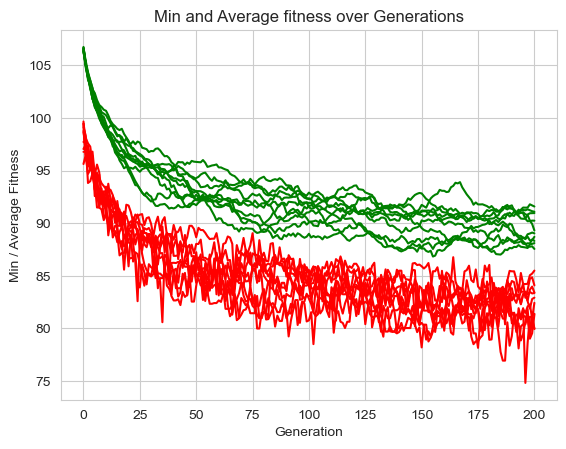

In [18]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df) #we are running main 10 times with inital results
#we are also using a datagrame

# (2) The experiments and results of your initial design with the TSP problem you are given.
### The results of the intital algorithm

The initial algorithm we made performs fine, there isn't convergence.
Based on the graph above (scroll down on the cell) we can see that in points of the algorithm that the average fails to minimise and goes up in fitness (marked in green). This means that the algorithm favours exploration. This is good because it allows a lot of diversity but it also means it struggles within the constraint of only having 200 generations.

Currently, the algorithm is returning a average best fitness of 90.134, a worst fitness of 93.948 and a best fitness run of 86.90

Average best fitness means we divide the number of runs (in this case 10) by the best fitness of each value.

Since this algorithm hasn’t reached convergence due to the diversity of individuals in the population we could expect that if we were to increase the max generation to a number > 200 we could expect a much better result.










Algo config 

Population                      300

Max Generations                 200

P_Crossover                     0.9

P_Mutation                      0.1

Selection Method      selTournament

Crossover Method          cxOrdered

Mutation Method   mutShuffleIndexes
TSP Length                    200.0)

In [19]:
print(results_df.T) #We are viewing the dataframe we made here. Since each run of every algorithm saves to the dataframe

                          0
Avg Fitness       89.489767
Population              300
Max Generations         200
P_Crossover             0.9
P_Mutation              0.1
Selection Method         ()
Crossover Method         ()
Mutation Method          ()
TSP Length            200.0


## Using 50 cities, and population size of 50
Since the second suggested procedure is to do "Use the first 50 cities and use a population size of 50 while keeping other GA
parameters the same as in (1)" We will be doing this.

In [20]:
POPULATION_SIZE = 50
TSP_NAME = "d50-7"
tsp = TravelingSalesmanProblem(TSP_NAME)
tsp_lenth = len(tsp)



length = 50, locations = [array([0.577415, 0.979374], dtype=float32), array([0.450028, 0.663745], dtype=float32), array([0.512647, 0.514206], dtype=float32), array([0.898622, 0.974126], dtype=float32), array([0.739949, 0.147543], dtype=float32), array([0.187987, 1.014345], dtype=float32), array([0.200212, 0.303877], dtype=float32), array([1.126736, 0.410751], dtype=float32), array([0.901877, 0.42644 ], dtype=float32), array([1.355639, 0.757939], dtype=float32), array([0.633797, 0.550195], dtype=float32), array([0.526203, 1.176042], dtype=float32), array([0.697197, 1.252739], dtype=float32), array([0.37523 , 1.092364], dtype=float32), array([0.229429, 0.76595 ], dtype=float32), array([1.222864, 0.672509], dtype=float32), array([1.278286, 1.226356], dtype=float32), array([0.743149, 0.488997], dtype=float32), array([0.22513 , 0.960315], dtype=float32), array([0.725579, 0.630836], dtype=float32), array([0.916381, 0.37342 ], dtype=float32), array([0.803347, 1.271614], dtype=float32), array(

42, 45: location1 = [0.750629 0.369707], location2 = [0.832468 0.190684] => distance = 0.19684217870235443
42, 46: location1 = [0.750629 0.369707], location2 = [0.568188 0.229382] => distance = 0.2301647663116455
42, 47: location1 = [0.750629 0.369707], location2 = [0.748011 0.019134] => distance = 0.3505827784538269
42, 48: location1 = [0.750629 0.369707], location2 = [0.28887  0.091058] => distance = 0.5393205285072327
42, 49: location1 = [0.750629 0.369707], location2 = [0.449949 0.156314] => distance = 0.36870723962783813
43, 44: location1 = [0.494115 0.019506], location2 = [0.609023 1.298555] => distance = 1.2842001914978027
43, 45: location1 = [0.494115 0.019506], location2 = [0.832468 0.190684] => distance = 0.37918946146965027
43, 46: location1 = [0.494115 0.019506], location2 = [0.568188 0.229382] => distance = 0.22256402671337128
43, 47: location1 = [0.494115 0.019506], location2 = [0.748011 0.019134] => distance = 0.2538962662220001
43, 48: location1 = [0.494115 0.019506], l

In [21]:

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # return a tuple


toolbox.register("evaluate", tpsDistance)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2) #these are our intital settings
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))
update_methods() 



C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Note: The commands above are run in order to reset the algorithm.

# Inital Algorithm with 50 cities and population of 50

gen	nevals	min    	avg    
0  	50    	27.6592	32.4815
1  	48    	25.5095	31.624 
2  	48    	26.0754	30.8222
3  	50    	25.6476	30.4878
4  	45    	26.56  	29.9   
5  	41    	26.56  	29.6302
6  	41    	25.9339	29.428 
7  	46    	25.4748	29.3652
8  	46    	25.731 	29.3146
9  	50    	26.836 	28.9027
10 	47    	25.3106	28.7835
11 	41    	25.5665	28.4699
12 	46    	25.5782	28.7834
13 	48    	25.0781	28.767 
14 	43    	25.0481	28.1153
15 	48    	24.566 	27.7495
16 	45    	24.566 	27.5158
17 	43    	24.576 	27.4781
18 	49    	24.1745	27.1508
19 	40    	23.3899	26.9587
20 	45    	23.9626	26.9979
21 	47    	23.5339	26.4085
22 	44    	23.2952	26.1815
23 	42    	22.9694	26.2573
24 	42    	21.9615	25.8302
25 	46    	21.7902	25.3931
26 	48    	21.737 	24.9299
27 	45    	21.737 	25.2484
28 	44    	21.7038	24.5119
29 	46    	20.9823	24.3226
30 	46    	20.9823	24.1891
31 	43    	20.7153	23.9936
32 	46    	20.5936	23.7507
33 	48    	21.5639	23.7859
34 	49    	20.8898	23.9852
35 	48    	20.3985	24.0326
3

179	46    	20.4563	23.7993
180	48    	21.7267	24.2993
181	44    	21.5295	23.9291
182	49    	21.5279	23.9846
183	43    	20.2521	23.8842
184	48    	20.2521	23.93  
185	48    	20.2521	23.3311
186	42    	21.1672	23.1242
187	45    	21.4332	23.0974
188	44    	20.5331	23.459 
189	48    	20.9624	23.4988
190	43    	19.9704	23.6451
191	45    	19.7576	23.9169
192	42    	21.0598	23.6293
193	44    	21.0326	23.5386
194	48    	21.6167	23.9355
195	45    	21.7025	23.9067
196	48    	22.4812	24.382 
197	47    	21.5275	24.6899
198	40    	20.9002	24.5902
199	48    	21.3405	24.6748
200	50    	21.3426	24.1392
gen	nevals	min    	avg  
0  	50    	29.5929	33.01
1  	45    	29.2942	32.2947
2  	47    	27.6972	31.4207
3  	48    	27.2174	30.2275
4  	46    	26.4095	29.8482
5  	50    	26.6685	29.6863
6  	48    	25.3872	29.338 
7  	42    	25.4728	28.5814
8  	40    	25.5456	28.303 
9  	50    	25.725 	28.061 
10 	46    	25.6941	28.3787
11 	40    	25.494 	28.3186
12 	46    	23.6486	27.9785
13 	42    	24.6411	27.237 
14 	4

104	45    	19.5956	22.7393
105	44    	19.8777	22.7065
106	46    	19.8651	22.3574
107	45    	19.5051	22.8952
108	44    	19.3274	22.5859
109	41    	19.3274	22.6278
110	44    	19.8124	22.4546
111	48    	19.295 	22.3263
112	43    	18.4758	21.9937
113	48    	18.6286	21.7465
114	48    	19.1912	22.099 
115	48    	19.1506	22.2029
116	43    	19.3211	22.1244
117	48    	17.751 	22.1715
118	49    	18.9967	22.1081
119	42    	19.069 	22.2466
120	46    	19.5705	21.9456
121	48    	19.4455	21.823 
122	45    	20.1786	22.417 
123	44    	20.1786	22.5494
124	45    	20.0947	22.8831
125	47    	20.1763	23.1959
126	48    	20.499 	23.3425
127	50    	19.815 	23.6656
128	49    	21.1439	23.7298
129	37    	21.1439	23.6869
130	41    	21.3228	24.1461
131	42    	20.9878	24.3553
132	40    	20.5255	24.0192
133	44    	20.9176	23.9506
134	46    	21.2355	24.1452
135	48    	20.2607	24.1171
136	41    	20.2607	24.0773
137	40    	21.7664	24.1592
138	46    	21.3518	23.9738
139	48    	21.6811	23.7781
140	47    	21.7515	23.8737
1

89 	45    	20.5273	22.9693
90 	45    	20.921 	23.2257
91 	46    	20.9639	23.3768
92 	46    	21.311 	23.7905
93 	44    	20.9625	23.5587
94 	50    	20.5353	23.794 
95 	42    	20.7934	23.4887
96 	42    	21.0774	23.3533
97 	44    	21.2682	23.4508
98 	47    	21.2544	23.2818
99 	46    	20.7046	23.0532
100	45    	21.0196	23.1034
101	49    	20.1846	23.1251
102	50    	20.1075	22.9522
103	43    	20.2603	22.9057
104	49    	20.2204	23.1105
105	50    	20.2204	22.9451
106	48    	19.9604	22.9117
107	40    	19.9604	23.0528
108	48    	20.5102	23.4823
109	46    	20.651 	23.5248
110	43    	21.0034	23.7052
111	44    	20.9195	23.4934
112	50    	20.4236	23.4222
113	44    	20.7978	23.5923
114	45    	21.2984	23.6645
115	39    	21.2984	23.7832
116	45    	20.0827	23.9466
117	48    	21.9136	24.0186
118	44    	21.6636	24.0593
119	43    	21.5314	23.9941
120	50    	21.6184	23.8933
121	49    	19.4417	23.9802
122	50    	19.8353	24.1587
123	50    	22.1659	24.5261
124	47    	21.1304	24.1912
125	48    	21.9266	24.3702
1

29 	49    	23.9211	26.0164
30 	45    	23.302 	26.1313
31 	46    	23.8334	26.2284
32 	42    	23.4606	26.3328
33 	44    	23.8416	26.3132
34 	44    	22.3825	26.3205
35 	45    	23.2906	26.4897
36 	46    	22.8671	26.3922
37 	43    	23.2002	26.1081
38 	45    	23.5979	26.5013
39 	46    	23.5737	26.4086
40 	45    	23.9311	26.5007
41 	46    	23.5649	26.3406
42 	44    	23.5678	25.9114
43 	44    	22.4816	25.9733
44 	48    	22.1813	25.2778
45 	48    	21.1673	24.3881
46 	45    	21.6984	24.2847
47 	44    	21.2057	24.2294
48 	43    	21.5739	23.9849
49 	42    	20.9777	23.921 
50 	48    	20.9147	23.9356
51 	46    	21.2635	23.6711
52 	48    	20.8123	23.3344
53 	47    	21.3943	23.5936
54 	46    	20.8472	24.1299
55 	46    	22.0445	24.0655
56 	47    	21.3499	24.091 
57 	42    	19.9896	23.823 
58 	39    	20.7011	23.3448
59 	44    	20.6582	23.4878
60 	45    	20.5011	23.5316
61 	37    	19.3674	23.0736
62 	45    	19.3674	23.3404
63 	46    	19.8807	22.9382
64 	48    	19.8799	22.498 
65 	47    	19.9466	22.4815
6

175	36    	17.6211	20.8846
176	44    	17.72  	20.3726
177	44    	18.0089	20.2305
178	48    	18.1173	20.8136
179	39    	17.5954	20.9138
180	42    	17.6813	20.8379
181	48    	18.1814	21.1709
182	48    	18.1866	21.0781
183	43    	18.1866	21.3245
184	46    	18.532 	21.3671
185	44    	18.7304	21.2636
186	47    	17.8107	21.0363
187	44    	18.7304	21.0644
188	47    	18.0655	21.105 
189	40    	18.393 	20.9645
190	49    	17.3422	20.8993
191	48    	18.2301	20.827 
192	46    	17.9222	20.759 
193	41    	17.9222	20.8962
194	45    	17.4681	20.6122
195	46    	17.7085	20.9141
196	48    	17.2801	20.7329
197	43    	18.5176	20.8653
198	47    	18.6065	21.1518
199	48    	18.2729	21.0441
200	45    	18.0659	20.7346
gen	nevals	min    	avg    
0  	50    	29.2944	33.2381
1  	45    	29.2944	32.6549
2  	44    	29.347 	31.8997
3  	47    	28.7737	31.2235
4  	46    	28.7737	31.1647
5  	44    	28.0175	30.8594
6  	46    	28.0175	30.5797
7  	41    	26.987 	30.4023
8  	43    	26.7551	29.7903
9  	47    	27.4243	30.2489
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


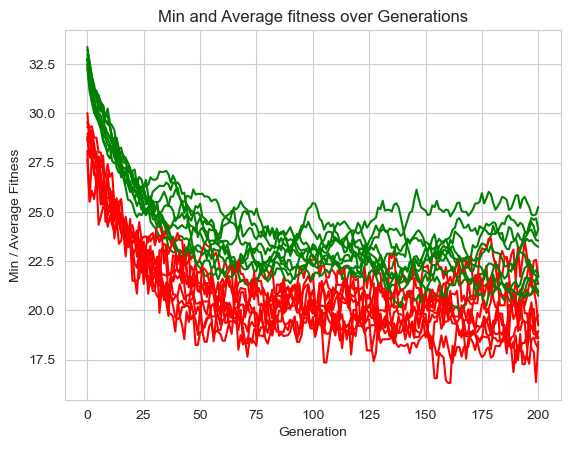

In [22]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

In [23]:
print(results_df.T) #printing dataframe

                          0                               1
Avg Fitness       89.489767                       22.677944
Population              300                              50
Max Generations         200                             200
P_Crossover             0.9                             0.9
P_Mutation              0.1                             0.1
Selection Method         ()     selTournament (tournsize=2)
Crossover Method         ()                    cxOrdered ()
Mutation Method          ()  mutShuffleIndexes (indpb=0.02)
TSP Length            200.0                            50.0


Findings :
Both algorithms have a similar preformance. Decreasing population size results in a slightly better preformance in terms of minimizing the fitness given the current config we have.


# Suggested Procedure (3) Experiment by modifying one or more parameters
For this stage, we will be modifying parameters such as probality of crossover, population size and probality of mutation to find parameters that help us minimize fitness. We will be experimenting to find the algorithms which result in the best preformance

In [24]:
P_CROSSOVER = 0.7 #Originally it was 0.9
POPULATION_SIZE = 50 #population size is already set to 50, but incase runnig this cell it will reset it
P_MUTATION = 0.1 #already set

#pop size and prob mutation are already set to these values


gen	nevals	min    	avg    
0  	50    	29.6243	33.2108
1  	39    	27.8065	32.0601
2  	34    	27.9158	31.1512
3  	32    	27.9158	30.6623
4  	40    	28.6047	30.4288
5  	36    	28.1407	30.0251
6  	35    	26.693 	29.7319
7  	37    	25.8068	29.305 
8  	36    	24.7317	28.9616
9  	41    	24.7317	28.1631
10 	38    	25.2935	28.1379
11 	34    	25.5466	27.8625
12 	41    	24.4688	27.3665
13 	38    	24.4688	26.6326
14 	31    	23.9359	26.5006
15 	30    	23.9359	26.2483
16 	29    	24.0381	26.1502
17 	34    	24.0381	26.1099
18 	34    	23.559 	25.8301
19 	41    	22.7028	25.331 
20 	33    	22.7028	24.9128
21 	35    	22.5936	24.7456
22 	44    	22.3375	24.7737
23 	26    	22.3375	24.5379
24 	36    	22.8354	24.7294
25 	35    	21.7851	25.0418
26 	40    	21.6843	24.9476
27 	38    	20.7148	24.6023
28 	36    	22.3352	25.1028
29 	34    	22.3521	24.6958
30 	34    	22.309 	24.2255
31 	34    	22.3975	23.9156
32 	28    	22.3119	23.3172
33 	38    	21.1195	23.1164
34 	32    	21.1195	23.1522
35 	46    	21.4831	23.1995
3

159	39    	14.885 	17.2124
160	29    	15.5575	16.8896
161	35    	15.5574	16.8712
162	39    	15.5574	16.8121
163	36    	15.4259	16.7665
164	48    	14.885 	16.9799
165	31    	14.885 	16.6849
166	34    	14.885 	16.4082
167	30    	14.885 	16.3351
168	39    	14.885 	16.303 
169	32    	14.885 	16.0715
170	38    	14.885 	15.9023
171	29    	14.8636	15.787 
172	39    	14.885 	15.7952
173	38    	14.7198	15.7751
174	36    	14.7198	15.9247
175	35    	14.7198	15.6599
176	38    	14.5055	15.8425
177	31    	14.5055	15.8305
178	29    	14.6073	15.8862
179	35    	14.5415	15.7812
180	33    	14.5415	15.657 
181	31    	14.5415	15.6775
182	38    	14.5415	15.6918
183	36    	14.5415	15.3993
184	31    	14.5415	15.2564
185	34    	14.5415	15.001 
186	32    	14.5415	15.1991
187	33    	14.5415	15.1902
188	36    	14.5415	14.9782
189	24    	14.437 	15.0338
190	37    	14.28  	14.8439
191	34    	14.1196	15.0273
192	34    	14.1196	14.8866
193	36    	14.1196	14.8906
194	38    	14.1196	15.1402
195	41    	14.1196	15.2425
1

144	43    	15.789 	17.0401
145	36    	15.789 	17.227 
146	43    	15.9217	17.3276
147	42    	16.0093	17.4759
148	41    	15.7195	17.5403
149	37    	15.7195	17.2656
150	38    	15.5138	17.2916
151	38    	15.2753	16.9443
152	38    	15.2753	16.9006
153	39    	15.2753	17.0291
154	33    	14.9587	17.1896
155	35    	15.4542	17.2538
156	42    	15.5138	17.1814
157	38    	15.5138	17.3638
158	32    	15.529 	17.4185
159	39    	15.4843	17.4525
160	30    	15.4691	17.2746
161	38    	15.529 	17.3836
162	38    	15.8531	17.3739
163	42    	15.8085	17.1577
164	40    	15.8085	17.2378
165	41    	16.1065	17.1977
166	33    	15.9166	17.2153
167	32    	15.5515	17.1116
168	33    	15.5534	16.6318
169	39    	15.5534	16.3787
170	35    	15.5534	16.3862
171	33    	15.5534	16.2562
172	38    	15.5534	16.3369
173	40    	15.5534	16.4902
174	36    	15.5534	16.4706
175	39    	15.6376	16.4074
176	33    	15.6376	16.2001
177	31    	15.5033	16.0081
178	46    	15.5033	15.8243
179	38    	15.5033	15.8421
180	35    	15.5033	15.7684
1

129	43    	16.519 	19.0277
130	35    	17.0726	19.1308
131	32    	17.5154	19.3798
132	36    	17.3549	19.3694
133	34    	17.6326	19.1857
134	45    	17.5831	19.4904
135	40    	16.978 	19.7384
136	39    	17.1846	19.188 
137	34    	17.1846	19.124 
138	35    	17.1846	19.3107
139	39    	16.9404	19.2622
140	31    	16.9404	19.0687
141	41    	16.7778	19.1717
142	31    	17.2144	19.0285
143	39    	17.0409	19.0944
144	29    	17.0409	19.0462
145	40    	17.1206	19.3609
146	43    	17.3082	19.1078
147	34    	17.3082	19.32  
148	41    	17.3082	19.3768
149	36    	17.5407	19.3406
150	44    	16.8365	19.2031
151	36    	16.8365	18.9372
152	35    	16.6117	18.7633
153	38    	15.2233	18.4303
154	43    	16.3647	18.2439
155	32    	16.3647	18.3103
156	33    	16.3994	18.2989
157	29    	16.3994	18.3445
158	33    	16.3994	18.0281
159	39    	16.4419	17.9338
160	42    	16.6375	18.1059
161	28    	16.649 	18.1088
162	43    	16.136 	18.1448
163	36    	16.136 	18.2705
164	39    	15.1925	18.0454
165	42    	16.1206	18.5814
1

76 	32    	16.2789	18.063 
77 	33    	16.2789	17.7869
78 	35    	16.3849	18.1496
79 	36    	16.9075	18.3012
80 	32    	16.6351	18.0497
81 	33    	16.6351	17.9181
82 	40    	16.9082	18.0073
83 	36    	16.9082	18.0019
84 	37    	16.9082	17.8646
85 	35    	16.6787	17.9356
86 	35    	16.6787	18.0102
87 	37    	16.6787	18.0065
88 	34    	16.2684	18.0539
89 	36    	16.6787	17.9556
90 	39    	16.2684	17.8945
91 	34    	16.2352	17.9861
92 	37    	16.0485	18.1293
93 	36    	16.0485	18.1301
94 	32    	16.0485	17.7409
95 	40    	15.9323	17.6897
96 	34    	15.9323	17.4329
97 	40    	15.8509	17.1786
98 	33    	15.8509	16.9108
99 	39    	15.4309	16.9737
100	34    	15.7326	16.7221
101	36    	15.0552	16.4148
102	34    	15.6557	16.5625
103	30    	15.712 	16.5238
104	39    	15.712 	16.3643
105	41    	15.3714	16.7095
106	34    	15.1501	16.5723
107	30    	15.2064	16.3845
108	43    	15.2064	16.419 
109	42    	15.0004	16.4474
110	37    	14.8602	16.378 
111	28    	14.8602	16.3473
112	42    	14.2017	15.9988
1

64 	39    	18.7105	20.7015
65 	33    	19.0456	20.328 
66 	34    	17.8121	20.0781
67 	39    	18.1017	19.9914
68 	38    	18.5177	20.1239
69 	35    	18.5177	20.2762
70 	28    	18.5177	19.9989
71 	39    	18.2881	19.8769
72 	29    	18.2881	19.8796
73 	30    	18.0762	19.774 
74 	38    	17.6531	19.8995
75 	35    	17.6251	19.4809
76 	40    	17.4397	19.5053
77 	40    	17.8499	19.6474
78 	32    	17.4331	19.2704
79 	26    	17.4331	18.8886
80 	36    	17.694 	18.6011
81 	37    	17.298 	18.3985
82 	41    	16.7161	18.3069
83 	30    	16.7161	18.1984
84 	44    	17.3772	18.3784
85 	35    	17.5018	18.5203
86 	33    	17.5018	18.4959
87 	39    	17.4392	18.4132
88 	29    	17.1714	18.3975
89 	36    	17.1745	18.4493
90 	41    	17.1624	18.2527
91 	37    	17.1745	18.4153
92 	35    	17.2103	18.4986
93 	38    	17.4061	18.421 
94 	43    	17.3127	18.8101
95 	30    	17.3127	18.7246
96 	37    	17.269 	18.6476
97 	42    	16.6945	18.7316
98 	44    	16.4962	18.7288
99 	48    	16.6945	19.0254
100	31    	16.6945	18.9805
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


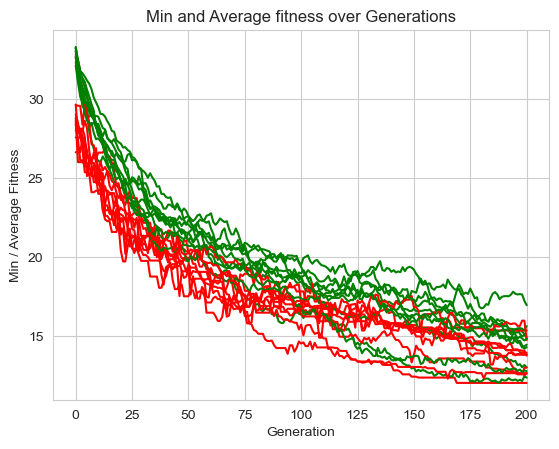

In [25]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Lowering the crossover from 0.9 to 0.7 results in a much better average best fitness of 14.75 (when orginally tested)
Compared to 21.81. 

Note [To markers]: Since the assignment brief asks us to talk about "(3) The experiments and results when refining your initial design. Show only those with
significant improvements (no more than 4). Provide analyses of each set of results and
discuss what contributed to the improvements." We will be doing the anaylse and discussion in the next stage. Currently this stage is experimenting with different parameters

In [26]:
POPULATION_SIZE = 100 #in this we alter the population size and run experiment again

gen	nevals	min   	avg   
0  	100   	28.299	32.781
1  	75    	27.8845	31.9781
2  	72    	27.492 	31.3237
3  	71    	26.1863	30.9442
4  	77    	27.3371	30.9128
5  	67    	25.7621	30.1954
6  	72    	25.7621	29.7978
7  	69    	25.7278	29.4009
8  	72    	25.0415	29.3221
9  	70    	24.198 	29.01  
10 	71    	25.5463	28.6639
11 	77    	24.6004	28.2193
12 	63    	24.6004	27.9463
13 	74    	24.6004	27.6856
14 	76    	25.0977	27.8825
15 	77    	24.1509	27.7439
16 	78    	24.5066	27.7467
17 	69    	24.5066	27.4674
18 	77    	24.4209	27.2293
19 	65    	24.7491	27.0113
20 	71    	24.506 	27.0448
21 	73    	24.2674	26.9379
22 	81    	24.205 	26.692 
23 	75    	24.1004	26.7206
24 	68    	23.8132	26.6154
25 	59    	24.1004	26.4947
26 	75    	23.8538	26.2731
27 	74    	23.7386	26.0501
28 	68    	23.3307	25.8105
29 	77    	23.2958	25.6722
30 	83    	23.2647	25.7101
31 	78    	23.3748	25.8983
32 	74    	23.166 	25.7508
33 	76    	23.166 	25.4011
34 	63    	23.166 	25.1919
35 	70    	22.4556	24.9762
36 	7

102	72    	17.8347	20.7546
103	79    	17.9455	20.9034
104	64    	17.9455	20.5925
105	61    	17.9736	20.4674
106	70    	18.0572	20.7742
107	77    	18.5698	20.9093
108	78    	18.5698	20.9173
109	78    	17.6994	20.896 
110	68    	17.6994	20.6435
111	74    	17.7849	20.5867
112	76    	17.8224	20.3426
113	76    	17.8224	20.4687
114	69    	17.8224	20.1164
115	70    	17.5859	20.4113
116	81    	16.6525	20.3982
117	84    	16.6525	20.387 
118	81    	16.7896	20.1135
119	80    	15.425 	20.0991
120	73    	15.425 	19.8633
121	78    	15.425 	19.5856
122	63    	15.425 	19.83  
123	75    	15.425 	19.3734
124	75    	15.425 	19.1602
125	87    	15.425 	19.2536
126	72    	15.425 	18.8578
127	81    	15.5727	18.8474
128	67    	15.8608	18.8207
129	74    	15.8608	18.7189
130	71    	16.1714	18.7448
131	61    	15.7234	18.4509
132	81    	15.3473	18.0762
133	73    	15.3473	17.9418
134	69    	15.3473	17.644 
135	77    	14.6325	17.5851
136	73    	15.018 	17.3683
137	74    	15.4185	17.4682
138	67    	14.848 	17.2481
1

56 	63    	18.9012	21.9513
57 	65    	18.9012	21.7358
58 	71    	17.9124	21.4582
59 	83    	17.1847	21.6482
60 	60    	17.1847	21.2833
61 	91    	18.0845	21.4801
62 	79    	18.4349	21.5059
63 	83    	18.381 	21.6794
64 	83    	18.0079	21.464 
65 	74    	18.5818	21.4117
66 	69    	18.5818	21.2831
67 	73    	18.6828	21.3372
68 	71    	18.6828	21.4426
69 	70    	18.4723	21.5641
70 	68    	19.1684	21.3286
71 	72    	18.3903	21.4296
72 	80    	18.9701	21.3746
73 	76    	18.6507	21.359 
74 	69    	18.6507	21.1044
75 	76    	18.5995	20.8169
76 	73    	18.2631	20.8057
77 	69    	18.2631	20.7053
78 	74    	17.994 	20.4943
79 	69    	18.1544	20.4304
80 	75    	17.5678	20.0681
81 	73    	17.5678	19.9045
82 	67    	17.5678	19.6005
83 	68    	17.5678	19.4495
84 	77    	17.7444	19.3661
85 	71    	17.4385	19.2526
86 	66    	17.3894	19.2273
87 	75    	17.3894	19.112 
88 	71    	17.2011	19.0132
89 	64    	17.081 	18.9155
90 	70    	16.9924	18.9493
91 	80    	16.9924	19.2143
92 	76    	16.9928	19.1871
9

13 	79    	23.586 	27.1822
14 	69    	23.4452	27.0194
15 	81    	22.7546	27.0139
16 	78    	22.7731	26.4904
17 	72    	23.2877	26.2796
18 	77    	23.2877	25.9151
19 	69    	22.2053	25.3384
20 	70    	22.4501	25.2974
21 	79    	22.4501	25.1832
22 	75    	21.8686	25.0782
23 	68    	21.4635	24.7779
24 	77    	21.2291	24.7132
25 	76    	21.0735	24.9285
26 	79    	22.0545	24.8017
27 	77    	22.0545	24.9046
28 	75    	20.9101	25.0803
29 	77    	20.9101	24.6568
30 	62    	21.6981	24.1343
31 	73    	20.8222	23.7878
32 	77    	20.7259	23.6125
33 	69    	20.977 	23.4541
34 	72    	20.7418	23.2805
35 	76    	20.7418	23.4195
36 	73    	20.2197	23.2844
37 	79    	20.0081	23.071 
38 	74    	19.8308	22.9572
39 	82    	20.0081	23.2469
40 	84    	19.2515	22.895 
41 	66    	19.2515	22.7412
42 	67    	19.8257	22.6294
43 	62    	19.8257	22.3744
44 	72    	19.4203	22.388 
45 	81    	19.3355	22.3512
46 	71    	19.2164	22.1982
47 	79    	19.2164	22.2791
48 	81    	19.2164	22.3576
49 	69    	19.5263	22.0349
5

143	80    	16.4811	18.6077
144	53    	16.4811	18.3792
145	74    	15.7861	18.2952
146	76    	15.6022	18.3201
147	66    	16.2624	18.2514
148	76    	15.86  	18.1193
149	75    	15.86  	18.2899
150	68    	15.86  	18.4175
151	75    	15.86  	18.3478
152	81    	16.3752	18.5896
153	72    	16.4503	18.6549
154	71    	16.4503	18.6973
155	65    	16.11  	18.4026
156	71    	15.572 	17.9389
157	74    	15.6285	17.8001
158	87    	16.1306	18.0211
159	71    	16.1306	18.1799
160	80    	15.8145	18.0912
161	79    	16.2233	18.334 
162	80    	15.8168	18.3435
163	64    	15.153 	18.05  
164	68    	15.153 	18.0963
165	74    	15.153 	17.8912
166	62    	15.153 	18.2019
167	76    	14.9237	18.0487
168	68    	15.2098	17.9284
169	73    	15.0796	17.9749
170	64    	15.0796	18.0856
171	88    	15.1856	18.1681
172	80    	14.5708	18.1399
173	70    	14.5708	17.9962
174	74    	14.5708	18.1154
175	63    	14.5708	17.9342
176	67    	14.5708	17.6841
177	75    	14.5708	17.7173
178	76    	14.5708	17.7628
179	74    	14.4932	17.4897
1

103	64    	15.0887	17.236 
104	67    	14.9198	17.2475
105	72    	14.9521	17.1145
106	71    	14.9521	17.1759
107	73    	15.0318	17.2447
108	67    	15.0318	17.1378
109	77    	15.0318	17.1138
110	69    	15.0318	17.0981
111	63    	15.0119	17.2013
112	71    	15.0318	17.0579
113	61    	14.8952	16.7706
114	78    	15.0318	16.7565
115	87    	14.8232	16.6156
116	86    	14.8695	16.7962
117	69    	14.4067	16.8921
118	80    	14.4067	16.8224
119	73    	14.3129	16.6704
120	79    	14.4067	16.6264
121	66    	14.7322	16.5196
122	73    	14.7322	16.4996
123	76    	14.4616	16.6282
124	70    	14.4225	16.6056
125	79    	14.1356	16.4825
126	72    	14.1356	16.5495
127	72    	14.0388	16.6051
128	75    	14.0388	16.9723
129	81    	14.0388	16.9104
130	72    	14.0388	16.7545
131	64    	14.0047	16.6378
132	71    	14.0382	16.7652
133	76    	14.5715	16.7116
134	76    	14.2361	16.8888
135	79    	13.9391	16.8312
136	70    	13.9391	16.6831
137	74    	13.9391	16.361 
138	67    	13.7007	16.422 
139	78    	13.7007	16.4735
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


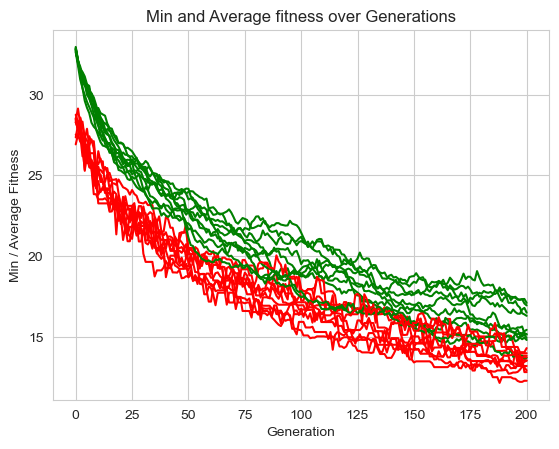

In [27]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Changing the population size to 100 instead of 50 slightly reduces avg  preformance but results in slightly better best fitness

In [28]:
P_MUTATION = 0.2 #Originally 0.1
POPULATION_SIZE = 50 #reset populatiion size back to 50

gen	nevals	min    	avg    
0  	50    	28.0768	33.0422
1  	37    	27.3985	32.3806
2  	34    	27.3483	31.3653
3  	34    	26.7057	30.6121
4  	38    	26.1204	30.2932
5  	40    	24.7398	29.9507
6  	35    	24.7398	29.219 
7  	49    	25.948 	29.0426
8  	40    	24.1107	28.6302
9  	39    	24.2055	27.7535
10 	40    	24.2518	27.2415
11 	40    	24.2518	27.2261
12 	38    	24.2518	26.8029
13 	38    	23.8966	26.5231
14 	40    	23.2694	26.17  
15 	39    	23.2524	25.9635
16 	42    	23.1671	25.4925
17 	39    	23.1671	25.2709
18 	36    	23.0589	25.1768
19 	40    	22.6789	24.9413
20 	33    	21.3735	24.145 
21 	36    	22.0104	23.9547
22 	44    	22.0104	24.1814
23 	40    	22.1776	24.3375
24 	41    	22.3863	24.5264
25 	40    	21.6496	24.1302
26 	39    	21.6496	24.365 
27 	37    	21.3683	23.9901
28 	35    	21.3683	23.8412
29 	41    	21.3523	23.6076
30 	39    	20.3697	22.9342
31 	45    	20.3104	22.9861
32 	29    	20.3104	22.7206
33 	41    	20.3104	22.8356
34 	37    	20.1286	22.4923
35 	33    	19.6235	22.4863
3

160	37    	15.5196	17.6206
161	38    	15.0166	17.8131
162	32    	14.5159	17.2612
163	35    	15.0737	17.4307
164	29    	15.0737	17.3537
165	43    	15.0375	17.7195
166	39    	14.8365	17.372 
167	48    	15.2876	17.6015
168	41    	15.305 	17.7418
169	46    	14.7005	17.7987
170	35    	14.7005	17.4571
171	41    	14.7005	17.6104
172	39    	14.7005	17.4509
173	36    	15.6972	17.1326
174	35    	15.6972	17.5163
175	35    	15.6972	17.2925
176	39    	15.3526	17.5129
177	41    	15.1349	17.2618
178	35    	15.1349	17.2724
179	45    	15.1903	17.2342
180	45    	14.919 	17.4957
181	35    	15.5726	17.3188
182	43    	15.4041	17.3088
183	38    	14.9393	17.138 
184	40    	15.2556	17.3165
185	38    	15.2556	17.4106
186	41    	15.2556	17.4924
187	39    	15.885 	18.0135
188	41    	15.7563	17.7671
189	43    	15.8021	17.8832
190	39    	15.8021	18.107 
191	35    	15.0953	18.204 
192	39    	15.579 	17.9552
193	38    	15.8   	17.8852
194	44    	15.4254	17.9032
195	41    	15.3746	17.5663
196	42    	14.4252	17.8382
1

161	46    	16.6561	19.6165
162	41    	16.6561	19.9474
163	31    	16.6561	19.5391
164	35    	17.7988	19.5902
165	39    	17.7988	19.5574
166	39    	17.2845	19.7105
167	39    	17.2845	20.0598
168	42    	17.4432	19.7955
169	38    	17.4934	19.8755
170	36    	17.6053	20.06  
171	39    	18.1495	20.2563
172	38    	17.6954	20.0524
173	34    	17.6954	19.9025
174	39    	17.6954	19.925 
175	38    	17.9463	19.9747
176	33    	17.9376	20.2035
177	39    	17.6302	19.7095
178	40    	17.6302	19.4118
179	40    	17.4498	19.4787
180	34    	17.66  	19.6663
181	41    	17.2541	19.7172
182	35    	17.2541	19.6334
183	44    	16.94  	19.231 
184	42    	17.4822	19.5864
185	34    	17.4822	19.2731
186	43    	17.4921	19.2402
187	44    	17.3744	19.3733
188	32    	16.964 	19.2437
189	31    	16.3972	18.9135
190	33    	16.3972	18.8729
191	38    	16.3972	18.7847
192	35    	17.0018	19.0116
193	40    	17.0018	19.0061
194	37    	16.2549	19.1517
195	47    	16.9195	18.7077
196	44    	16.3377	18.5751
197	38    	16.3377	18.5698
1

3  	35    	26.843 	29.9151
4  	31    	26.843 	29.3715
5  	35    	26.843 	29.2855
6  	44    	26.1668	29.0714
7  	41    	25.9095	28.8183
8  	42    	25.9095	28.3732
9  	38    	25.7949	28.0906
10 	38    	24.5732	27.5249
11 	38    	25.2443	27.4702
12 	42    	24.6327	26.9421
13 	36    	24.4301	26.6474
14 	36    	23.9969	26.1815
15 	39    	23.609 	25.9144
16 	38    	23.0035	25.6575
17 	40    	23.2694	25.5443
18 	41    	22.7683	25.558 
19 	43    	22.5417	25.3757
20 	39    	22.6069	25.437 
21 	36    	22.6069	25.2553
22 	32    	23.0225	24.7271
23 	39    	22.6684	24.7256
24 	36    	21.7285	24.3222
25 	35    	21.528 	24.5597
26 	35    	22.2229	24.7005
27 	39    	22.2229	24.7432
28 	42    	21.2378	24.4947
29 	43    	21.5483	24.5077
30 	37    	20.4617	24.414 
31 	38    	19.7523	24.2819
32 	35    	19.7523	24.2562
33 	42    	19.7523	23.9148
34 	44    	20.2661	23.7946
35 	33    	20.2661	23.74  
36 	44    	20.4453	23.1939
37 	39    	20.4453	22.7077
38 	45    	20.4453	22.709 
39 	38    	20.7119	22.6168
4

163	41    	17.4778	20.4379
164	36    	16.8869	20.5227
165	39    	16.988 	20.8645
166	38    	16.988 	20.3372
167	38    	17.4778	20.0865
168	46    	17.4778	20.2488
169	42    	17.7055	20.3378
170	31    	17.2195	19.9043
171	35    	16.9954	19.6674
172	35    	17.5942	19.7932
173	41    	17.4918	20.063 
174	37    	17.7055	19.9453
175	41    	17.1536	20.0837
176	40    	17.1536	20.6103
177	34    	17.7618	20.5585
178	40    	17.7464	20.6263
179	45    	17.7464	20.3345
180	41    	17.6039	20.2936
181	46    	17.6039	20.7204
182	37    	17.6958	21.0922
183	46    	17.932 	21.2986
184	42    	19.0211	21.6956
185	35    	18.8743	21.4697
186	37    	17.9443	21.0433
187	42    	17.9443	21.2462
188	40    	17.9443	20.9937
189	44    	19.023 	21.2017
190	41    	18.5506	21.2326
191	37    	18.5506	21.1794
192	34    	18.3922	21.2045
193	32    	18.3922	20.8813
194	37    	18.8589	21.1073
195	43    	18.9504	21.6458
196	40    	18.9504	21.5093
197	34    	19.2781	21.4992
198	37    	19.2424	21.3887
199	43    	19.0427	21.4659
2

156	42    	14.8328	16.698 
157	37    	14.8328	16.5857
158	44    	14.3921	16.6541
159	36    	14.3921	16.3089
160	38    	14.3921	16.3884
161	39    	14.3921	16.5421
162	40    	14.3921	17.0249
163	39    	14.9175	16.8802
164	34    	14.9338	16.9928
165	40    	14.9338	16.8335
166	42    	14.8708	16.8639
167	40    	14.8708	16.8947
168	35    	14.741 	16.6383
169	43    	14.741 	16.7128
170	42    	14.8708	16.7869
171	37    	14.8708	16.6908
172	36    	14.7703	16.5607
173	45    	14.8708	16.3573
174	42    	14.8708	16.3303
175	39    	15.1224	16.2955
176	39    	14.9471	16.9453
177	32    	14.9567	17.084 
178	38    	14.9567	16.9205
179	43    	15.1758	17.0965
180	38    	15.1224	16.776 
181	28    	15.1758	16.8701
182	33    	15.1063	16.6438
183	32    	15.1063	16.4913
184	43    	15.1758	16.6485
185	33    	15.0493	16.766 
186	34    	15.0493	16.3129
187	35    	15.0493	16.5851
188	31    	15.0493	16.1911
189	36    	15.0493	16.2159
190	38    	15.0493	16.1625
191	43    	15.0493	16.3086
192	40    	14.6989	16.3178
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


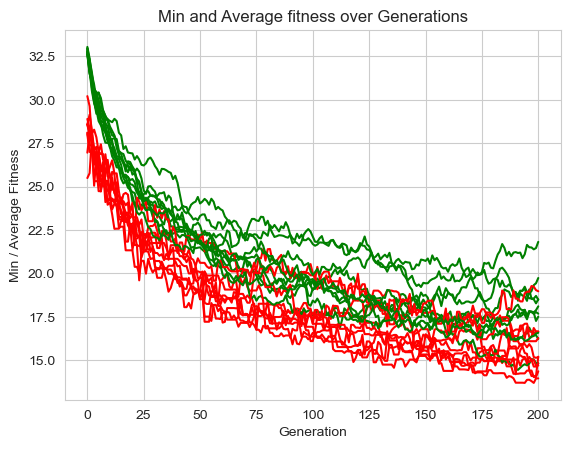

In [29]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Uses a higher mutation in this case doesn't help, it just introduces more randomness

In [30]:
POPULATION_SIZE = 300
P_MUTATION = 0.1 #Resetting back to original amount
P_CROSSOVER = 0.7 #Currently set to 0.7


gen	nevals	min    	avg    
0  	300   	26.8928	33.0203
1  	222   	27.0785	32.1587
2  	228   	27.0785	31.5075
3  	219   	25.267 	30.8309
4  	225   	25.5982	30.4852
5  	222   	23.7509	29.8261
6  	206   	25.1911	29.2941
7  	228   	23.4368	28.8307
8  	220   	23.4368	28.5862
9  	204   	22.9251	28.1344
10 	229   	23.5877	27.6786
11 	220   	23.5877	27.5668
12 	204   	23.5425	27.3657
13 	217   	23.8963	27.215 
14 	222   	23.4806	27.2564
15 	215   	22.9075	27.0703
16 	218   	22.3902	27.0952
17 	230   	21.3481	26.8637
18 	231   	21.7599	26.5686
19 	225   	22.0175	26.3012
20 	222   	21.7147	26.136 
21 	225   	21.7147	25.7353
22 	240   	21.8458	25.7626
23 	223   	21.2365	25.5723
24 	220   	21.2365	25.3119
25 	214   	21.1431	25.2357
26 	198   	20.2079	24.9753
27 	236   	20.6942	24.9362
28 	213   	21.1896	24.8453
29 	225   	21.0922	24.7748
30 	229   	19.9818	24.6861
31 	210   	19.9736	24.4293
32 	211   	19.4246	23.8276
33 	207   	18.664 	23.5481
34 	228   	18.664 	23.4423
35 	218   	18.4168	23.3578
3

103	220   	16.1873	20.3554
104	216   	16.1408	20.2613
105	234   	16.7156	20.4134
106	219   	16.7156	20.3535
107	204   	17.1449	20.2164
108	224   	17.0271	20.1687
109	234   	16.669 	20.1648
110	216   	16.669 	20.2759
111	232   	16.66  	20.5268
112	214   	16.66  	20.5871
113	214   	16.66  	20.5252
114	223   	16.2315	20.3795
115	221   	16.3547	20.2045
116	218   	16.5104	20.1437
117	199   	16.1969	19.9227
118	238   	16.1407	19.9999
119	226   	16.8157	20.0894
120	196   	15.6838	19.9976
121	221   	16.6113	19.9966
122	217   	16.6113	20.0415
123	212   	16.6113	20.0079
124	215   	16.6113	19.905 
125	204   	16.6113	19.87  
126	227   	16.6113	19.9896
127	226   	16.6113	20.0489
128	197   	16.6113	20.1113
129	227   	16.2579	20.4036
130	215   	15.9236	20.3482
131	193   	15.9236	20.2271
132	238   	16.3897	20.449 
133	197   	16.3897	20.3465
134	218   	16.3897	20.4175
135	203   	16.5524	20.1823
136	223   	16.2964	20.1602
137	205   	16.5524	19.9394
138	227   	16.3464	19.9643
139	222   	16.3464	19.9336
1

5  	211   	24.98  	29.6822
6  	228   	24.98  	29.2051
7  	193   	24.8248	28.7381
8  	208   	24.56  	28.3749
9  	232   	23.8835	28.0158
10 	206   	23.4421	27.5773
11 	228   	22.2096	27.4977
12 	230   	22.0476	27.3513
13 	224   	21.4071	27.0731
14 	223   	22.0476	26.818 
15 	218   	22.0476	26.5772
16 	200   	22.0476	26.4322
17 	203   	21.8258	25.9409
18 	230   	21.7282	25.8243
19 	197   	21.0408	25.5724
20 	233   	21.0408	25.6166
21 	224   	20.8013	25.5106
22 	231   	19.9369	25.4346
23 	214   	19.9733	25.228 
24 	216   	20.7717	24.7705
25 	233   	20.9811	24.73  
26 	237   	20.5273	24.6311
27 	224   	20.7034	24.5689
28 	199   	20.0384	24.5315
29 	238   	19.9601	24.3985
30 	206   	19.9601	24.2706
31 	224   	19.9601	24.175 
32 	221   	19.9601	23.9514
33 	236   	19.9601	24.1751
34 	231   	18.9796	24.2225
35 	214   	18.9796	24.3321
36 	194   	19.8233	24.1169
37 	225   	19.2796	24.0462
38 	219   	19.3831	23.8763
39 	221   	19.3647	23.5676
40 	209   	19.2245	23.3715
41 	218   	19.1177	23.3533
4

113	232   	16.2872	20.2421
114	204   	16.2872	20.1719
115	207   	16.3213	19.7033
116	207   	16.3213	19.4791
117	232   	16.2655	19.5108
118	213   	16.2435	19.3436
119	219   	15.7249	19.1813
120	221   	15.6468	19.186 
121	182   	15.8748	18.9669
122	220   	15.6978	18.9117
123	228   	15.6142	19.0814
124	242   	15.6978	19.2956
125	228   	15.7639	19.1393
126	210   	16.2131	19.3253
127	231   	15.1197	19.2711
128	243   	15.5938	19.4667
129	219   	15.5664	19.3166
130	222   	15.5938	19.1896
131	219   	15.482 	19.3126
132	229   	15.3226	19.239 
133	221   	15.3872	19.2744
134	251   	15.5938	19.3001
135	227   	15.5938	19.226 
136	204   	15.5938	18.914 
137	216   	15.5938	18.9213
138	219   	15.4085	18.7459
139	220   	15.1282	18.6042
140	236   	15.2949	18.6257
141	211   	15.3498	18.5387
142	217   	14.5071	18.5621
143	217   	15.3605	18.6549
144	200   	15.3605	18.6111
145	212   	15.1309	18.5781
146	226   	15.1309	18.5124
147	210   	15.1309	18.3781
148	231   	15.0895	18.4068
149	228   	15.0895	18.617 
1

27 	230   	20.8202	24.5134
28 	218   	20.3114	24.281 
29 	210   	20.3114	24.3789
30 	198   	19.1318	24.076 
31 	196   	20.3114	23.9242
32 	207   	20.3114	23.9463
33 	223   	19.1969	23.8448
34 	216   	19.1969	23.6831
35 	210   	19.1507	23.3617
36 	214   	19.1507	22.8745
37 	206   	18.552 	22.5822
38 	207   	18.6643	22.3218
39 	230   	18.6643	22.2498
40 	210   	18.2515	22.179 
41 	227   	18.2515	22.1414
42 	237   	18.2515	22.2725
43 	216   	18.6059	22.1189
44 	214   	18.8036	22.0108
45 	221   	18.2498	22.0153
46 	210   	18.4715	21.8413
47 	232   	18.6718	21.8431
48 	209   	18.5939	21.8026
49 	219   	18.4308	21.7761
50 	219   	17.9162	21.7211
51 	206   	18.2853	21.6495
52 	218   	17.9943	21.4661
53 	226   	18.0357	21.5511
54 	218   	17.6996	21.4007
55 	241   	18.451 	21.4517
56 	207   	16.9064	21.3932
57 	221   	17.4618	21.2675
58 	210   	18.1797	20.9357
59 	226   	17.646 	20.8753
60 	230   	18.0101	20.835 
61 	202   	17.8318	20.7895
62 	215   	16.6782	20.5904
63 	212   	17.2422	20.4779
6

155	228   	16.9805	20.7279
156	222   	15.6892	20.6972
157	218   	15.6892	20.6599
158	233   	16.4731	20.8186
159	215   	17.1084	20.9999
160	229   	17.1084	21.3403
161	209   	16.3281	21.3262
162	211   	17.1084	21.2386
163	220   	17.4581	21.2322
164	207   	16.5409	21.0437
165	219   	16.5409	21.1496
166	226   	16.5409	21.1998
167	222   	16.5409	21.5205
168	210   	17.3855	21.5755
169	223   	17.9044	21.7987
170	204   	17.4545	21.6751
171	220   	17.4545	21.5818
172	224   	17.4769	21.6186
173	223   	18.0265	21.6441
174	208   	18.0247	21.7437
175	208   	17.3961	21.5453
176	223   	17.1789	21.4007
177	226   	17.5601	21.5194
178	219   	17.0756	21.3955
179	213   	17.0756	21.339 
180	204   	16.7735	21.1682
181	181   	17.0756	20.9832
182	242   	16.713 	20.7829
183	233   	16.8316	20.6668
184	220   	16.8064	20.5678
185	235   	16.9068	20.5416
186	222   	17.5018	20.7656
187	233   	17.5018	20.7653
188	228   	17.466 	20.7184
189	201   	17.6103	20.6669
190	204   	17.2238	20.4385
191	225   	17.0857	20.3075
1

58 	223   	19.3663	23.5586
59 	231   	19.527 	23.575 
60 	228   	19.309 	23.7872
61 	208   	20.1773	23.6055
62 	218   	19.236 	23.5775
63 	227   	19     	23.5226
64 	210   	19.8375	23.4773
65 	219   	19.6153	23.4882
66 	234   	19.6153	23.7353
67 	225   	19.6153	23.7484
68 	242   	19.2627	23.8526
69 	204   	20.0345	23.8271
70 	222   	20.0984	23.868 
71 	219   	20.1608	23.8646
72 	227   	20.2528	23.7782
73 	232   	20.4159	23.81  
74 	217   	19.7764	23.7402
75 	208   	19.7764	23.6058
76 	249   	18.4522	23.5527
77 	242   	19.9738	23.3619
78 	193   	19.9738	23.2368
79 	211   	19.909 	23.2269
80 	180   	19.1781	22.8899
81 	227   	19.2729	22.8733
82 	221   	19.2729	22.8064
83 	232   	19.5429	22.9338
84 	218   	18.9398	22.8232
85 	220   	18.787 	22.9698
86 	214   	18.1669	22.8012
87 	216   	18.1029	22.7251
88 	213   	18.4559	22.67  
89 	220   	18.7515	22.6805
90 	236   	18.1263	22.715 
91 	211   	18.1263	22.6688
92 	211   	17.3637	22.2288
93 	216   	17.3317	22.1442
94 	204   	17.3317	22.0142
9

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


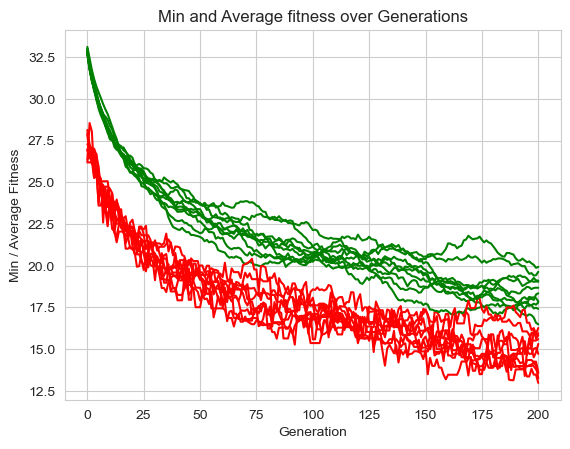

In [31]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

In [32]:
POPULATION_SIZE = 300
P_MUTATION = 0.1 #Resetting back to original amount
P_CROSSOVER = 0.9 #Currently set to 0.7

gen	nevals	min    	avg    
0  	300   	26.7445	32.9219
1  	263   	27.4438	32.101 
2  	261   	26.0621	31.4929
3  	267   	26.4813	30.9725
4  	258   	26.0681	30.6377
5  	276   	24.5871	30.4763
6  	269   	24.9379	29.9228
7  	275   	25.4357	29.738 
8  	274   	25.614 	29.5968
9  	278   	23.8205	29.2445
10 	275   	23.9388	28.7966
11 	279   	23.5593	28.567 
12 	282   	23.4954	28.3472
13 	278   	23.4597	27.9104
14 	283   	23.8128	27.8839
15 	274   	23.7351	27.6737
16 	272   	22.6516	27.5906
17 	274   	23.195 	27.8235
18 	274   	22.9326	27.9934
19 	280   	24.0278	27.9328
20 	263   	23.9468	27.652 
21 	268   	23.0473	27.6162
22 	286   	24.0844	27.7227
23 	269   	23.2813	27.6428
24 	281   	22.8714	27.6092
25 	280   	23.2433	27.7685
26 	256   	22.5819	27.5266
27 	270   	23.2684	27.4055
28 	275   	22.4618	27.4269
29 	265   	22.1326	27.5042
30 	276   	23.4057	27.4287
31 	276   	23.6513	27.3751
32 	265   	23.5561	27.2075
33 	273   	23.107 	27.0025
34 	280   	23.0588	27.0659
35 	272   	22.484 	26.7082
3

111	274   	19.8503	25.1194
112	290   	20.7782	25.0557
113	278   	20.6311	25.1157
114	272   	20.3055	25.0059
115	267   	20.7753	25.0432
116	279   	20.2981	25.0795
117	282   	21.0442	25.1571
118	265   	20.9669	25.1728
119	278   	20.4659	25.2509
120	264   	20.6654	25.3117
121	265   	20.5477	25.149 
122	271   	21.3198	25.2591
123	272   	21.4763	25.2828
124	277   	20.5555	25.2613
125	270   	20.8684	25.2606
126	277   	21.0571	25.2296
127	266   	21.0571	25.1164
128	266   	20.538 	25.0027
129	273   	20.538 	25.0637
130	273   	20.9792	25.2418
131	272   	21.1753	25.2414
132	270   	21.1753	25.0926
133	276   	20.3748	25.136 
134	278   	21.0041	25.3379
135	278   	20.7959	25.3746
136	269   	20.7959	25.2973
137	272   	20.8483	25.2135
138	275   	20.0644	25.2862
139	264   	20.3108	25.3047
140	282   	19.7867	25.1357
141	273   	19.7867	25.1723
142	284   	20.7167	25.2138
143	279   	19.382 	25.2005
144	268   	19.382 	25.2546
145	259   	19.382 	25.0254
146	276   	20.9868	25.2548
147	268   	21.5194	25.4058
1

11 	255   	23.5669	28.1085
12 	270   	23.19  	27.8052
13 	277   	23.2969	27.7564
14 	266   	21.9076	27.6733
15 	271   	23.3573	27.7103
16 	265   	21.8921	27.3116
17 	275   	22.8191	27.2505
18 	265   	22.987 	27.0447
19 	273   	22.4557	27.1329
20 	267   	22.9655	27.124 
21 	263   	22.4023	27.0368
22 	270   	21.6981	27.0292
23 	276   	21.6981	27.0325
24 	281   	22.3948	26.9152
25 	260   	22.5275	26.8819
26 	272   	22.1764	26.7571
27 	276   	21.3443	26.6927
28 	264   	22.4042	26.5977
29 	281   	22.4042	26.7407
30 	277   	22.4042	26.7942
31 	266   	23.0797	26.6566
32 	275   	22.275 	26.473 
33 	277   	22.2391	26.5257
34 	262   	21.4655	26.5049
35 	280   	22.2339	26.5276
36 	272   	21.3511	26.365 
37 	280   	21.8238	26.2186
38 	271   	21.8814	26.2368
39 	274   	21.8814	26.3887
40 	277   	21.8124	26.3184
41 	271   	22.0513	26.2396
42 	279   	22.074 	26.488 
43 	273   	21.5063	26.3049
44 	277   	21.4313	26.363 
45 	275   	21.8274	26.2909
46 	269   	22.4959	26.5574
47 	268   	21.8188	26.4864
4

129	272   	20.8635	25.5931
130	278   	21.096 	25.4537
131	281   	21.8773	25.4869
132	281   	21.3779	25.578 
133	282   	21.6427	25.6257
134	277   	21.2725	25.7788
135	265   	21.0471	25.5752
136	283   	21.3148	25.5678
137	276   	19.955 	25.3123
138	271   	19.6449	25.088 
139	268   	20.13  	25.1771
140	276   	20.13  	25.1812
141	258   	19.7451	25.0146
142	273   	19.5679	25.0206
143	267   	19.4114	24.925 
144	263   	19.4657	24.5983
145	275   	20.437 	24.4779
146	275   	20.7492	24.5997
147	279   	20.7492	24.7557
148	277   	20.8054	24.7743
149	271   	21.283 	24.6955
150	263   	21.15  	24.6982
151	272   	20.5855	24.6055
152	270   	20.5855	24.8463
153	276   	20.8062	24.9543
154	272   	20.467 	24.8379
155	282   	20.9329	25.1227
156	279   	20.9659	25.155 
157	264   	19.7458	25.2009
158	280   	20.7705	25.1536
159	275   	20.2425	25.2168
160	274   	19.892 	25.1655
161	273   	20.7641	25.1238
162	281   	21.223 	25.1   
163	271   	18.8008	25.0003
164	285   	18.8008	24.7447
165	264   	20.2241	24.7658
1

30 	259   	21.8719	26.4966
31 	266   	22.0288	26.2358
32 	279   	20.3882	26.3117
33 	280   	20.5934	26.1876
34 	277   	21.6696	26.09  
35 	269   	21.6355	25.9122
36 	270   	20.9767	25.6922
37 	269   	20.704 	25.4701
38 	266   	20.704 	25.3417
39 	260   	20.6032	25.2591
40 	272   	20.001 	24.9208
41 	270   	20.0553	24.5856
42 	272   	20.2921	24.4591
43 	272   	20.5543	24.4289
44 	275   	20.0183	24.5247
45 	277   	20.401 	24.5492
46 	274   	20.1241	24.6255
47 	283   	20.9829	24.8275
48 	274   	20.4433	24.9065
49 	266   	21.0126	24.8542
50 	273   	20.6639	24.9197
51 	277   	20.9476	24.8941
52 	272   	21.1911	25.0011
53 	270   	20.3684	24.9282
54 	277   	19.6579	24.8554
55 	280   	19.601 	24.9058
56 	272   	19.6955	24.8377
57 	271   	20.6918	24.9926
58 	279   	19.5417	24.9168
59 	263   	19.0583	24.8371
60 	276   	21.0719	25.0682
61 	267   	21.2236	25.0121
62 	278   	20.9198	24.9448
63 	271   	20.8212	24.7719
64 	276   	20.6634	24.9504
65 	261   	20.4309	24.925 
66 	273   	19.8881	24.8238
6

143	261   	20.7212	25.2122
144	275   	21.3222	25.3862
145	278   	21.3082	25.5695
146	273   	21.2671	25.7402
147	274   	19.6857	25.7106
148	283   	19.6857	25.5938
149	279   	20.5959	25.4594
150	283   	20.2163	25.371 
151	282   	20.4318	25.3863
152	270   	20.1396	25.2724
153	263   	20.2274	25.0625
154	272   	20.3897	25.1226
155	265   	20.2016	24.9409
156	289   	20.2016	24.8918
157	260   	20.7217	24.6207
158	276   	20.1872	24.6993
159	273   	19.1855	24.6412
160	282   	19.6132	24.8337
161	268   	19.6132	24.7418
162	273   	20.5716	24.6341
163	273   	20.5069	24.5161
164	270   	20.0264	24.4533
165	263   	20.0973	24.5413
166	276   	20.3217	24.5421
167	269   	20.3217	24.4514
168	268   	20.5649	24.3413
169	283   	20.6559	24.496 
170	275   	19.8953	24.3463
171	275   	20.2844	24.3465
172	275   	20.2698	24.3571
173	280   	20.1341	24.3913
174	270   	17.784 	24.4569
175	276   	18.2093	24.3054
176	266   	19.0807	24.4717
177	266   	20.3672	24.3335
178	272   	19.8507	24.454 
179	285   	20.1116	24.4119
1

58 	269   	21.0725	24.7396
59 	281   	19.9144	25.0262
60 	272   	19.9144	25.08  
61 	272   	20.1698	25.0512
62 	279   	20.8011	25.0837
63 	270   	20.7276	25.042 
64 	270   	19.5207	24.8452
65 	273   	20.832 	24.6993
66 	265   	20.832 	24.657 
67 	270   	18.8848	24.6842
68 	273   	19.875 	24.8217
69 	273   	20.2522	24.8784
70 	272   	20.7259	25.045 
71 	267   	21.1552	25.05  
72 	268   	20.988 	24.9847
73 	279   	19.9474	24.9694
74 	279   	19.4848	24.7811
75 	277   	20.2379	24.9362
76 	258   	20.2304	24.9144
77 	267   	20.2379	24.9784
78 	266   	19.1553	24.8882
79 	279   	20.1685	24.7827
80 	265   	20.6017	24.956 
81 	270   	20.5871	25.0819
82 	282   	20.6115	25.1295
83 	274   	20.6115	25.1257
84 	277   	20.3333	25.2812
85 	272   	20.4496	25.3304
86 	278   	21.1466	25.1836
87 	275   	19.1314	25.3902
88 	267   	20.8945	25.4681
89 	263   	20.9162	25.445 
90 	269   	21.143 	25.2204
91 	269   	21.0392	25.1381
92 	279   	21.0097	25.3996
93 	264   	21.1475	25.4761
94 	280   	20.8572	25.497 
9

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


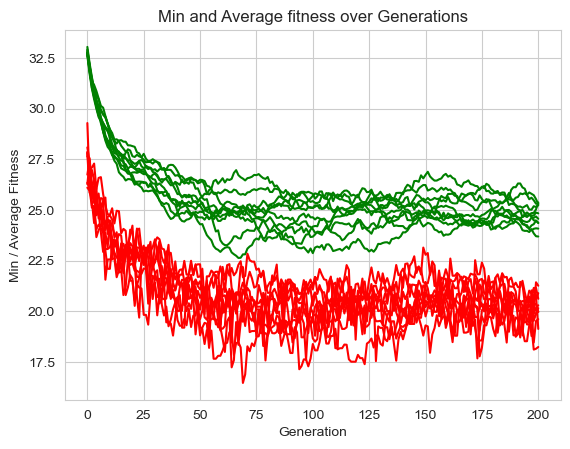

In [33]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

In [34]:
POPULATION_SIZE = 300
P_MUTATION = 0.1 #Resetting back to original amount
P_CROSSOVER = 0.5 #Currently set to 0.7

gen	nevals	min    	avg    
0  	300   	28.1593	32.8337
1  	155   	26.8685	31.7699
2  	179   	26.8685	31.1146
3  	155   	26.8685	30.4788
4  	174   	26.6117	29.9161
5  	157   	26.2421	29.4177
6  	159   	25.4078	28.9575
7  	165   	24.2441	28.5941
8  	175   	24.1758	28.0644
9  	160   	23.7187	27.7179
10 	153   	23.773 	27.3574
11 	182   	22.0133	27.0895
12 	159   	22.0133	26.7209
13 	145   	22.0133	26.3081
14 	184   	20.3548	26.0234
15 	167   	20.3548	25.784 
16 	170   	21.5259	25.4994
17 	166   	21.5259	25.2508
18 	189   	21.4543	25.1547
19 	165   	21.1944	25.1058
20 	150   	21.1461	24.6483
21 	146   	21.4543	24.1654
22 	174   	20.5844	24.0711
23 	178   	20.8162	24.1028
24 	167   	19.7131	23.8941
25 	174   	19.7131	23.4402
26 	168   	19.7131	23.212 
27 	145   	19.7131	23.0977
28 	177   	20.2001	23.2007
29 	182   	20.2001	22.99  
30 	147   	19.9052	22.7875
31 	170   	19.2454	22.5752
32 	174   	19.2454	22.4439
33 	158   	19.195 	22.2919
34 	143   	19.3515	22.1649
35 	180   	19.3515	22.0406
3

103	172   	14.4668	16.473 
104	179   	14.4668	16.3539
105	155   	14.4668	16.2574
106	181   	13.9517	16.0907
107	166   	13.9517	15.9979
108	161   	13.9517	15.8833
109	165   	13.9517	15.8948
110	171   	14.3367	15.7439
111	171   	14.172 	15.7141
112	177   	14.1273	15.8309
113	154   	14.1183	15.825 
114	151   	14.0226	15.6647
115	170   	13.2622	15.6309
116	180   	13.9275	15.6149
117	170   	13.9275	15.5718
118	130   	13.9275	15.4368
119	139   	13.9275	15.3997
120	168   	13.9275	15.2857
121	162   	13.5521	15.1991
122	140   	13.9275	15.0632
123	163   	13.8204	15.0645
124	165   	13.7579	15.0923
125	144   	13.7012	15.039 
126	167   	13.6886	14.9578
127	163   	13.6886	14.9789
128	150   	13.6886	14.8525
129	161   	13.5669	14.7672
130	173   	13.5669	14.7586
131	176   	13.3119	14.7279
132	157   	13.3119	14.7029
133	150   	13.4004	14.6258
134	172   	13.5458	14.5427
135	151   	13.4154	14.5205
136	152   	13.1627	14.5294
137	152   	13.3119	14.5006
138	168   	13.2147	14.4576
139	141   	13.3119	14.3607
1

3  	170   	26.2564	30.5013
4  	187   	25.481 	29.9618
5  	169   	25.8164	29.465 
6  	163   	25.333 	29.1377
7  	180   	24.605 	28.7208
8  	166   	24.605 	28.4455
9  	142   	24.3455	27.8704
10 	169   	23.7964	27.5181
11 	152   	24.442 	27.1637
12 	190   	23.7672	27.1442
13 	163   	24.0532	26.7995
14 	176   	23.6594	26.4609
15 	169   	20.5034	26.1442
16 	165   	20.5034	26.0025
17 	174   	22.9938	25.6169
18 	186   	21.6499	25.4332
19 	164   	21.6499	25.1634
20 	143   	21.0675	24.6336
21 	159   	21.0675	24.5283
22 	161   	21.0675	24.1314
23 	174   	19.2744	24.0635
24 	165   	19.2744	23.8752
25 	153   	19.2744	23.6789
26 	153   	19.2744	23.4486
27 	162   	19.2055	23.1798
28 	166   	19.4174	22.8748
29 	171   	19.6449	22.5591
30 	171   	19.1544	22.4069
31 	155   	19.1544	22.2072
32 	181   	19.1544	22.2247
33 	164   	18.7276	22.1978
34 	145   	18.5636	22.052 
35 	159   	18.5636	21.8153
36 	185   	18.5636	21.7177
37 	151   	17.9041	21.429 
38 	188   	18.5636	21.3367
39 	175   	18.4055	21.2555
4

110	147   	12.6646	14.8059
111	164   	12.7122	14.7441
112	164   	12.7122	14.6827
113	158   	12.7122	14.6559
114	158   	12.7122	14.5545
115	180   	12.7122	14.7961
116	188   	12.7773	14.7054
117	155   	12.7773	14.6298
118	163   	12.7773	14.56  
119	179   	12.5796	14.5927
120	165   	12.7773	14.5355
121	174   	12.7773	14.3131
122	150   	12.7651	14.17  
123	179   	12.6652	14.1709
124	153   	12.6621	14.0714
125	176   	12.2171	14.0858
126	156   	12.2171	13.8813
127	154   	12.2171	13.7961
128	178   	11.9642	13.7217
129	187   	11.9642	13.7028
130	154   	11.9642	13.5898
131	160   	11.9579	13.588 
132	149   	11.9642	13.4377
133	173   	11.9274	13.4302
134	163   	11.6687	13.3385
135	153   	11.6687	13.3062
136	167   	11.6539	13.1702
137	167   	11.6539	13.0311
138	172   	11.6539	12.9276
139	159   	11.635 	12.7532
140	143   	11.5225	12.7178
141	160   	11.5225	12.579 
142	165   	11.3932	12.3449
143	180   	11.3932	12.4807
144	151   	11.3932	12.2601
145	160   	11.3932	12.2935
146	143   	11.3932	12.1101
1

44 	173   	17.0036	20.6439
45 	164   	17.0036	20.5174
46 	166   	17.5312	20.4044
47 	151   	17.5312	20.2996
48 	161   	17.5312	20.2729
49 	156   	17.5256	20.1206
50 	149   	17.5256	19.9263
51 	162   	17.5256	19.9581
52 	168   	17.5256	19.8776
53 	143   	17.5256	19.6899
54 	167   	17.4142	19.7024
55 	169   	17.5256	19.7602
56 	183   	17.2764	19.865 
57 	172   	17.2016	19.8472
58 	145   	17.2016	19.7307
59 	161   	17.2016	19.7593
60 	168   	17.5256	19.6139
61 	162   	17.0818	19.5021
62 	159   	17.0818	19.4144
63 	147   	17.0818	19.0859
64 	176   	17.0818	19.1027
65 	165   	17.0818	18.8917
66 	147   	17.0818	18.5845
67 	172   	16.6388	18.5596
68 	163   	16.6388	18.3157
69 	167   	16.6388	18.1832
70 	160   	16.6388	18.0861
71 	171   	16.5968	18.0637
72 	186   	16.4814	18.0279
73 	163   	16.3996	17.971 
74 	153   	16.3996	17.929 
75 	156   	16.1825	17.9959
76 	177   	15.583 	17.9766
77 	188   	15.583 	17.9743
78 	155   	15.9955	17.8864
79 	163   	15.9955	17.9408
80 	160   	15.9955	17.8901
8

163	160   	11.2499	12.4559
164	175   	11.096 	12.5357
165	151   	11.096 	12.3969
166	153   	11.096 	12.4115
167	192   	11.1593	12.451 
168	176   	11.0236	12.3521
169	174   	11.1593	12.4407
170	176   	11.1593	12.4231
171	172   	11.063 	12.273 
172	184   	11.063 	12.407 
173	186   	11.063 	12.3441
174	153   	11.063 	12.2894
175	162   	11.0128	12.295 
176	164   	11.0128	12.2436
177	165   	11.039 	12.138 
178	146   	10.8867	12.0474
179	167   	10.8867	12.0423
180	156   	10.8867	11.9087
181	155   	10.8867	11.9332
182	153   	10.8867	11.9606
183	180   	10.8588	12.0636
184	161   	10.8588	12.1647
185	155   	11.063 	12.1339
186	173   	10.9748	12.2082
187	140   	10.9748	12.0883
188	152   	10.9748	11.9909
189	164   	10.9748	12.0633
190	166   	10.9522	12.0082
191	157   	10.9522	12.0799
192	156   	10.9522	11.9707
193	142   	10.9401	11.8896
194	161   	10.9522	11.9495
195	165   	10.8757	11.9038
196	163   	10.9217	11.9441
197	166   	10.9217	12.0434
198	187   	10.8395	12.013 
199	175   	10.8395	12.0109
2

85 	163   	16.0045	17.6289
86 	173   	15.6228	17.559 
87 	171   	15.5572	17.486 
88 	152   	15.5572	17.3643
89 	169   	15.3086	17.3329
90 	166   	15.2495	17.1487
91 	168   	15.2495	17.1242
92 	148   	15.1537	16.9709
93 	178   	15.1537	16.9621
94 	148   	14.8865	16.831 
95 	173   	14.8865	16.8691
96 	174   	14.8439	16.9357
97 	160   	15.1537	16.7545
98 	172   	15.0198	16.8152
99 	166   	15.0198	16.6753
100	170   	14.9029	16.6002
101	151   	14.7972	16.5909
102	186   	14.5302	16.5932
103	163   	14.4722	16.5305
104	163   	14.2979	16.3777
105	154   	14.2979	16.2179
106	177   	14.1319	16.267 
107	173   	14.1222	16.1188
108	153   	14.1222	15.963 
109	146   	14.0688	15.8324
110	173   	14.0688	15.8372
111	180   	14.0789	15.9157
112	165   	13.7586	15.7589
113	175   	13.834 	15.6707
114	154   	13.9675	15.6227
115	174   	13.7296	15.7415
116	152   	13.709 	15.5006
117	159   	13.709 	15.4117
118	170   	13.709 	15.4578
119	158   	13.709 	15.3615
120	168   	13.5659	15.3604
121	146   	13.5659	15.2162
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


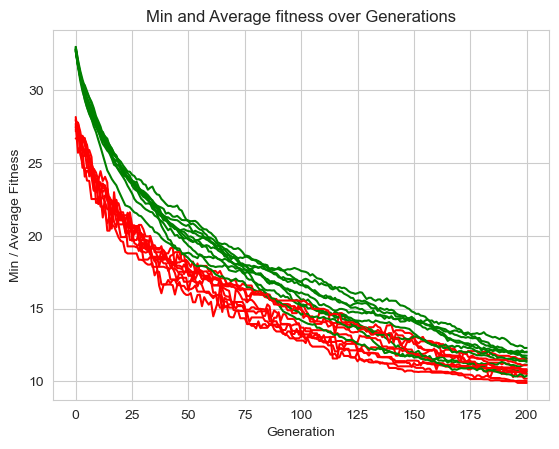

In [35]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Lowering probality of crossover results in the best current preforming algorithm

In [36]:
POPULATION_SIZE = 1000
P_MUTATION = 0.1 #Resetting back to original amount
P_CROSSOVER = 0.4 #before set to 0.5

gen	nevals	min    	avg    
0  	1000  	26.1272	32.8764
1  	476   	25.7504	32.0323
2  	457   	25.7504	31.162 
3  	472   	24.4806	30.466 
4  	448   	24.4806	29.8723
5  	445   	25.2041	29.31  
6  	453   	23.9719	28.731 
7  	458   	23.6888	28.1877
8  	482   	22.0237	27.7636
9  	465   	22.0775	27.4329
10 	449   	21.4632	27.0358
11 	476   	21.8639	26.6638
12 	451   	21.2981	26.2756
13 	476   	20.9566	25.9354
14 	465   	21.047 	25.5606
15 	455   	20.2674	25.2487
16 	453   	20.2674	24.8853
17 	530   	19.9353	24.5768
18 	447   	19.9353	24.2447
19 	488   	19.9353	24.0483
20 	442   	19.9353	23.7146
21 	465   	19.9353	23.4833
22 	467   	19.9353	23.2612
23 	476   	19.1933	23.0902
24 	475   	19.1933	22.8723
25 	454   	19.1933	22.7524
26 	437   	19.1933	22.6256
27 	444   	19.1933	22.5282
28 	459   	18.9455	22.3516
29 	454   	18.2059	22.2098
30 	488   	18.6594	21.9949
31 	485   	18.3692	21.9177
32 	469   	18.4236	21.7552
33 	451   	18.4236	21.5231
34 	471   	18.1557	21.3325
35 	459   	17.8215	21.1353
3

112	447   	11.4572	13.3365
113	429   	11.3279	13.174 
114	483   	11.3279	13.111 
115	403   	11.5449	12.9992
116	499   	10.8138	12.9972
117	495   	10.8138	12.9771
118	476   	11.0658	12.9122
119	514   	11.0658	13     
120	450   	11.0658	12.7649
121	469   	11.0658	12.7054
122	433   	11.0284	12.5536
123	458   	10.9446	12.4979
124	476   	11.0284	12.5153
125	514   	10.9069	12.4897
126	474   	10.8705	12.3838
127	480   	10.8705	12.3606
128	446   	10.7714	12.2439
129	438   	10.7713	12.0803
130	459   	10.6405	12.094 
131	451   	10.6405	11.9487
132	447   	10.6405	11.8872
133	468   	10.5051	11.8004
134	481   	10.5051	11.7116
135	416   	10.5051	11.6459
136	444   	10.5051	11.6186
137	454   	10.5051	11.5467
138	475   	10.5927	11.5912
139	462   	10.6023	11.5448
140	460   	10.6023	11.4934
141	466   	10.5764	11.4193
142	460   	10.4362	11.3773
143	511   	10.4362	11.4011
144	449   	10.4362	11.3471
145	510   	10.4362	11.2508
146	438   	10.4362	11.2191
147	456   	10.4362	11.104 
148	466   	10.4362	11.1414
1

19 	467   	20.1449	24.7101
20 	456   	20.1449	24.4831
21 	488   	19.7131	24.2212
22 	469   	19.7131	23.9361
23 	449   	19.5608	23.6474
24 	435   	19.5608	23.3599
25 	474   	19.7971	23.2237
26 	466   	19.0281	23.0348
27 	480   	19.0281	22.8748
28 	484   	18.9155	22.6973
29 	461   	19.1676	22.472 
30 	464   	19.1676	22.2439
31 	415   	18.8886	21.9166
32 	467   	18.8886	21.8254
33 	498   	18.8653	21.7357
34 	488   	18.2255	21.5331
35 	454   	17.9921	21.3599
36 	465   	17.1104	21.1585
37 	428   	17.1104	20.8921
38 	468   	17.1104	20.8086
39 	489   	17.1104	20.7038
40 	442   	17.1104	20.5589
41 	447   	17.3412	20.2872
42 	438   	17.3412	20.1981
43 	464   	17.3412	20.0009
44 	446   	16.6945	19.8511
45 	450   	16.6618	19.6832
46 	472   	16.9848	19.6287
47 	462   	16.5068	19.4076
48 	478   	16.8832	19.3795
49 	477   	16.6872	19.2387
50 	481   	15.7901	19.1501
51 	455   	15.7901	18.9612
52 	494   	15.7901	18.8558
53 	486   	16.237 	18.7926
54 	475   	15.609 	18.728 
55 	484   	15.8645	18.5754
5

128	480   	9.54163	10.7696
129	468   	9.54163	10.6828
130	417   	9.43452	10.6224
131	439   	9.43452	10.5532
132	470   	9.42375	10.5028
133	488   	9.40717	10.4436
134	435   	9.40717	10.362 
135	468   	9.34783	10.3219
136	469   	9.34783	10.2381
137	461   	9.34783	10.3019
138	454   	9.34783	10.1978
139	483   	9.34783	10.1759
140	493   	9.34783	10.1751
141	467   	9.29646	10.1516
142	475   	9.20977	10.1422
143	460   	9.20977	10.148 
144	431   	9.20977	10.0858
145	459   	9.20977	10.0251
146	459   	9.20977	10.0061
147	457   	9.20977	9.98168
148	480   	9.20977	9.95763
149	469   	9.20977	9.92349
150	448   	9.20977	9.90395
151	489   	9.20977	9.80122
152	449   	9.19036	9.82184
153	484   	9.19036	9.83451
154	475   	9.19036	9.83703
155	433   	9.19036	9.75008
156	460   	9.15187	9.69969
157	438   	9.13994	9.66972
158	459   	8.99215	9.64186
159	456   	9.13524	9.67739
160	488   	9.12556	9.73081
161	495   	9.12556	9.71325
162	486   	9.09509	9.71552
163	449   	9.09509	9.70202
164	462   	9.05102	9.66944
1

30 	481   	19.0325	22.5419
31 	449   	19.0325	22.3941
32 	462   	19.0325	22.2123
33 	485   	18.577 	22.0841
34 	481   	18.8072	21.9461
35 	447   	18.6947	21.7661
36 	473   	18.6888	21.6376
37 	458   	18.6888	21.5105
38 	428   	18.5258	21.3516
39 	453   	17.5068	21.1349
40 	427   	17.1354	20.9102
41 	460   	16.9941	20.7057
42 	480   	16.9941	20.5406
43 	441   	16.9941	20.3402
44 	454   	16.9941	20.2612
45 	479   	16.9235	20.1513
46 	472   	16.9235	20.036 
47 	497   	17.1415	19.8488
48 	472   	16.5172	19.6719
49 	433   	16.9557	19.4862
50 	477   	16.3274	19.3177
51 	454   	16.4411	19.1978
52 	453   	16.1759	19.1179
53 	436   	16.0604	18.9562
54 	462   	16.0604	18.8653
55 	455   	16.0604	18.718 
56 	451   	16.0604	18.623 
57 	455   	16.0604	18.5732
58 	463   	15.9915	18.3775
59 	454   	15.8801	18.2375
60 	482   	15.4857	18.1366
61 	461   	15.8801	18.0823
62 	470   	15.8491	18.0577
63 	478   	15.6889	18.0105
64 	453   	15.6944	17.8485
65 	481   	15.6019	17.8109
66 	440   	14.9952	17.6743
6

134	401   	11.7797	13.7384
135	454   	11.7755	13.7467
136	497   	11.7311	13.6964
137	432   	11.7311	13.5747
138	484   	11.6779	13.53  
139	457   	11.6675	13.4312
140	498   	11.3969	13.3398
141	458   	11.6675	13.248 
142	425   	11.6675	13.1131
143	473   	11.6485	13.0635
144	475   	11.6212	12.9041
145	457   	11.5297	12.7751
146	464   	11.5297	12.6918
147	441   	11.5297	12.5816
148	471   	11.5297	12.4934
149	438   	11.5297	12.4432
150	477   	11.3986	12.4712
151	464   	11.2988	12.3408
152	434   	11.2988	12.3003
153	456   	11.2988	12.2946
154	500   	11.2856	12.3194
155	430   	11.2856	12.2622
156	441   	11.2062	12.1846
157	439   	11.2062	12.1681
158	489   	11.2972	12.2196
159	462   	11.0532	12.2285
160	482   	11.1893	12.2595
161	458   	11.1809	12.1743
162	459   	11.2184	12.1537
163	458   	11.2235	12.1765
164	418   	11.2235	12.103 
165	443   	11.2235	12.045 
166	471   	11.2235	12.0999
167	433   	11.0239	12.0352
168	426   	11.0239	11.9447
169	439   	11.0239	11.9423
170	464   	11.0239	11.9504
1

37 	484   	19.2136	22.1778
38 	473   	19.0113	22.0196
39 	425   	18.5639	21.7553
40 	464   	18.5639	21.6528
41 	477   	17.824 	21.5611
42 	440   	18.5639	21.4237
43 	474   	17.9748	21.3253
44 	413   	17.9748	21.0082
45 	438   	17.9748	20.8384
46 	505   	17.9748	20.8449
47 	460   	17.9748	20.6485
48 	447   	17.4375	20.4438
49 	468   	17.4375	20.3457
50 	457   	17.6249	20.2139
51 	429   	17.6249	20.0697
52 	476   	17.2237	19.948 
53 	443   	17.2466	19.8208
54 	469   	17.1876	19.7545
55 	472   	17.0136	19.6955
56 	487   	15.7888	19.5452
57 	477   	15.7888	19.4503
58 	432   	15.7888	19.2517
59 	491   	15.7888	19.1266
60 	487   	15.7888	18.9689
61 	494   	15.7888	18.8426
62 	478   	15.2764	18.652 
63 	465   	14.6309	18.4111
64 	445   	14.5581	18.1372
65 	489   	14.5581	17.9587
66 	480   	14.5581	17.7652
67 	450   	14.1817	17.641 
68 	463   	14.2379	17.3676
69 	438   	14.2379	17.0733
70 	448   	14.3034	16.8948
71 	465   	14.3034	16.6714
72 	437   	14.2823	16.5502
73 	485   	14.0598	16.4607
7

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


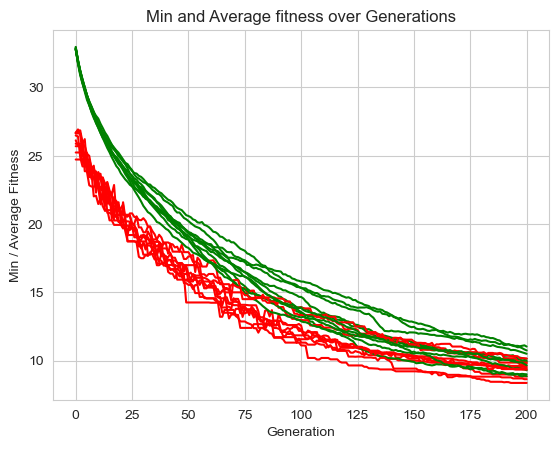

In [37]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Increasing population size makes our algorithm preform better in terms of minimizing fitness

In [38]:
POPULATION_SIZE = 1000
P_MUTATION = 0.05 #Resetting back to original amount
P_CROSSOVER = 0.4 

gen	nevals	min    	avg    
0  	1000  	26.9625	32.8775
1  	424   	26.8647	31.8529
2  	414   	26.7137	31.0745
3  	407   	26.0514	30.472 
4  	415   	26.0514	29.8514
5  	398   	24.5638	29.333 
6  	437   	24.5638	28.941 
7  	418   	24.5638	28.5159
8  	417   	23.1489	28.1467
9  	422   	23.1489	27.745 
10 	417   	22.4195	27.4144
11 	435   	22.6256	27.1678
12 	485   	21.719 	26.9665
13 	407   	21.719 	26.5837
14 	428   	21.5686	26.2953
15 	427   	21.1257	25.9319
16 	434   	22.0025	25.6619
17 	429   	22.2709	25.3461
18 	432   	21.2519	24.9952
19 	423   	21.355 	24.763 
20 	451   	21.8841	24.5615
21 	396   	21.3226	24.2823
22 	425   	20.6226	24.0584
23 	399   	20.9205	23.8792
24 	434   	20.6924	23.6718
25 	435   	20.6924	23.4614
26 	416   	18.9802	23.261 
27 	413   	18.9802	23.0373
28 	440   	19.2774	22.8738
29 	404   	19.4247	22.6727
30 	421   	19.4247	22.462 
31 	473   	19.4247	22.321 
32 	427   	18.5624	22.1499
33 	413   	18.5624	21.9979
34 	412   	18.3647	21.7801
35 	444   	18.1146	21.6811
3

106	425   	11.4438	12.6712
107	465   	11.4438	12.6484
108	446   	11.3378	12.6034
109	462   	11.3378	12.6202
110	413   	11.3378	12.5611
111	463   	11.3378	12.497 
112	410   	11.3311	12.4337
113	402   	11.3378	12.3562
114	436   	11.0441	12.2998
115	455   	11.28  	12.2703
116	438   	11.1351	12.1809
117	445   	11.1351	12.1403
118	415   	10.9947	12.0193
119	422   	10.9947	11.9215
120	426   	10.9947	11.8351
121	428   	10.991 	11.8016
122	425   	10.991 	11.7302
123	407   	10.701 	11.6613
124	448   	10.701 	11.6759
125	433   	10.701 	11.6107
126	427   	10.701 	11.5881
127	430   	10.7588	11.5382
128	446   	10.701 	11.4503
129	419   	10.701 	11.3724
130	494   	10.6986	11.3598
131	445   	10.6986	11.3039
132	408   	10.6986	11.2583
133	432   	10.6472	11.1969
134	451   	10.6472	11.2027
135	419   	10.5884	11.1514
136	415   	10.4772	11.1166
137	427   	10.4772	11.1138
138	426   	10.4772	11.0161
139	414   	10.4772	10.9795
140	430   	10.4772	10.8813
141	441   	10.4772	10.8268
142	424   	10.4772	10.7954
1

8  	432   	22.7813	27.9467
9  	433   	22.7813	27.6412
10 	469   	22.7813	27.3253
11 	376   	22.7813	26.9757
12 	405   	22.7813	26.5112
13 	436   	22.7813	26.2412
14 	424   	22.002 	25.9398
15 	409   	22.1174	25.6332
16 	418   	21.6967	25.2918
17 	468   	21.8338	25.0815
18 	431   	20.7735	24.8047
19 	413   	19.7219	24.5169
20 	434   	19.7219	24.2334
21 	449   	19.9467	24.0092
22 	422   	19.5509	23.7422
23 	445   	19.932 	23.4518
24 	431   	19.6874	23.1622
25 	452   	19.5548	22.8914
26 	447   	19.5548	22.7918
27 	425   	19.4685	22.4603
28 	416   	19.459 	22.2718
29 	434   	19.1679	21.9732
30 	438   	18.7236	21.7294
31 	462   	18.6806	21.5995
32 	429   	18.4513	21.4135
33 	408   	18.4513	21.1875
34 	468   	17.8226	21.0355
35 	410   	17.8226	20.8217
36 	417   	17.8226	20.6873
37 	449   	17.3945	20.5389
38 	401   	17.3945	20.3819
39 	409   	17.472 	20.286 
40 	400   	17.4508	20.0871
41 	475   	17.1025	19.9832
42 	420   	17.4508	19.8315
43 	435   	17.0014	19.7096
44 	433   	17.0014	19.6372
4

111	434   	11.6422	12.8994
112	447   	11.6422	12.8645
113	388   	11.6422	12.7267
114	398   	11.6422	12.5835
115	424   	11.6422	12.4725
116	394   	11.6422	12.3635
117	430   	11.6318	12.3138
118	448   	11.6318	12.2501
119	444   	11.5542	12.2364
120	396   	11.5462	12.2317
121	439   	11.362 	12.2184
122	424   	11.3926	12.2479
123	403   	11.3926	12.1507
124	418   	11.3926	12.1789
125	437   	11.3926	12.1526
126	396   	11.3867	12.0844
127	424   	11.3867	12.0477
128	423   	11.3867	12.0016
129	440   	11.3556	11.9874
130	468   	11.362 	12.0361
131	448   	11.349 	12.0109
132	456   	11.349 	11.9723
133	411   	11.3404	11.9885
134	396   	11.3407	11.8494
135	416   	11.2292	11.7721
136	400   	11.2292	11.7142
137	445   	11.2292	11.6598
138	446   	11.2292	11.6749
139	471   	11.2292	11.6731
140	435   	11.0691	11.615 
141	423   	11.0691	11.5853
142	427   	11.0691	11.5298
143	462   	11.0391	11.537 
144	452   	11.0391	11.5583
145	430   	10.8717	11.508 
146	383   	11.0391	11.5127
147	402   	11.0391	11.5333
1

11 	437   	22.7991	26.6654
12 	427   	22.7991	26.334 
13 	409   	22.5283	25.9732
14 	429   	22.0374	25.6834
15 	441   	22.0374	25.4578
16 	448   	21.753 	25.2381
17 	426   	21.753 	24.9576
18 	398   	21.753 	24.7328
19 	473   	21.5212	24.6192
20 	439   	20.2139	24.4662
21 	417   	20.0535	24.2435
22 	392   	20.0535	24.0144
23 	425   	19.9684	23.8594
24 	464   	20.0535	23.6736
25 	408   	19.9954	23.3753
26 	405   	19.9954	23.1726
27 	422   	19.8728	23.01  
28 	433   	19.5847	22.7308
29 	403   	18.7174	22.3249
30 	428   	18.7174	22.0361
31 	440   	18.6646	21.7779
32 	425   	18.3543	21.5326
33 	429   	18.3543	21.2756
34 	434   	17.376 	21.0381
35 	472   	18.0507	20.8384
36 	387   	18.0507	20.6539
37 	443   	17.7862	20.5045
38 	418   	16.8483	20.3307
39 	430   	17.7361	20.1538
40 	404   	17.4018	19.9548
41 	433   	17.4018	19.7581
42 	438   	17.4018	19.619 
43 	443   	16.9308	19.5094
44 	427   	16.9308	19.3873
45 	414   	16.8411	19.292 
46 	440   	16.4869	19.1822
47 	418   	16.67  	19.0814
4

115	405   	12.25  	13.891 
116	463   	12.25  	13.9023
117	455   	12.25  	13.8297
118	419   	12.25  	13.8537
119	439   	12.4641	13.8287
120	409   	12.4641	13.7439
121	435   	12.4641	13.7365
122	448   	12.3878	13.6918
123	421   	12.3878	13.6395
124	425   	12.3437	13.5223
125	422   	12.1955	13.4381
126	421   	12.1955	13.3685
127	453   	12.1955	13.2602
128	441   	12.1955	13.1719
129	423   	12.1955	13.0885
130	456   	12.1846	13.0629
131	403   	12.1846	12.9674
132	415   	11.9375	12.8645
133	441   	11.8835	12.8487
134	424   	11.8835	12.8043
135	415   	11.8452	12.7789
136	459   	11.8452	12.79  
137	407   	11.9375	12.7569
138	442   	11.6429	12.7052
139	452   	11.4217	12.7091
140	431   	11.4217	12.7018
141	430   	11.7192	12.6202
142	433   	11.6937	12.5864
143	436   	11.4033	12.5533
144	443   	11.4033	12.4697
145	423   	11.4033	12.4047
146	440   	11.2788	12.4224
147	413   	11.2788	12.3763
148	417   	11.1347	12.3167
149	436   	11.1347	12.2845
150	416   	11.1347	12.2938
151	426   	11.1347	12.2341
1

23 	423   	19.5049	22.8354
24 	432   	19.4166	22.5774
25 	414   	19.5359	22.2902
26 	397   	18.0095	22.0454
27 	424   	18.0095	21.7787
28 	436   	18.4666	21.6248
29 	424   	18.4666	21.453 
30 	420   	18.2163	21.2369
31 	394   	17.4619	20.912 
32 	444   	17.4198	20.7707
33 	408   	17.4198	20.535 
34 	460   	16.8502	20.3824
35 	435   	17.2092	20.2172
36 	423   	17.4198	19.9913
37 	426   	17.0606	19.8111
38 	444   	16.7879	19.6265
39 	482   	16.7835	19.4069
40 	410   	16.7879	19.213 
41 	436   	15.9044	19.0857
42 	451   	16.0272	18.9175
43 	425   	16.0272	18.7936
44 	414   	16.0272	18.6416
45 	415   	16.0272	18.5454
46 	446   	15.9346	18.4406
47 	446   	15.9346	18.3005
48 	426   	15.546 	18.1607
49 	409   	15.1772	17.9622
50 	393   	14.5665	17.802 
51 	417   	14.5665	17.7071
52 	423   	14.5665	17.5521
53 	407   	14.5665	17.3971
54 	362   	14.5665	17.1705
55 	397   	14.5665	17.0051
56 	411   	14.5665	16.9166
57 	440   	14.0285	16.8411
58 	440   	14.5665	16.6938
59 	488   	14.4465	16.8038
6

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


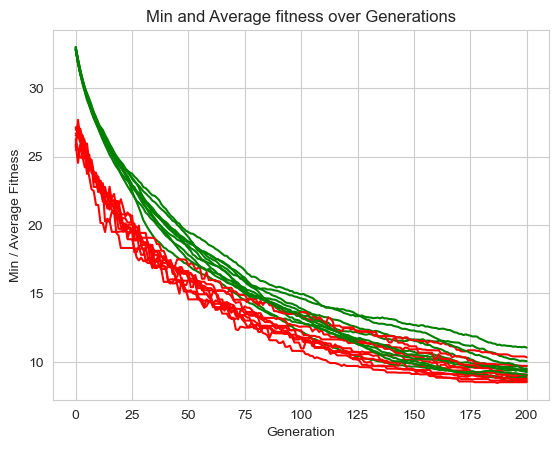

In [39]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

The same as prior algorithm except mutation of 0.05

In [40]:
POPULATION_SIZE = 300
P_MUTATION = 0.05 #Resetting back to original amount
P_CROSSOVER = 0.4 

gen	nevals	min   	avg    
0  	300   	28.089	32.8667
1  	132   	26.8993	31.9444
2  	132   	26.0594	31.1436
3  	142   	25.9165	30.5554
4  	120   	25.5855	29.9926
5  	127   	25.5855	29.4671
6  	113   	25.0784	29.0681
7  	130   	24.6796	28.6515
8  	149   	24.6796	28.1324
9  	134   	24.5833	27.8723
10 	124   	24.6796	27.5424
11 	137   	24.6796	27.298 
12 	125   	24.5248	27.1258
13 	123   	23.8625	26.773 
14 	162   	22.8861	26.6953
15 	136   	22.8861	26.5012
16 	142   	22.8861	26.3967
17 	116   	22.2697	26.1187
18 	135   	22.2697	25.8876
19 	129   	21.9082	25.5492
20 	131   	21.9082	25.2777
21 	124   	21.4261	25.0013
22 	108   	21.4261	24.677 
23 	142   	20.917 	24.5483
24 	138   	20.917 	24.1368
25 	134   	20.917 	23.9241
26 	143   	20.2083	23.7578
27 	132   	19.9905	23.4583
28 	119   	19.9905	23.1824
29 	136   	19.9905	22.8329
30 	139   	19.162 	22.6655
31 	132   	19.9905	22.4131
32 	149   	19.2285	22.2116
33 	142   	19.5864	22.0177
34 	115   	19.4536	21.7866
35 	133   	18.8009	21.5808
36 

110	134   	13.5083	14.0167
111	128   	13.3867	13.9915
112	108   	13.3867	14.0179
113	128   	13.1838	13.9401
114	144   	13.1838	13.9534
115	124   	13.1838	13.9695
116	133   	13.1838	13.9391
117	132   	13.0808	13.9404
118	131   	12.8832	13.832 
119	145   	12.8832	13.735 
120	109   	12.8832	13.6425
121	153   	12.6873	13.6399
122	144   	12.2329	13.5854
123	125   	12.6873	13.4617
124	127   	12.3065	13.4331
125	131   	12.1393	13.3127
126	124   	12.1393	13.2316
127	124   	12.1393	13.1658
128	145   	12.1256	13.1429
129	148   	12.1256	13.1369
130	121   	12.1256	12.9833
131	141   	12.1256	12.9933
132	126   	12.1256	12.7804
133	137   	12.1256	12.6354
134	103   	12.1089	12.5057
135	145   	12.1089	12.4336
136	139   	12.024 	12.315 
137	140   	12.024 	12.3267
138	145   	11.9435	12.3176
139	121   	11.9435	12.1943
140	115   	11.9435	12.1714
141	130   	11.9131	12.2309
142	140   	11.9131	12.1699
143	123   	11.9083	12.248 
144	100   	11.9083	12.1943
145	128   	11.9083	12.1892
146	148   	11.5902	12.1475
1

34 	126   	17.6412	20.2471
35 	102   	17.6412	19.9876
36 	132   	17.7356	19.9634
37 	124   	17.6169	19.8443
38 	123   	17.2733	19.641 
39 	124   	17.176 	19.4869
40 	150   	17.176 	19.4244
41 	150   	16.9924	19.3206
42 	133   	17.176 	19.0356
43 	120   	17.1013	18.8705
44 	143   	17.0895	18.7664
45 	132   	16.6753	18.6953
46 	125   	16.6753	18.6667
47 	125   	16.6753	18.4985
48 	134   	16.3666	18.3347
49 	146   	16.3666	18.2419
50 	131   	16.3666	18.116 
51 	114   	16.1944	17.8745
52 	110   	16.1944	17.7264
53 	120   	15.6088	17.6279
54 	141   	16.0128	17.4617
55 	123   	16.0128	17.3172
56 	117   	15.2019	17.1139
57 	128   	14.6042	16.9686
58 	127   	14.6042	16.9191
59 	137   	15.7014	16.8269
60 	144   	15.434 	16.7895
61 	125   	15.3907	16.7087
62 	121   	15.3145	16.5781
63 	133   	15.2776	16.5321
64 	139   	14.7905	16.4626
65 	118   	14.7905	16.3383
66 	109   	14.766 	16.197 
67 	101   	14.186 	16.065 
68 	142   	14.186 	16.0646
69 	123   	14.186 	15.8596
70 	124   	14.186 	15.7326
7

164	132   	11.465 	12.0916
165	137   	11.465 	12.0233
166	140   	11.465 	12.0142
167	131   	11.465 	11.9575
168	140   	11.465 	11.9169
169	125   	11.465 	11.8771
170	131   	11.465 	11.9092
171	134   	11.465 	11.948 
172	116   	11.4459	11.7908
173	123   	11.4459	11.6995
174	144   	11.4459	11.6828
175	125   	11.4459	11.6284
176	119   	11.4459	11.5215
177	123   	11.4459	11.6242
178	135   	11.4459	11.5758
179	137   	11.4459	11.6193
180	138   	11.4459	11.6008
181	124   	11.4459	11.6342
182	113   	11.4459	11.6378
183	133   	11.4459	11.6367
184	124   	11.4459	11.555 
185	140   	11.4459	11.5382
186	133   	11.4459	11.5347
187	132   	11.4459	11.5186
188	101   	11.4459	11.4897
189	132   	11.4459	11.5219
190	140   	11.4459	11.5367
191	135   	11.4434	11.564 
192	133   	11.4434	11.5287
193	151   	11.4459	11.5665
194	123   	11.4459	11.5355
195	155   	11.4459	11.51  
196	129   	11.4459	11.4668
197	136   	11.4459	11.5157
198	129   	11.4459	11.5217
199	133   	11.339 	11.5243
200	116   	11.339 	11.52  
g

72 	137   	13.2934	15.0615
73 	134   	13.2934	14.9716
74 	119   	13.2934	14.9007
75 	131   	13.2927	14.8876
76 	126   	13.2927	14.7963
77 	135   	13.2927	14.6594
78 	152   	13.2626	14.6898
79 	143   	13.1815	14.5922
80 	128   	13.1441	14.4121
81 	124   	12.9849	14.2393
82 	151   	12.8137	14.1612
83 	113   	12.8137	13.8899
84 	130   	12.8137	13.7897
85 	127   	12.8137	13.6651
86 	130   	12.8137	13.7119
87 	134   	12.8137	13.7032
88 	142   	12.005 	13.6265
89 	133   	12.4924	13.5445
90 	125   	12.4924	13.4621
91 	127   	12.4924	13.4124
92 	132   	12.005 	13.4304
93 	145   	12.005 	13.3622
94 	106   	12.005 	13.213 
95 	142   	12.005 	13.1566
96 	123   	11.8144	13.1171
97 	132   	12.005 	13.0662
98 	153   	11.6136	13.0078
99 	133   	11.6136	12.9398
100	145   	11.6136	12.8984
101	147   	11.6136	12.7961
102	130   	11.6136	12.6127
103	127   	10.8784	12.411 
104	122   	11.6136	12.3245
105	116   	11.6136	12.1751
106	127   	11.6136	12.1801
107	138   	11.0486	12.1752
108	138   	11.1675	12.128 
1

2  	128   	27.1523	30.6751
3  	128   	26.5711	29.8268
4  	120   	25.389 	29.2573
5  	137   	25.3807	28.9321
6  	117   	25.3807	28.4913
7  	133   	23.9727	28.1604
8  	152   	23.8736	27.8282
9  	151   	23.1548	27.5673
10 	114   	23.1548	27.1246
11 	121   	23.1548	26.8567
12 	122   	23.1548	26.5194
13 	143   	23.3574	26.3205
14 	133   	22.9125	26.0577
15 	124   	22.9125	25.7303
16 	134   	22.8663	25.436 
17 	139   	21.6177	25.1148
18 	117   	21.4134	24.7258
19 	135   	20.8017	24.4114
20 	115   	20.9165	24.09  
21 	144   	20.9165	23.8435
22 	132   	20.6642	23.513 
23 	154   	20.9603	23.4216
24 	128   	20.9603	23.1183
25 	112   	20.3328	22.7631
26 	123   	20.5326	22.4588
27 	129   	20.5326	22.3396
28 	127   	20.3532	22.1395
29 	106   	20.3532	21.9002
30 	110   	20.0969	21.7963
31 	133   	19.7124	21.5064
32 	149   	18.8418	21.4058
33 	147   	18.8418	21.1618
34 	158   	19.4756	21.0753
35 	119   	19.2533	20.8533
36 	130   	18.9904	20.7735
37 	133   	18.7002	20.5595
38 	125   	18.4262	20.4182
3

120	142   	12.8159	13.7159
121	148   	12.8159	13.6802
122	126   	12.8159	13.5963
123	133   	12.8159	13.5194
124	140   	12.8159	13.4435
125	127   	12.8159	13.351 
126	127   	12.7811	13.2662
127	147   	12.5782	13.2759
128	130   	12.5782	13.2338
129	128   	12.5782	13.1542
130	152   	12.4348	13.0901
131	120   	12.4348	12.9522
132	112   	12.4348	12.9239
133	108   	12.4348	12.9329
134	126   	12.4348	12.8957
135	132   	12.4348	12.9243
136	121   	12.4348	12.9076
137	114   	12.4348	12.9183
138	121   	12.4025	12.8755
139	141   	12.1166	12.85  
140	118   	12.404 	12.7699
141	126   	12.1624	12.7384
142	113   	12.1624	12.7076
143	125   	12.1624	12.6504
144	105   	12.1166	12.7516
145	122   	12.0229	12.6564
146	118   	12.0229	12.6322
147	143   	12.0229	12.7168
148	132   	12.0229	12.6005
149	136   	12.0229	12.609 
150	160   	11.9419	12.6176
151	128   	11.9419	12.5425
152	119   	11.9419	12.4438
153	108   	11.9419	12.3369
154	137   	11.9419	12.285 
155	153   	11.8149	12.2608
156	106   	11.8149	12.1894
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


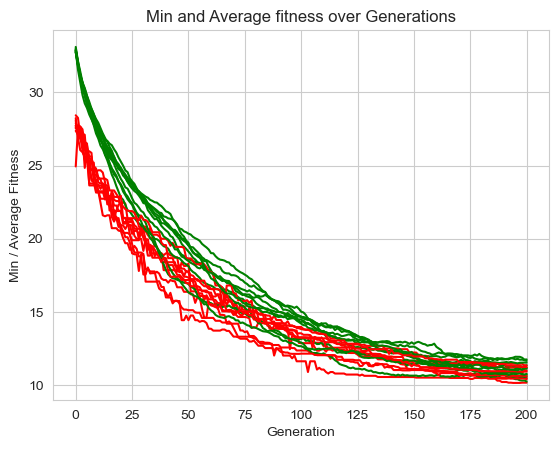

In [41]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

In [42]:
print(results_df)

    Avg Fitness Population Max Generations  P_Crossover  P_Mutation  \
0     89.489767        300             200          0.9        0.10   
1     22.677944         50             200          0.9        0.10   
2     14.425330         50             200          0.7        0.10   
3     15.605909        100             200          0.7        0.10   
4     17.951738         50             200          0.7        0.20   
5     18.429167        300             200          0.7        0.10   
6     24.710754        300             200          0.9        0.10   
7     11.470245        300             200          0.5        0.10   
8      9.908314       1000             200          0.4        0.10   
9      9.465736       1000             200          0.4        0.05   
10    11.078780        300             200          0.4        0.05   

               Selection Method Crossover Method  \
0                            ()               ()   
1   selTournament (tournsize=2)     cxOrder

## The best parameters

From the experiments the best parameters are having a crossover of 0.4 and a mutation of 0.05 this is due to the average fitness being lowest when using these parameters.
The best population size is 1000 from the testing, a greater population size would most likely lower fitness more but it is too computationally expensive, same goes for having a greater generation size - It will slow down testing and most likely only net slightly better returns.

# Base on the results from (2) and (3), decide on a suitable set of parameters for 50 cities. Use this setting for later experiments.

Based on the results above, I will be using the best preforming parameters, which is 


- POPULATION_SIZE = 300 - this is due to speed
- P_MUTATION = 0.05
- P_CROSSOVER = 0.4 

# Experiment with different parent selection mechanisms and compare the results of 10 runs each.

## Choosing Selection mechanism
The below selection revolves around looking at different selection techniques.

In [43]:

toolbox.register("select", tools.selTournament, tournsize=4)
update_methods() #this updates selection method
P_CROSSOVER = 0.4 #already set to this

gen	nevals	min    	avg   
0  	300   	28.3298	32.904
1  	115   	28.097 	31.0942
2  	134   	25.4524	29.7224
3  	119   	25.4524	28.7953
4  	133   	23.7943	28.3068
5  	130   	23.7943	27.4553
6  	141   	23.3782	26.4831
7  	132   	22.4731	25.5035
8  	113   	22.4731	24.5402
9  	144   	22.4731	24.1318
10 	112   	21.5014	23.7452
11 	113   	21.5014	23.2697
12 	126   	21.0974	22.7775
13 	141   	21.0974	22.4731
14 	124   	20.531 	22.2185
15 	118   	20.531 	21.8781
16 	117   	20.531 	21.6766
17 	119   	19.9209	21.4703
18 	130   	19.9209	21.2282
19 	94    	19.9209	20.8352
20 	121   	19.1674	20.6657
21 	127   	19.1674	20.6182
22 	131   	18.6716	20.3257
23 	137   	18.6716	20.1745
24 	138   	18.1729	19.9262
25 	126   	18.1729	19.5527
26 	124   	17.9802	19.2309
27 	108   	17.8323	18.9288
28 	117   	17.0761	18.6555
29 	136   	16.7341	18.5381
30 	130   	16.7203	18.3079
31 	122   	16.7203	18.0282
32 	134   	16.1262	17.7235
33 	125   	16.0138	17.3278
34 	135   	16.0138	17.0391
35 	137   	15.687 	16.866 
36 

117	127   	11.4843	11.6465
118	119   	11.4843	11.5537
119	119   	11.4843	11.5209
120	107   	11.4843	11.5293
121	99    	11.4843	11.5352
122	143   	11.4843	11.5905
123	120   	11.4843	11.5743
124	104   	11.45  	11.5572
125	140   	11.45  	11.5711
126	125   	11.45  	11.5379
127	125   	11.45  	11.5759
128	114   	11.45  	11.6664
129	135   	11.45  	11.6634
130	136   	11.45  	11.5129
131	100   	11.45  	11.4878
132	114   	11.45  	11.5267
133	132   	11.3708	11.5273
134	135   	11.3708	11.5047
135	138   	11.3708	11.5815
136	148   	11.3708	11.5274
137	111   	11.3708	11.6354
138	144   	11.3708	11.5314
139	132   	11.3708	11.4686
140	130   	11.3708	11.477 
141	115   	11.3708	11.4139
142	138   	11.3708	11.4477
143	127   	11.3708	11.5114
144	145   	11.3708	11.466 
145	150   	11.3708	11.421 
146	139   	11.3708	11.4618
147	120   	11.3708	11.4739
148	124   	11.3708	11.5021
149	116   	11.3708	11.4827
150	114   	11.3708	11.4141
151	143   	11.3708	11.4177
152	104   	11.3708	11.444 
153	135   	11.3708	11.4199
1

22 	108   	17.0278	18.7541
23 	111   	17.0278	18.4478
24 	163   	16.8148	18.1743
25 	139   	16.7734	17.8147
26 	133   	16.7734	17.6141
27 	131   	16.5087	17.4512
28 	140   	16.3088	17.2978
29 	138   	16.1199	17.074 
30 	115   	16.1199	16.9547
31 	109   	16.1199	16.7317
32 	134   	15.8339	16.6149
33 	132   	15.7481	16.4785
34 	144   	15.4942	16.3149
35 	117   	15.3322	16.141 
36 	131   	15.3322	16.0246
37 	138   	15.3322	15.9682
38 	125   	14.9309	15.8589
39 	122   	14.9029	15.6367
40 	130   	14.3103	15.5832
41 	131   	14.3103	15.4302
42 	137   	14.1002	15.2927
43 	144   	14.1002	14.9879
44 	133   	13.9148	14.8121
45 	132   	13.7971	14.5553
46 	143   	13.7971	14.3905
47 	126   	13.7971	14.3855
48 	127   	13.7384	14.1458
49 	139   	13.5707	14.0719
50 	144   	13.496 	13.9827
51 	148   	13.496 	14.0085
52 	133   	13.2612	13.8505
53 	144   	13.2612	13.8167
54 	145   	13.1015	13.713 
55 	123   	13.1015	13.7348
56 	129   	13.1015	13.5262
57 	124   	12.8363	13.4105
58 	133   	12.6503	13.4114
5

137	129   	9.91419	10.0139
138	144   	9.91419	10.0065
139	134   	9.91419	9.99796
140	142   	9.91419	9.95128
141	155   	9.91419	9.92371
142	132   	9.91419	9.94805
143	127   	9.91419	9.98593
144	133   	9.91419	10.0376
145	159   	9.91419	9.98774
146	109   	9.91419	9.99155
147	118   	9.91364	10.0201
148	125   	9.91364	10.0012
149	123   	9.91364	10.0329
150	110   	9.91148	9.98788
151	122   	9.91148	9.99596
152	153   	9.91148	10.0437
153	145   	9.91148	10.0202
154	116   	9.91148	9.983  
155	140   	9.91148	10.0325
156	112   	9.91148	10.0049
157	113   	9.91148	9.93668
158	128   	9.91148	9.95964
159	128   	9.91148	9.99319
160	140   	9.91148	9.93087
161	132   	9.91148	9.9687 
162	132   	9.87803	10.0163
163	125   	9.87803	9.97029
164	140   	9.86754	10.0772
165	136   	9.86754	9.99596
166	103   	9.67996	9.98699
167	132   	9.67996	10.0219
168	126   	9.67996	10.0356
169	126   	9.67996	10.0301
170	145   	9.66628	9.99287
171	139   	9.63379	10.0847
172	123   	9.63379	9.9432 
173	138   	9.63379	9.95028
1

44 	139   	15.6848	15.9579
45 	142   	15.5127	15.8742
46 	138   	15.5127	15.8411
47 	136   	15.3481	15.8264
48 	148   	15.2609	15.8169
49 	146   	15.1698	15.7575
50 	128   	15.1698	15.7537
51 	136   	14.9735	15.5856
52 	120   	14.7798	15.4448
53 	128   	14.5341	15.3674
54 	131   	14.5341	15.1756
55 	112   	14.5341	14.9611
56 	110   	14.5341	14.8218
57 	128   	14.4541	14.6721
58 	116   	14.2052	14.6124
59 	110   	14.2052	14.626 
60 	133   	14.2052	14.7208
61 	112   	13.9736	14.6231
62 	132   	13.973 	14.608 
63 	133   	13.92  	14.414 
64 	114   	13.92  	14.2824
65 	117   	13.8118	14.3294
66 	137   	13.58  	14.3154
67 	121   	13.58  	14.1707
68 	136   	13.4497	14.1967
69 	110   	13.4497	14.0326
70 	141   	13.4497	13.9844
71 	136   	13.4497	13.9834
72 	127   	13.2545	13.8302
73 	127   	13.1824	13.6724
74 	141   	13.1824	13.5939
75 	140   	13.1824	13.614 
76 	145   	13.1824	13.6166
77 	132   	13.1824	13.3717
78 	132   	13.1824	13.2425
79 	154   	13.1824	13.2836
80 	118   	13.1824	13.2926
8

167	144   	11.0119	11.1022
168	104   	11.0119	11.0862
169	132   	11.0119	11.0628
170	141   	11.0119	11.1272
171	116   	11.0119	11.1151
172	130   	11.0119	11.1307
173	127   	11.0119	11.0718
174	131   	11.0119	11.1401
175	134   	11.0119	11.168 
176	125   	11.0119	11.0839
177	117   	11.0119	11.0797
178	119   	11.0119	11.0946
179	125   	11.0119	11.1781
180	105   	11.0119	11.0935
181	149   	11.0119	11.0718
182	138   	11.0119	11.0797
183	106   	11.0119	11.1079
184	147   	11.0119	11.1011
185	114   	11.0119	11.0771
186	122   	11.0119	11.0774
187	127   	11.0119	11.0548
188	133   	11.0119	11.0463
189	128   	10.326 	11.0661
190	139   	10.326 	11.0442
191	137   	10.326 	11.0883
192	127   	10.326 	11.0276
193	121   	10.326 	10.6614
194	134   	10.326 	10.4179
195	104   	10.326 	10.4081
196	138   	10.326 	10.4212
197	152   	10.326 	10.3803
198	114   	10.326 	10.4292
199	107   	10.326 	10.406 
200	139   	10.326 	10.4664
gen	nevals	min    	avg    
0  	300   	28.1516	32.8845
1  	130   	27.2461	31.2208
2

69 	130   	11.9924	12.3337
70 	119   	11.9924	12.2921
71 	140   	11.9924	12.2821
72 	119   	11.958 	12.3312
73 	139   	11.8775	12.3943
74 	133   	11.7883	12.2712
75 	130   	11.7764	12.1272
76 	144   	11.671 	12.1399
77 	130   	11.627 	12.0978
78 	135   	11.6152	12.0173
79 	117   	11.6152	11.9133
80 	127   	11.6152	11.8863
81 	134   	11.5661	11.7388
82 	134   	11.5661	11.8865
83 	115   	11.5312	11.8027
84 	124   	11.5312	11.7837
85 	131   	11.4754	11.6415
86 	127   	11.4754	11.709 
87 	139   	11.4754	11.6682
88 	132   	11.4754	11.634 
89 	130   	11.4754	11.6629
90 	138   	11.4754	11.5225
91 	130   	11.4615	11.6422
92 	120   	11.4615	11.5628
93 	127   	11.4615	11.5655
94 	142   	11.4615	11.5663
95 	126   	11.4615	11.5126
96 	133   	11.4615	11.5484
97 	119   	11.4615	11.5631
98 	134   	11.4615	11.49  
99 	136   	11.4615	11.511 
100	128   	11.4615	11.5268
101	138   	11.4615	11.5149
102	124   	11.4615	11.5418
103	124   	11.4615	11.5206
104	141   	11.4615	11.5349
105	138   	11.4615	11.4998
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


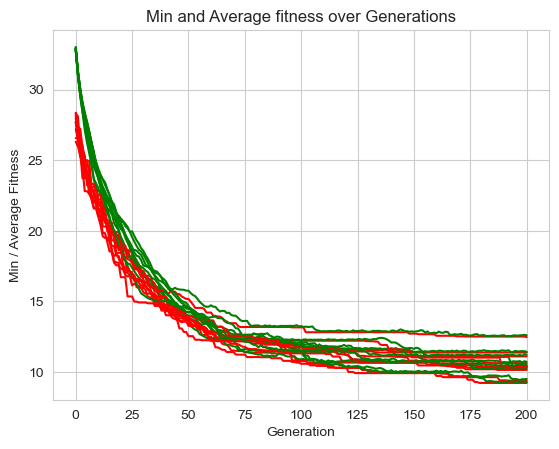

In [44]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

In [45]:

toolbox.register("select", tools.selTournament, tournsize=4)
update_methods()
P_CROSSOVER = 0.9 #doing same experiment but with 0.9 crossover
P_MUTATION = 0.1

gen	nevals	min    	avg    
0  	300   	27.5709	32.9315
1  	275   	24.9482	31.3175
2  	275   	24.9482	30.0026
3  	271   	24.4278	29.1806
4  	263   	24.4598	28.3688
5  	274   	21.888 	27.7602
6  	278   	23.0018	27.1375
7  	275   	22.4235	26.4372
8  	262   	22.4118	26.0093
9  	273   	22.4137	25.7045
10 	277   	21.1459	25.5064
11 	267   	21.8593	25.1611
12 	269   	21.5233	24.5853
13 	280   	20.5424	24.3471
14 	267   	20.096 	23.7735
15 	268   	20.3875	23.3816
16 	254   	19.3565	23.213 
17 	270   	19.3565	23.0343
18 	280   	18.9114	22.8031
19 	252   	18.6079	22.4467
20 	272   	18.8241	22.1258
21 	266   	17.4406	21.7501
22 	263   	17.4406	21.3352
23 	265   	17.2287	20.8899
24 	281   	17.1788	20.6367
25 	254   	17.1992	20.0716
26 	275   	16.4694	19.9436
27 	278   	16.4694	19.6235
28 	272   	15.9655	19.3974
29 	272   	15.7313	19.0581
30 	278   	15.4195	18.8178
31 	283   	15.4195	18.5331
32 	278   	15.4195	18.482 
33 	267   	15.736 	18.316 
34 	257   	15.5766	18.0591
35 	264   	15.5766	18.0115
3

121	280   	9.30122	9.72945
122	268   	9.28419	9.74554
123	269   	9.2888 	9.70762
124	281   	9.2888 	9.74328
125	279   	9.20008	9.71497
126	270   	9.20008	9.73277
127	272   	9.20008	9.3797 
128	278   	9.09172	9.43922
129	269   	9.09172	9.42019
130	268   	9.09172	9.40754
131	277   	9.09172	9.4819 
132	270   	9.09172	9.38227
133	254   	9.09172	9.37774
134	276   	9.09172	9.31465
135	283   	9.09172	9.34992
136	265   	9.09172	9.31768
137	282   	9.09172	9.31521
138	253   	9.09172	9.24403
139	271   	9.09172	9.33072
140	265   	9.09172	9.2802 
141	276   	9.09172	9.37533
142	279   	9.09172	9.37441
143	274   	9.09172	9.29638
144	274   	9.09172	9.25785
145	272   	9.09172	9.27187
146	273   	9.09172	9.24368
147	276   	9.09172	9.30105
148	268   	9.09172	9.23726
149	260   	9.09172	9.27472
150	268   	9.09172	9.29552
151	264   	9.09172	9.28921
152	271   	9.09172	9.35413
153	266   	9.09172	9.18293
154	265   	9.09172	9.24164
155	280   	9.09172	9.31036
156	266   	9.08371	9.286  
157	274   	9.08371	9.30398
1

41 	280   	14.841 	17.264 
42 	278   	14.8939	17.3716
43 	270   	14.6606	17.353 
44 	269   	14.3274	17.2352
45 	275   	14.1436	17.2222
46 	268   	14.3274	17.2741
47 	275   	13.7848	17.2626
48 	265   	13.7848	17.2079
49 	276   	13.7693	17.0934
50 	272   	14.1226	16.9088
51 	262   	13.846 	16.908 
52 	270   	13.9585	16.9626
53 	276   	13.1541	16.9113
54 	269   	13.7832	16.6623
55 	264   	12.6082	16.352 
56 	259   	12.6082	15.9905
57 	277   	12.6082	15.6909
58 	258   	12.6662	15.3362
59 	270   	12.6909	15.0555
60 	282   	12.4362	14.8568
61 	265   	11.7807	14.6976
62 	271   	12.0241	14.7203
63 	278   	12.0481	14.5089
64 	272   	11.6771	14.4074
65 	270   	11.8719	14.361 
66 	270   	11.3768	14.0812
67 	284   	10.876 	13.8902
68 	276   	10.876 	13.6869
69 	273   	10.876 	13.4154
70 	272   	10.6795	13.2414
71 	278   	11.0844	12.9314
72 	263   	10.8772	12.6724
73 	268   	10.6211	12.5387
74 	279   	10.619 	12.2859
75 	267   	10.2293	12.345 
76 	275   	10.2944	12.1648
77 	279   	10.2944	12.2041
7

146	259   	8.75288	9.04341
147	263   	8.75288	8.89326
148	262   	8.75288	8.92788
149	268   	8.75288	8.89687
150	274   	8.75288	8.92165
151	273   	8.75288	8.97594
152	274   	8.73571	8.91635
153	272   	8.73571	9.00902
154	284   	8.73571	9.03339
155	276   	8.73571	8.90952
156	272   	8.73571	8.91815
157	270   	8.73571	8.95025
158	274   	8.73571	8.88611
159	263   	8.73571	8.98869
160	266   	8.45206	8.9506 
161	275   	8.45206	8.85802
162	268   	8.45206	8.81549
163	283   	8.45206	8.9513 
164	274   	8.45206	8.86327
165	277   	8.45206	8.94942
166	275   	8.45206	8.78566
167	273   	8.45206	8.74706
168	275   	8.45206	8.6143 
169	277   	8.45206	8.68748
170	275   	8.45206	8.64081
171	276   	8.45206	8.60651
172	289   	8.45206	8.72178
173	264   	8.45206	8.70446
174	273   	8.45206	8.6443 
175	276   	8.45206	8.58396
176	271   	8.45206	8.60164
177	274   	8.45206	8.64279
178	278   	8.45206	8.6405 
179	283   	8.45206	8.68577
180	272   	8.45206	8.61217
181	273   	8.45206	8.69203
182	269   	8.45206	8.60547
1

68 	276   	10.4624	12.3443
69 	265   	10.4662	12.1517
70 	271   	10.0532	11.8883
71 	262   	10.0532	11.7107
72 	275   	9.88387	11.5095
73 	263   	9.88387	11.3414
74 	279   	9.93739	11.4481
75 	262   	9.8905 	11.2337
76 	272   	9.65096	11.2043
77 	257   	9.54312	10.9868
78 	263   	9.65096	10.805 
79 	283   	9.63162	10.864 
80 	274   	9.59656	10.7544
81 	277   	9.48281	10.6855
82 	288   	9.48281	10.6558
83 	278   	9.43933	10.5623
84 	273   	9.28135	10.369 
85 	275   	9.25459	10.2451
86 	279   	9.22287	10.0042
87 	270   	9.16304	9.844  
88 	270   	9.05825	9.74775
89 	282   	9.01883	9.6804 
90 	271   	9.01172	9.61362
91 	278   	9.00728	9.55052
92 	273   	9.00728	9.39904
93 	276   	8.99206	9.58947
94 	274   	8.98525	9.54341
95 	274   	8.98525	9.5823 
96 	277   	8.89393	9.52245
97 	266   	8.82106	9.51142
98 	264   	8.81425	9.45962
99 	275   	8.71641	9.35043
100	273   	8.71641	9.2188 
101	289   	8.62508	9.17206
102	278   	8.62508	9.00957
103	268   	8.62508	8.98896
104	276   	8.55569	8.85166
1

186	275   	9.16169	9.45755
187	272   	9.16169	9.30667
188	274   	9.16169	9.33815
189	276   	9.16169	9.34804
190	279   	9.16169	9.32173
191	282   	9.16169	9.31972
192	261   	9.16169	9.35664
193	274   	9.16169	9.3487 
194	275   	9.16169	9.28032
195	284   	9.16169	9.30639
196	279   	9.16169	9.34776
197	272   	9.16169	9.2761 
198	263   	9.16169	9.36075
199	273   	9.16169	9.28009
200	267   	9.16169	9.36229
gen	nevals	min    	avg    
0  	300   	27.6396	32.8681
1  	264   	26.2182	31.444 
2  	290   	25.4175	30.2452
3  	268   	25.1738	29.4412
4  	269   	24.9981	28.8029
5  	271   	24.9981	28.3334
6  	275   	24.4528	27.9148
7  	278   	23.9274	27.5525
8  	278   	23.5523	27.3666
9  	277   	23.3789	26.919 
10 	275   	22.1912	26.6659
11 	282   	22.3414	26.3009
12 	271   	21.9184	25.9334
13 	278   	22.1405	25.3966
14 	275   	21.4578	25.4467
15 	280   	20.2624	25.1556
16 	282   	20.2624	24.8411
17 	274   	20.4643	24.4142
18 	289   	19.1918	24.0479
19 	270   	19.1918	23.756 
20 	268   	18.4857	23.4082
2

88 	274   	9.77039	11.0691
89 	281   	9.77039	10.8717
90 	271   	9.49147	10.8195
91 	271   	9.49147	10.7299
92 	283   	9.49147	10.637 
93 	266   	9.26937	10.5209
94 	274   	9.26937	10.5547
95 	266   	9.26937	10.3849
96 	273   	9.16109	10.2357
97 	283   	9.12069	10.1005
98 	276   	8.96238	9.82669
99 	268   	8.96238	9.70936
100	277   	8.96238	9.61479
101	275   	8.96238	9.51377
102	269   	8.88891	9.54963
103	276   	8.88157	9.42255
104	262   	8.88157	9.52531
105	274   	8.88157	9.60566
106	276   	8.88157	9.44407
107	273   	8.8382 	9.12481
108	265   	8.81676	9.1431 
109	273   	8.81676	9.14342
110	275   	8.81676	9.14745
111	278   	8.81676	9.25935
112	279   	8.77339	9.30769
113	273   	8.77339	9.06087
114	277   	8.77339	8.99506
115	265   	8.77339	9.05853
116	274   	8.77339	8.99211
117	266   	8.72985	8.94104
118	270   	8.72985	8.9914 
119	281   	8.72985	9.08869
120	284   	8.72799	9.17986
121	269   	8.72799	9.1731 
122	267   	8.72799	9.2561 
123	275   	8.72799	8.9233 
124	269   	8.72799	8.98342
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


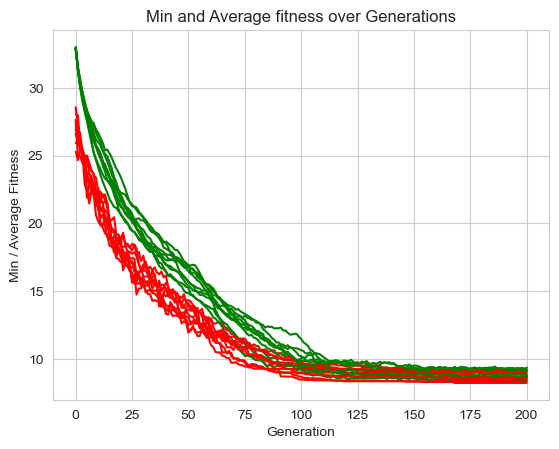

In [46]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

I wanted to compare the same selection technique but with the original intital parameters of P_CROSSOVER = 0.05, P_MUTATION = 0.1 - This is the reason for the modification of the crossover and p mutation above.

In [47]:
P_MUTATION = 0.05
P_CROSSOVER = 0.4 

#resetting these back to the choosen parameters

In [48]:
toolbox.register("select", tools.selTournament, tournsize=8) #upping the tournament size to 8 instead of 4
update_methods()

gen	nevals	min    	avg    
0  	300   	27.2639	32.9472
1  	110   	26.9034	30.3418
2  	126   	24.5841	28.3639
3  	131   	24.1247	27.4928
4  	131   	23.0112	26.0625
5  	121   	23.0112	24.8056
6  	140   	20.731 	24.1967
7  	131   	20.731 	23.3482
8  	117   	20.2365	22.5819
9  	134   	20.2365	21.2779
10 	112   	20.0033	20.785 
11 	122   	19.603 	20.5414
12 	112   	19.029 	20.3009
13 	139   	19.029 	20.1404
14 	140   	18.5392	19.9147
15 	128   	18.5392	19.7407
16 	112   	18.3229	19.1399
17 	119   	17.9858	18.7803
18 	125   	17.7845	18.5932
19 	132   	17.7845	18.3815
20 	114   	17.2399	18.0336
21 	122   	17.2399	17.9141
22 	160   	17.0386	17.7887
23 	119   	17.0259	17.4558
24 	128   	16.842 	17.2039
25 	134   	16.842 	17.0963
26 	122   	16.7085	17.0997
27 	138   	16.6961	16.9605
28 	134   	16.6961	16.9666
29 	112   	16.4262	16.8661
30 	114   	16.4262	16.8253
31 	125   	16.1939	16.8644
32 	114   	16.1939	16.6679
33 	123   	16.1939	16.5054
34 	126   	16.1939	16.5812
35 	125   	16.1939	16.3298
3

102	117   	10.9671	11.0161
103	130   	10.9671	11.0775
104	127   	10.9671	11.0447
105	121   	10.9671	11.032 
106	119   	10.9671	11.0424
107	111   	10.9671	11.0586
108	114   	10.9501	11.0661
109	127   	10.9501	11.0187
110	160   	10.7228	11.1156
111	140   	10.7228	11.1667
112	123   	10.4148	11.0081
113	110   	10.4048	10.8266
114	139   	10.4048	10.7912
115	120   	10.4048	10.5882
116	127   	10.4048	10.4928
117	135   	10.4048	10.431 
118	135   	10.4048	10.4537
119	136   	10.4048	10.4777
120	122   	10.4048	10.5136
121	122   	10.4048	10.4624
122	121   	10.4048	10.4968
123	145   	10.4048	10.4938
124	125   	10.4048	10.5061
125	139   	10.4048	10.4786
126	122   	10.4048	10.4598
127	143   	10.4048	10.4778
128	120   	10.2387	10.4837
129	126   	10.2387	10.4908
130	137   	10.2387	10.4902
131	126   	10.2387	10.4807
132	144   	10.2387	10.332 
133	143   	10.2387	10.2993
134	123   	10.2387	10.2873
135	150   	10.2387	10.327 
136	117   	10.2387	10.3131
137	141   	10.2387	10.336 
138	121   	10.2387	10.2646
1

17 	121   	17.3486	18.9898
18 	125   	17.0899	18.6779
19 	111   	17.0823	18.1211
20 	123   	16.4805	17.5191
21 	131   	16.4805	17.3081
22 	113   	16.4805	17.1455
23 	148   	16.451 	17.0911
24 	99    	16.451 	16.6413
25 	123   	16.4082	16.7661
26 	143   	16.2554	16.7384
27 	147   	16.2375	16.7335
28 	136   	15.9567	16.7035
29 	123   	15.8615	16.4149
30 	134   	15.8612	16.3676
31 	152   	15.6584	16.1092
32 	135   	15.6584	16.014 
33 	142   	15.4668	16.0322
34 	146   	15.4668	15.8577
35 	144   	15.4668	15.6589
36 	126   	15.4668	15.5851
37 	138   	15.4366	15.5312
38 	128   	15.4366	15.5648
39 	120   	15.4255	15.5721
40 	123   	15.324 	15.5752
41 	138   	15.0375	15.5331
42 	137   	15.0375	15.5371
43 	117   	14.8623	15.4851
44 	133   	14.8623	15.2131
45 	119   	14.8285	15.0844
46 	122   	14.8285	14.9989
47 	135   	14.8076	14.9632
48 	129   	14.6111	14.9263
49 	130   	14.6015	14.9458
50 	145   	14.1676	14.905 
51 	118   	14.1676	14.7354
52 	128   	14.1676	14.5588
53 	106   	14.1676	14.2668
5

132	116   	12.9781	13.0561
133	130   	12.9781	13.0303
134	128   	12.9781	13.0757
135	136   	12.9781	13.0272
136	114   	12.9781	13.078 
137	127   	12.9781	13.0452
138	137   	12.9678	13.072 
139	114   	12.9678	13.0771
140	134   	12.9678	13.126 
141	137   	12.9678	13.0636
142	110   	12.9678	13.0268
143	134   	12.9678	13.018 
144	124   	12.9678	13.0877
145	149   	12.9678	13.0272
146	128   	12.9678	13.0343
147	135   	12.9678	13.0577
148	123   	12.9678	13.1102
149	138   	12.9678	13.103 
150	117   	12.9678	13.0217
151	146   	12.9678	13.0584
152	146   	12.9678	13.0055
153	125   	12.9678	13.0285
154	141   	12.9678	13.0603
155	104   	12.9678	13.0568
156	126   	12.9678	13.0633
157	123   	12.9678	13.0471
158	130   	12.9678	13.1254
159	109   	12.9678	13.0338
160	122   	12.9678	13.0671
161	133   	12.9678	13.074 
162	129   	12.9678	13.0392
163	129   	12.9678	13.0642
164	147   	12.9678	13.0483
165	110   	12.9678	12.9942
166	124   	12.9678	13.0495
167	125   	12.9678	13.0859
168	131   	12.9678	13.0081
1

36 	124   	15.35  	15.6413
37 	127   	15.35  	15.6391
38 	140   	15.233 	15.4589
39 	154   	15.233 	15.451 
40 	126   	15.233 	15.4282
41 	117   	15.233 	15.3112
42 	154   	15.233 	15.2758
43 	129   	15.1854	15.2671
44 	143   	15.0578	15.2705
45 	137   	15.0578	15.3137
46 	128   	15.0101	15.2688
47 	115   	15.0101	15.128 
48 	128   	15.0101	15.1433
49 	114   	15.0101	15.1459
50 	137   	14.9493	15.0677
51 	144   	14.9493	15.0873
52 	129   	14.9493	15.0171
53 	131   	14.9493	15.0593
54 	138   	14.9493	15.0649
55 	119   	14.9493	15.0441
56 	117   	14.9493	15.0192
57 	128   	14.9493	15.0007
58 	126   	14.9493	14.9996
59 	131   	14.9493	15.0169
60 	142   	14.9493	15.0396
61 	124   	14.9493	14.988 
62 	114   	14.9493	15.0005
63 	126   	14.9493	15.0268
64 	129   	14.9493	14.9968
65 	139   	14.7127	14.9939
66 	125   	14.7127	15.029 
67 	113   	14.7127	14.9789
68 	130   	14.7127	14.8483
69 	133   	14.7127	14.7331
70 	131   	14.7127	14.7824
71 	136   	14.7127	14.8491
72 	108   	14.7127	14.7633
7

156	118   	8.85451	8.94757
157	139   	8.85451	8.9198 
158	132   	8.85451	8.96974
159	130   	8.85451	8.9835 
160	122   	8.85451	8.91035
161	135   	8.85451	8.94505
162	137   	8.85451	8.90784
163	129   	8.85451	8.92145
164	131   	8.85451	8.93407
165	113   	8.85451	8.96345
166	109   	8.85451	8.93784
167	127   	8.85451	8.97281
168	118   	8.72143	9.02981
169	136   	8.72143	8.99806
170	118   	8.72143	8.92757
171	136   	8.72143	8.78379
172	107   	8.72143	8.81186
173	122   	8.72143	8.83023
174	150   	8.72143	8.85425
175	118   	8.72143	8.84928
176	115   	8.72143	8.82936
177	122   	8.72143	8.8453 
178	118   	8.72143	8.7937 
179	125   	8.72143	8.8663 
180	129   	8.72143	8.82928
181	133   	8.72143	8.81974
182	137   	8.72143	8.88972
183	125   	8.72143	8.85285
184	134   	8.72143	8.79792
185	125   	8.72143	8.88052
186	122   	8.72143	8.80675
187	130   	8.66568	8.77261
188	135   	8.66568	8.82364
189	120   	8.66568	8.85644
190	110   	8.66568	8.7621 
191	107   	8.66568	8.74672
192	132   	8.66568	8.75012
1

76 	122   	12.1605	12.3257
77 	135   	12.1605	12.267 
78 	107   	12.1605	12.1923
79 	112   	12.1605	12.25  
80 	139   	12.1605	12.2457
81 	130   	12.1605	12.1974
82 	105   	12.1605	12.2181
83 	115   	12.1605	12.3242
84 	133   	12.1605	12.2296
85 	115   	12.1605	12.2698
86 	127   	12.1605	12.1938
87 	121   	12.1605	12.202 
88 	132   	12.1263	12.2512
89 	121   	12.1263	12.3091
90 	121   	12.1263	12.2485
91 	128   	12.1263	12.221 
92 	141   	12.1263	12.2439
93 	132   	12.1263	12.235 
94 	108   	12.1263	12.2088
95 	126   	12.1263	12.1783
96 	109   	12.1263	12.2011
97 	122   	12.1263	12.2051
98 	119   	12.1263	12.2372
99 	131   	12.1263	12.1686
100	124   	12.1263	12.1774
101	132   	12.1263	12.1999
102	123   	12.1263	12.2438
103	103   	12.1263	12.1815
104	122   	12.0998	12.177 
105	130   	12.0998	12.1982
106	121   	11.9655	12.232 
107	116   	11.939 	12.2185
108	149   	11.939 	12.1884
109	108   	11.9065	12.0958
110	133   	11.9065	12.0828
111	143   	11.8536	12.0422
112	133   	11.8211	12.0877
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


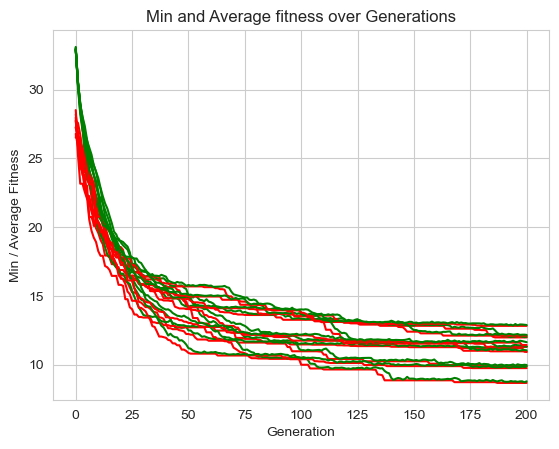

In [49]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

Gets stuck - premature convergence

gen	nevals	min    	avg   
0  	300   	28.2532	32.822
1  	141   	28.2863	32.9503
2  	136   	27.8289	33.1125
3  	131   	28.0653	33.1939
4  	112   	28.3546	33.2696
5  	125   	27.7247	33.4515
6  	127   	27.7247	33.5219
7  	126   	27.7247	33.3318
8  	121   	27.7247	33.3018
9  	124   	29.2427	33.2712
10 	129   	28.0823	33.2554
11 	130   	28.8246	33.2969
12 	126   	29.1787	33.3589
13 	141   	29.2388	33.5479
14 	141   	27.2854	33.5777
15 	127   	28.3301	33.6945
16 	111   	26.9453	33.7613
17 	121   	27.9121	33.7009
18 	117   	27.9121	33.6451
19 	136   	27.9121	33.5866
20 	113   	29.3554	33.7053
21 	122   	29.288 	33.8352
22 	125   	29.1033	33.8571
23 	119   	28.0281	33.9831
24 	121   	27.1464	34.2031
25 	121   	29.6305	34.014 
26 	135   	29.6305	34.1233
27 	127   	28.6583	34.1766
28 	131   	28.3252	34.0857
29 	129   	28.3252	33.88  
30 	117   	28.8977	34.0931
31 	113   	28.8977	33.9408
32 	107   	28.8154	33.9565
33 	136   	28.51  	33.8961
34 	126   	28.47  	34.0237
35 	121   	29.4423	33.9888
36 

102	140   	29.165 	33.9002
103	140   	28.2696	34.0139
104	144   	29.7093	34.0807
105	128   	28.8272	34.0214
106	146   	29.7306	34.1608
107	145   	29.3316	34.1314
108	110   	29.3316	33.9829
109	119   	28.645 	33.9822
110	118   	28.645 	33.9598
111	143   	28.645 	34.0391
112	138   	28.645 	34.0837
113	138   	29.1917	34.0804
114	141   	28.8554	34.1161
115	128   	29.5095	33.9749
116	113   	29.6721	34.0763
117	147   	30.1301	34.1162
118	140   	29.6929	34.1176
119	132   	29.6929	34.0141
120	110   	30.1998	33.7803
121	128   	29.7133	33.8457
122	126   	27.7786	33.9057
123	129   	27.4766	33.9465
124	145   	28.2855	33.8291
125	159   	28.2855	33.763 
126	108   	27.3592	33.7145
127	122   	29.5888	33.9381
128	132   	29.6044	34.0207
129	134   	30.0569	34.1655
130	130   	28.5494	34.2519
131	148   	29.1489	34.2056
132	118   	30.0354	34.2577
133	153   	29.5605	34.2317
134	113   	29.9827	34.3156
135	125   	29.9827	34.2737
136	109   	29.8373	34.2357
137	151   	28.8943	34.1795
138	124   	28.8943	34.1855
1

7  	128   	29.1258	33.3711
8  	121   	29.0523	33.5425
9  	139   	29.308 	33.6207
10 	136   	28.6461	33.7061
11 	129   	29.3809	33.7798
12 	150   	29.2421	33.7134
13 	125   	29.389 	33.7332
14 	123   	29.2524	33.6459
15 	137   	27.3885	33.6329
16 	117   	27.3885	33.625 
17 	126   	27.677 	33.6125
18 	147   	27.677 	33.5619
19 	121   	28.2214	33.3981
20 	129   	28.2214	33.3965
21 	128   	28.2214	33.4317
22 	133   	28.735 	33.4323
23 	118   	28.9704	33.5523
24 	125   	28.8969	33.4304
25 	103   	28.8318	33.4721
26 	105   	28.8318	33.4724
27 	132   	27.1309	33.631 
28 	110   	28.8769	33.7036
29 	129   	28.8769	33.5136
30 	120   	29.5581	33.4717
31 	122   	27.7667	33.5775
32 	115   	29.0245	33.5748
33 	168   	27.8419	33.5712
34 	126   	28.7625	33.6434
35 	107   	29.2344	33.5756
36 	127   	29.2344	33.6213
37 	123   	29.0337	33.6028
38 	109   	29.8206	33.8127
39 	133   	29.4298	33.7356
40 	125   	28.8139	33.754 
41 	123   	29.6342	33.7332
42 	140   	28.7136	33.7477
43 	120   	28.6938	33.8477
4

109	118   	28.7593	33.8067
110	125   	28.4749	33.8196
111	112   	28.4749	33.6017
112	123   	29.2695	33.6631
113	102   	29.9746	33.8636
114	153   	28.8596	33.9239
115	137   	28.4131	33.7862
116	124   	27.3739	33.7329
117	133   	27.3739	33.6316
118	137   	28.6821	33.6654
119	125   	27.7867	33.7714
120	128   	28.6821	33.7635
121	134   	29.1152	33.9202
122	137   	28.1636	33.9987
123	125   	28.4173	33.7584
124	103   	28.736 	33.7883
125	118   	27.7249	33.6729
126	110   	27.7249	33.4932
127	131   	28.6003	33.459 
128	131   	28.2796	33.3964
129	116   	28.2796	33.3902
130	122   	28.2796	33.6262
131	135   	29.0796	33.7394
132	121   	28.4157	33.6985
133	129   	28.4157	33.6959
134	145   	28.4157	33.7178
135	110   	28.9227	33.7261
136	135   	28.9227	33.7106
137	114   	29.0072	33.7669
138	117   	27.5904	33.5809
139	122   	26.9245	33.4071
140	110   	26.9245	33.2496
141	115   	26.9245	33.3614
142	139   	26.9245	33.202 
143	118   	26.9245	33.4193
144	114   	26.5398	33.3632
145	134   	26.6274	33.3866
1

14 	141   	28.8094	33.7958
15 	142   	28.8104	33.6958
16 	117   	27.9795	33.8144
17 	117   	27.9795	33.7803
18 	137   	27.9795	33.8688
19 	131   	28.9886	33.8036
20 	132   	28.9886	33.6682
21 	115   	28.3032	33.5404
22 	134   	28.3032	33.5237
23 	151   	28.4912	33.5256
24 	125   	28.4912	33.6017
25 	128   	29.2222	33.5633
26 	144   	29.0464	33.3717
27 	115   	29.0763	33.5322
28 	138   	29.1309	33.2641
29 	130   	28.244 	33.4841
30 	125   	28.0026	33.5089
31 	122   	28.9782	33.6356
32 	137   	29.3621	33.7233
33 	122   	27.9383	33.7217
34 	133   	28.1094	33.719 
35 	155   	29.1609	33.5993
36 	119   	29.2739	33.67  
37 	143   	29.6012	33.7241
38 	139   	28.4902	33.6681
39 	130   	29.4772	33.7087
40 	87    	28.4117	33.88  
41 	126   	29.638 	33.9639
42 	142   	29.0067	34.0697
43 	117   	29.3859	34.0354
44 	123   	29.3859	33.9203
45 	136   	29.1162	34.0615
46 	130   	29.7719	34.0716
47 	117   	29.4797	33.9407
48 	132   	28.7006	33.9015
49 	133   	30.149 	34.124 
50 	123   	30.149 	34.2538
5

117	123   	29.0861	34.1955
118	153   	28.8625	34.0577
119	130   	28.7598	33.9827
120	151   	28.2404	33.8837
121	135   	29.1043	33.8017
122	146   	29.2676	33.7461
123	134   	27.7648	33.81  
124	129   	28.4947	33.654 
125	117   	28.2994	33.7442
126	136   	28.3504	33.8008
127	133   	29.2905	33.8784
128	131   	29.2905	33.9294
129	136   	29.2071	33.9726
130	131   	29.0692	34.1093
131	127   	28.0455	34.0073
132	108   	27.958 	33.8548
133	133   	28.0455	34.0213
134	135   	27.0757	34.1341
135	125   	29.3131	34.2181
136	120   	29.6836	34.1882
137	130   	29.896 	34.293 
138	126   	28.8113	34.1507
139	139   	28.8113	34.2428
140	134   	29.9191	34.2697
141	139   	29.0014	34.3468
142	143   	28.7374	34.2433
143	125   	29.8075	34.2871
144	156   	30.1245	34.2133
145	152   	27.5804	34.2534
146	120   	27.5804	34.2689
147	134   	29.3207	34.1924
148	139   	29.3207	34.2617
149	131   	29.8133	34.319 
150	130   	29.9417	34.4537
151	150   	28.8353	34.4534
152	124   	28.8353	34.4296
153	105   	28.8353	34.5479
1

17 	127   	29.1006	33.6419
18 	122   	29.4853	33.7342
19 	135   	29.2786	33.7892
20 	147   	28.3203	33.8051
21 	122   	29.5341	33.7359
22 	127   	28.7265	33.7061
23 	125   	28.1721	33.6689
24 	120   	27.7432	33.8655
25 	126   	27.7432	34.0408
26 	118   	27.7432	34.1744
27 	145   	29.3362	34.351 
28 	125   	29.9311	34.4738
29 	141   	29.9311	34.4731
30 	123   	29.6598	34.3818
31 	121   	28.6463	34.2384
32 	127   	28.6463	34.2807
33 	126   	28.6463	34.37  
34 	121   	28.6463	34.3389
35 	150   	28.6463	34.2658
36 	138   	28.6463	33.9762
37 	137   	29.7751	34.0748
38 	112   	28.7063	33.9425
39 	113   	29.5637	33.9052
40 	124   	26.6984	33.9024
41 	141   	28.813 	33.7732
42 	146   	29.3116	33.7518
43 	122   	29.3116	33.7295
44 	116   	28.7227	33.8037
45 	129   	29.4898	33.9531
46 	144   	28.7655	33.9472
47 	130   	28.6239	33.777 
48 	134   	28.0361	33.6447
49 	119   	27.7459	33.8736
50 	150   	28.2517	33.7565
51 	130   	28.2517	33.8045
52 	133   	28.6239	33.7645
53 	138   	28.6239	33.7071
5

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


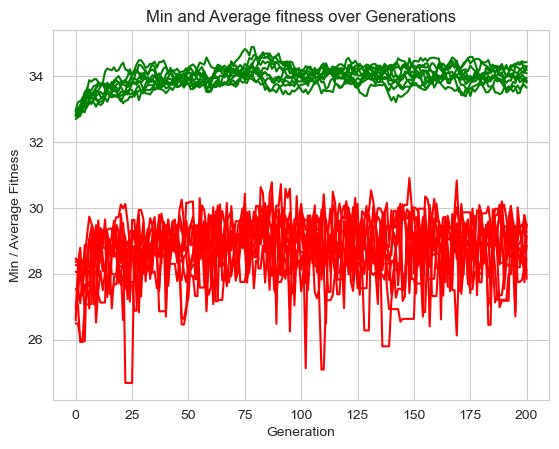

In [50]:
toolbox.register("select", tools.selRoulette)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

gen	nevals	min    	avg    
0  	300   	28.2068	32.7797
1  	152   	27.2996	32.8553
2  	128   	27.2996	32.875 
3  	170   	27.2996	32.8973
4  	131   	26.4918	32.9201
5  	133   	26.6462	32.787 
6  	125   	25.4839	32.8158
7  	120   	25.4839	32.8925
8  	154   	26.4954	32.8168
9  	148   	26.4954	32.8048
10 	122   	26.8532	32.8231
11 	147   	26.3676	32.7703
12 	138   	26.1189	32.7235
13 	130   	26.5006	32.8137
14 	120   	26.3951	32.8559
15 	125   	25.6622	32.8545
16 	124   	27.6417	32.7889
17 	128   	27.6417	32.8003
18 	115   	27.556 	32.7606
19 	135   	27.8263	32.7853
20 	117   	27.5477	32.8715
21 	126   	26.6099	32.8477
22 	123   	26.6099	32.8215
23 	125   	26.5125	32.7543
24 	140   	26.5034	32.789 
25 	132   	26.5034	32.824 
26 	124   	26.5034	32.8674
27 	138   	27.377 	32.9087
28 	112   	27.4978	32.9497
29 	137   	26.8328	32.8465
30 	145   	26.6339	32.8724
31 	129   	26.3207	32.8483
32 	127   	26.8298	32.9425
33 	132   	25.9958	32.8331
34 	124   	26.5013	32.8689
35 	127   	26.5013	32.823 
3

126	126   	26.5554	32.8261
127	121   	27.0314	32.8341
128	127   	25.8961	32.7659
129	124   	26.196 	32.798 
130	119   	27.3704	32.7645
131	128   	27.8739	32.6775
132	134   	27.5349	32.6896
133	134   	25.7848	32.6915
134	148   	25.7848	32.6165
135	141   	25.7848	32.6881
136	153   	25.1392	32.635 
137	128   	25.1392	32.742 
138	138   	25.1392	32.7905
139	131   	25.1392	32.7323
140	125   	24.621 	32.6644
141	140   	24.621 	32.7043
142	145   	23.4572	32.6385
143	113   	24.1633	32.6255
144	128   	24.1633	32.6612
145	127   	24.8232	32.6337
146	136   	25.5254	32.5841
147	160   	25.389 	32.5686
148	117   	25.5507	32.5965
149	138   	25.281 	32.613 
150	119   	25.281 	32.603 
151	119   	24.4703	32.6915
152	143   	26.4552	32.7273
153	155   	25.6424	32.596 
154	126   	25.6424	32.5991
155	128   	25.6424	32.6867
156	140   	26.3468	32.7944
157	136   	26.9081	32.7335
158	126   	25.8766	32.6903
159	129   	26.0817	32.6755
160	107   	25.4549	32.657 
161	125   	24.5855	32.6424
162	132   	24.5855	32.8415
1

41 	117   	27.5892	32.9821
42 	139   	27.5892	32.885 
43 	135   	27.6665	32.9244
44 	140   	27.5026	32.9153
45 	124   	25.5275	32.8115
46 	128   	25.5275	32.8177
47 	128   	25.5275	32.8481
48 	130   	25.135 	32.7636
49 	138   	22.9202	32.7611
50 	130   	22.9202	32.7986
51 	155   	25.0185	32.9221
52 	112   	26.3154	32.9515
53 	153   	25.2926	32.9207
54 	139   	26.3476	32.85  
55 	138   	26.3476	32.9355
56 	136   	25.4546	32.8332
57 	131   	27.1617	32.8979
58 	121   	27.1617	32.8893
59 	132   	26.6541	32.9246
60 	119   	26.181 	32.9068
61 	134   	25.3677	32.9011
62 	142   	24.8682	32.8901
63 	124   	24.8682	32.878 
64 	113   	25.7942	32.8803
65 	104   	25.7942	32.9595
66 	141   	26.4803	33.0841
67 	114   	26.562 	33.1554
68 	131   	26.562 	33.0456
69 	115   	26.562 	32.992 
70 	115   	26.341 	32.9355
71 	125   	26.9244	33.0312
72 	132   	26.2867	33.0115
73 	122   	26.5089	33.0664
74 	132   	26.3413	32.8912
75 	124   	27.0163	32.8749
76 	126   	27.0163	32.9014
77 	129   	27.0163	32.9455
7

159	138   	25.5629	32.9333
160	142   	26.314 	32.9244
161	125   	26.6554	32.9178
162	132   	26.6554	32.9692
163	125   	26.6554	32.998 
164	129   	26.8064	33.0198
165	123   	25.7011	33.0852
166	115   	25.7011	33.038 
167	118   	25.7011	32.9866
168	160   	25.9404	33.059 
169	117   	25.9404	33.0945
170	138   	25.5707	32.978 
171	121   	26.5317	33.0261
172	124   	27.0336	33.075 
173	123   	25.6011	33.0112
174	118   	25.6011	33.0037
175	143   	26.6556	32.9956
176	132   	25.4554	33.0032
177	119   	25.4554	33.1268
178	131   	25.4554	33.1059
179	122   	26.4126	33.1703
180	126   	27.2091	33.1595
181	112   	26.9771	33.2493
182	137   	25.9309	33.2262
183	125   	25.9309	33.2043
184	140   	25.9309	33.0892
185	146   	28.0448	33.1474
186	133   	26.4129	33.0187
187	131   	26.4129	32.9576
188	125   	27.3993	32.9466
189	142   	27.3993	32.9709
190	124   	27.1066	33.0446
191	125   	27.1066	32.9892
192	138   	27.7312	32.9258
193	128   	27.1458	32.9013
194	125   	27.1458	32.8797
195	119   	27.1458	32.8816
1

70 	144   	28.1155	33.1285
71 	133   	27.6349	33.1772
72 	132   	28.2944	33.1557
73 	134   	27.7008	33.1616
74 	138   	27.7008	33.0868
75 	163   	26.2816	33.055 
76 	108   	26.7742	33.1002
77 	121   	27.3167	33.1222
78 	117   	27.5909	32.9782
79 	117   	27.5822	33.0932
80 	138   	28.5472	33.1179
81 	125   	28.4285	33.1239
82 	137   	28.4285	33.1321
83 	132   	27.9948	33.1491
84 	122   	27.8194	33.1887
85 	108   	28.4653	33.1885
86 	136   	28.5472	33.0995
87 	144   	26.7808	32.9687
88 	128   	26.7378	32.8937
89 	134   	27.7314	32.8387
90 	121   	26.3107	32.936 
91 	125   	26.3107	32.9195
92 	124   	25.7394	32.9209
93 	137   	25.3775	32.9992
94 	108   	27.9528	32.9688
95 	119   	27.3119	32.8896
96 	119   	27.3119	32.8488
97 	117   	27.2087	32.8652
98 	136   	25.4411	32.8767
99 	130   	27.2087	32.9033
100	126   	27.2087	32.7614
101	121   	27.2087	32.7023
102	115   	26.0891	32.7616
103	134   	26.0891	32.7485
104	138   	26.0891	32.7633
105	145   	26.0891	32.7877
106	132   	25.3861	32.8718
1

176	130   	25.3115	32.8271
177	157   	27.8171	32.863 
178	115   	26.3876	32.8155
179	130   	26.3746	32.8604
180	144   	26.3746	32.8946
181	138   	26.1156	32.9334
182	125   	27.1414	32.9904
183	138   	27.1414	32.9825
184	114   	27.1414	32.9661
185	152   	27.2433	32.9306
186	129   	25.9987	33.0402
187	145   	27.5977	33.0426
188	137   	26.9178	33.0093
189	139   	26.4297	33.0225
190	118   	26.7798	33.0495
191	140   	27.1523	33.069 
192	123   	26.0898	33.0474
193	133   	26.0898	33.0623
194	146   	25.5052	33.1426
195	119   	26.4033	33.1663
196	115   	26.7068	33.0908
197	125   	26.0995	33.0044
198	136   	27.3366	33.0297
199	124   	26.376 	33.0466
200	125   	24.6423	32.9817
gen	nevals	min    	avg    
0  	300   	26.3352	32.7687
1  	105   	26.3352	32.7922
2  	126   	26.3352	32.8191
3  	130   	26.3352	32.7983
4  	129   	26.1061	32.943 
5  	124   	26.1061	32.7971
6  	147   	25.2428	32.8103
7  	139   	25.2428	32.7719
8  	140   	24.9898	32.689 
9  	105   	25.55  	32.6403
10 	128   	25.55  	32.6566
1

76 	135   	27.5415	33.1701
77 	120   	26.152 	33.1782
78 	135   	26.152 	33.193 
79 	133   	27.6717	33.1766
80 	127   	27.6717	33.1383
81 	146   	27.5323	33.1069
82 	108   	27.0787	33.0625
83 	131   	27.0787	33.0464
84 	108   	27.0787	32.9375
85 	115   	27.2412	32.984 
86 	112   	26.8605	32.8845
87 	130   	26.8605	32.9034
88 	123   	26.8605	32.9469
89 	127   	27.3347	32.9846
90 	116   	26.9866	32.9947
91 	113   	26.9866	32.9903
92 	115   	26.9866	32.9809
93 	126   	27.2313	33.051 
94 	108   	27.2313	33.0693
95 	149   	27.2313	33.0382
96 	128   	25.4353	32.977 
97 	141   	25.4353	33.0093
98 	97    	25.4353	32.9639
99 	111   	25.4353	32.9476
100	138   	25.4353	32.913 
101	123   	23.8272	32.8795
102	134   	23.8272	32.866 
103	128   	23.8272	32.8115
104	133   	23.8946	32.9342
105	114   	24.4194	32.9964
106	125   	23.7519	32.9809
107	127   	23.8545	32.9758
108	127   	23.8545	32.9211
109	125   	23.5567	32.8013
110	143   	23.5567	32.7563
111	132   	23.5567	32.8002
112	121   	25.0631	32.9129
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


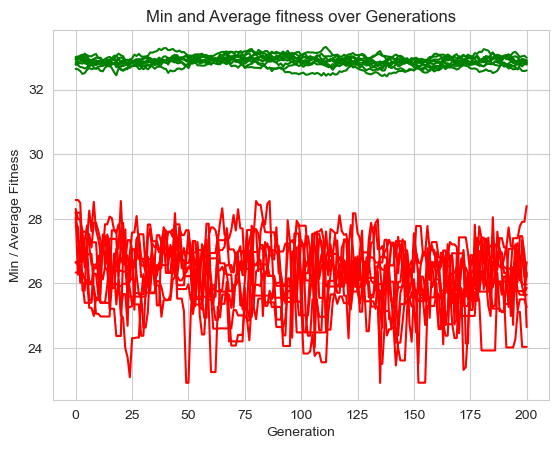

In [51]:
toolbox.register("select", tools.selBest)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

gen	nevals	min    	avg    
0  	300   	27.5606	32.7065
1  	142   	26.6417	27.5916
2  	116   	25.7745	26.6539
3  	131   	25.7745	25.7939
4  	125   	25.3479	25.8069
5  	125   	24.2505	25.3832
6  	143   	23.8658	24.2819
7  	129   	23.6213	23.9276
8  	101   	22.7968	23.6687
9  	132   	22.7968	22.8265
10 	137   	22.4555	22.8404
11 	110   	22.4555	22.5073
12 	134   	22.2392	22.4855
13 	121   	22.233 	22.2591
14 	133   	22.233 	22.2653
15 	118   	22.1613	22.2719
16 	114   	22.1263	22.1895
17 	135   	21.8994	22.1744
18 	145   	21.748 	21.9462
19 	112   	21.4364	21.784 
20 	126   	21.4364	21.4563
21 	134   	21.4364	21.481 
22 	120   	21.4364	21.4483
23 	131   	21.4364	21.467 
24 	137   	21.4364	21.5037
25 	111   	21.3253	21.4675
26 	119   	21.3253	21.3698
27 	155   	21.0484	21.3897
28 	116   	21.0484	21.0843
29 	127   	20.548 	21.0698
30 	141   	20.548 	20.5766
31 	141   	20.548 	20.5802
32 	131   	20.548 	20.599 
33 	120   	20.3253	20.5977
34 	125   	20.3253	20.384 
35 	140   	19.9534	20.3686
3

102	115   	15.3203	15.7042
103	123   	15.3203	15.4253
104	131   	15.3203	15.4564
105	153   	15.3203	15.3565
106	130   	15.3137	15.4169
107	136   	15.3137	15.4103
108	143   	15.2666	15.3502
109	136   	15.2666	15.3512
110	102   	14.9731	15.3106
111	133   	14.9731	15.0148
112	103   	14.9731	15.0115
113	116   	14.5927	15.0292
114	116   	14.5927	14.6605
115	85    	14.5927	14.6875
116	115   	14.5927	14.6629
117	122   	14.5927	14.6531
118	116   	14.5927	14.6401
119	141   	14.5927	14.688 
120	112   	14.5927	14.6493
121	128   	14.5927	14.7316
122	120   	14.5927	14.654 
123	129   	14.5927	14.6679
124	128   	14.5927	14.7326
125	118   	14.5927	14.6339
126	137   	14.5803	14.7015
127	128   	14.5803	14.6276
128	136   	14.5803	14.7018
129	153   	14.5803	14.635 
130	128   	14.5803	14.6253
131	127   	14.5803	14.6523
132	128   	14.5803	14.6373
133	128   	14.5803	14.5993
134	123   	14.5803	14.6038
135	123   	14.5803	14.6396
136	139   	14.5803	14.6326
137	127   	14.5144	14.6349
138	123   	14.5144	14.5402
1

3  	131   	26.036 	26.0719
4  	135   	25.2709	26.0624
5  	130   	25.0899	25.303 
6  	118   	24.9962	25.1273
7  	133   	24.35  	25.0229
8  	111   	24.2486	24.3713
9  	150   	23.3904	24.2641
10 	117   	23.3904	23.4013
11 	124   	22.8867	23.4159
12 	125   	22.0989	22.9383
13 	139   	22.0989	22.1591
14 	144   	21.9707	22.1483
15 	136   	21.9707	21.9823
16 	138   	21.9707	22.0172
17 	133   	21.9707	22.0042
18 	133   	21.9707	22.0142
19 	126   	21.5444	21.9892
20 	134   	20.9225	21.5878
21 	140   	20.9225	20.9692
22 	114   	20.9225	20.9733
23 	118   	20.9225	20.9796
24 	124   	20.9225	20.9437
25 	132   	20.485 	20.9669
26 	138   	20.3277	20.5681
27 	146   	20.3277	20.3985
28 	140   	20.3277	20.3999
29 	123   	20.3277	20.3932
30 	126   	20.3023	20.3777
31 	131   	19.9862	20.3356
32 	124   	19.8027	20.0224
33 	130   	19.7875	19.8741
34 	129   	19.7875	19.8368
35 	127   	19.6603	19.8013
36 	135   	19.4125	19.717 
37 	141   	18.8918	19.4639
38 	140   	18.8918	18.9791
39 	130   	18.8918	18.9651
4

106	126   	16.1583	16.3095
107	137   	16.1583	16.2208
108	127   	16.1583	16.2209
109	136   	16.1583	16.2315
110	151   	15.9358	16.2226
111	130   	15.9305	15.9516
112	133   	15.5297	15.967 
113	135   	15.5297	15.5699
114	115   	15.5297	15.5957
115	111   	15.5297	15.6016
116	128   	15.5297	15.6161
117	125   	15.5297	15.5875
118	128   	15.5297	15.6244
119	119   	15.5297	15.5578
120	129   	15.5297	15.5812
121	133   	15.5297	15.5906
122	137   	15.5297	15.571 
123	124   	15.5297	15.5843
124	134   	15.236 	15.5734
125	121   	14.98  	15.3133
126	120   	14.98  	15.0133
127	141   	14.98  	15.0328
128	124   	14.98  	15.04  
129	126   	14.98  	15.0368
130	127   	14.98  	15.0601
131	131   	14.98  	15.0603
132	115   	14.98  	15.1575
133	105   	14.98  	15.0133
134	105   	14.98  	15.0144
135	125   	14.98  	15.096 
136	151   	14.9381	15.064 
137	131   	14.9381	15.0149
138	125   	14.9381	15.046 
139	126   	14.9381	15.0089
140	140   	14.901 	14.978 
141	136   	14.901 	14.9734
142	141   	14.901 	15.0232
1

6  	133   	24.0384	24.729 
7  	125   	22.4332	24.0446
8  	121   	22.4332	22.4978
9  	121   	22.3147	22.4682
10 	132   	22.3147	22.3464
11 	144   	22.2673	22.3629
12 	125   	22.2673	22.2888
13 	139   	21.6228	22.293 
14 	135   	21.6228	21.6555
15 	135   	21.6228	21.6553
16 	133   	21.5323	21.6605
17 	139   	21.212 	21.5838
18 	145   	21.212 	21.3   
19 	121   	21.0148	21.2605
20 	126   	21.0148	21.0565
21 	123   	20.9515	21.0905
22 	133   	20.8922	21.0308
23 	119   	20.8922	20.9072
24 	132   	20.5738	20.9424
25 	121   	20.5738	20.6178
26 	133   	20.036 	20.6109
27 	130   	19.4381	20.0911
28 	119   	19.4381	19.4479
29 	144   	18.9822	19.4802
30 	139   	18.4489	19.0287
31 	132   	18.4093	18.5017
32 	116   	18.4093	18.4603
33 	123   	18.2793	18.4609
34 	127   	17.9702	18.3279
35 	130   	17.2772	18.0494
36 	147   	17.2772	17.4383
37 	133   	17.2772	17.3744
38 	151   	17.0822	17.3769
39 	133   	17.0068	17.1516
40 	118   	17.0068	17.0614
41 	124   	17.0068	17.055 
42 	116   	16.3482	17.0524
4

108	136   	16.1177	16.2046
109	138   	16.0628	16.1655
110	123   	16.0628	16.1294
111	147   	15.8919	16.1774
112	129   	15.8919	15.9314
113	137   	15.8919	15.9515
114	126   	15.8919	15.9637
115	119   	15.7052	15.9635
116	127   	15.7052	15.7949
117	122   	15.7052	15.7888
118	135   	15.5002	15.8609
119	129   	15.5002	15.6302
120	111   	15.5002	15.558 
121	134   	15.5002	15.5684
122	114   	15.5002	15.5559
123	120   	15.4839	15.5921
124	137   	15.4839	15.5782
125	142   	15.4839	15.5533
126	125   	15.4839	15.5762
127	135   	15.4839	15.558 
128	121   	15.4839	15.5245
129	126   	15.4839	15.5745
130	129   	15.4839	15.5907
131	142   	15.417 	15.5118
132	124   	15.417 	15.4867
133	124   	15.417 	15.4948
134	137   	15.417 	15.5074
135	128   	15.417 	15.5166
136	135   	15.417 	15.5203
137	121   	15.417 	15.442 
138	120   	15.417 	15.5321
139	119   	15.417 	15.4836
140	119   	15.417 	15.5443
141	125   	15.417 	15.4775
142	121   	15.3716	15.4394
143	122   	15.3716	15.4553
144	103   	15.3716	15.4783
1

9  	132   	22.4388	23.9778
10 	117   	22.1761	22.4625
11 	121   	22.1761	22.1902
12 	145   	22.1761	22.2091
13 	134   	22.1761	22.2231
14 	125   	21.9759	22.1997
15 	130   	21.9759	22.0145
16 	129   	21.8209	21.9957
17 	144   	21.8209	21.8893
18 	132   	21.2353	21.8636
19 	143   	21.2353	21.315 
20 	130   	20.6416	21.286 
21 	112   	20.6416	20.6804
22 	147   	20.2921	20.7128
23 	134   	20.1611	20.312 
24 	134   	20.1611	20.2165
25 	137   	19.9306	20.2288
26 	108   	19.9306	19.9633
27 	129   	19.9306	20.0039
28 	138   	19.9306	19.9514
29 	122   	19.9306	19.9671
30 	130   	19.868 	19.9629
31 	125   	19.868 	19.9184
32 	134   	19.868 	19.9486
33 	132   	19.868 	19.9314
34 	129   	19.868 	19.9271
35 	135   	19.2629	19.9036
36 	148   	19.2629	19.2949
37 	117   	19.071 	19.3316
38 	111   	19.0498	19.0991
39 	127   	18.7409	19.0816
40 	124   	18.6937	18.7701
41 	128   	18.6937	18.7595
42 	127   	18.6855	18.7624
43 	147   	18.5829	18.7417
44 	115   	18.5829	18.632 
45 	116   	18.5829	18.6691
4

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


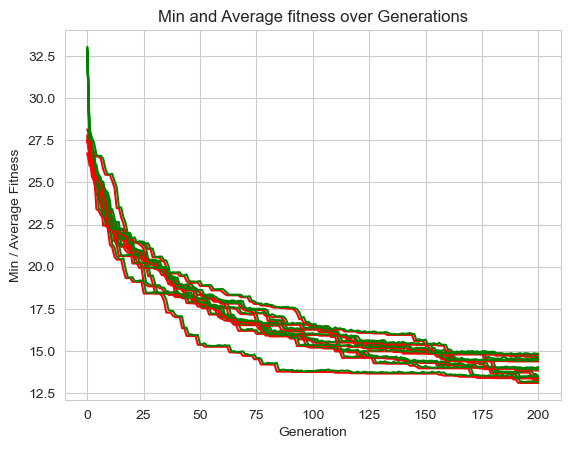

In [52]:
toolbox.register("select", tools.selLexicase)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

gen	nevals	min    	avg    
0  	300   	27.5774	32.9222
1  	142   	25.6589	32.8835
2  	112   	25.6589	32.8283
3  	165   	27.7562	32.8535
4  	139   	26.8883	32.8068
5  	120   	27.7707	32.8416
6  	147   	28.1857	32.7961
7  	131   	28.1857	32.8236
8  	92    	28.1489	32.8786
9  	115   	25.7121	32.9074
10 	132   	28.1489	32.9644
11 	123   	26.405 	33.0133
12 	134   	26.405 	32.9606
13 	118   	26.405 	33.0699
14 	126   	26.6398	33.0506
15 	148   	26.6398	33.0058
16 	130   	26.0033	33.0311
17 	133   	26.0042	33.0125
18 	123   	27.0023	32.9892
19 	140   	27.4888	32.9885
20 	113   	25.3431	32.9314
21 	127   	27.3171	32.9555
22 	137   	25.7346	32.9717
23 	129   	25.7346	33.0158
24 	154   	25.8046	32.9183
25 	139   	26.1271	33.0051
26 	161   	25.3985	33.054 
27 	127   	25.1462	32.9473
28 	122   	25.5099	32.9652
29 	110   	25.5099	32.996 
30 	128   	28.0185	33.0134
31 	99    	27.6382	32.9902
32 	147   	26.8478	32.9037
33 	119   	27.3277	32.8472
34 	128   	27.3277	32.8782
35 	111   	26.0305	32.8226
3

103	142   	26.3504	33.1899
104	133   	25.8582	33.1087
105	135   	27.1799	33.0243
106	128   	27.1799	32.9623
107	98    	27.1799	32.909 
108	130   	26.7208	32.9301
109	130   	26.7208	32.9622
110	129   	26.7208	32.9704
111	111   	26.7208	32.944 
112	119   	27.0641	32.8773
113	141   	27.0641	32.8127
114	123   	27.0641	32.8261
115	134   	26.3288	32.8405
116	128   	26.8556	32.8234
117	130   	26.5152	32.8916
118	131   	24.5957	32.8375
119	134   	26.6038	32.8651
120	112   	25.5263	32.93  
121	122   	26.0841	32.8913
122	117   	26.0841	32.8767
123	133   	25.1713	32.903 
124	143   	26.1532	33.0045
125	120   	26.2068	32.9322
126	133   	26.2068	32.8378
127	113   	26.2068	32.7971
128	129   	24.3178	32.8185
129	113   	24.3178	32.7872
130	119   	24.3178	32.6354
131	134   	24.3178	32.6472
132	128   	24.3178	32.7974
133	139   	24.7673	32.7684
134	137   	24.7673	32.7306
135	140   	25.8564	32.7514
136	126   	26.6309	32.8164
137	113   	26.0164	32.8373
138	128   	26.0164	32.7826
139	139   	26.0164	32.8165
1

4  	125   	28.2437	32.8193
5  	116   	28.2472	32.8446
6  	131   	26.7278	32.832 
7  	133   	26.7278	32.8516
8  	102   	26.7278	32.846 
9  	109   	26.7278	32.8418
10 	157   	26.7278	32.7923
11 	117   	26.7278	32.8852
12 	144   	26.6415	32.9467
13 	135   	26.6415	32.9157
14 	119   	27.0562	32.944 
15 	120   	27.0523	32.9699
16 	117   	27.0523	32.9595
17 	131   	27.0523	32.9891
18 	132   	27.0523	33.0095
19 	144   	26.7446	32.9929
20 	151   	26.7446	32.9293
21 	143   	26.3858	33.0212
22 	114   	26.3858	32.9952
23 	148   	26.3858	32.9807
24 	116   	26.3858	32.9359
25 	113   	26.3858	32.9135
26 	116   	25.5237	32.9042
27 	107   	25.5237	32.8875
28 	144   	25.6579	32.8901
29 	134   	25.6579	32.8419
30 	120   	25.5849	32.9355
31 	122   	25.5849	32.9287
32 	115   	24.1428	32.9198
33 	113   	24.1428	32.9201
34 	133   	24.1428	32.8665
35 	137   	24.1428	32.9551
36 	124   	24.1428	32.977 
37 	110   	26.7557	33.0146
38 	155   	26.7557	32.9706
39 	121   	26.7557	32.9862
40 	130   	26.3718	33.0148
4

106	141   	27.067 	33.1026
107	113   	27.0879	33.1479
108	123   	27.0879	33.0838
109	129   	25.9289	32.8869
110	115   	27.5636	32.9962
111	123   	27.815 	33.0245
112	119   	26.0867	32.966 
113	140   	28.0931	32.9813
114	121   	27.7223	32.9271
115	116   	26.4714	32.9059
116	137   	26.4714	32.8935
117	124   	26.2601	32.9182
118	89    	26.931 	32.8692
119	131   	26.931 	32.8871
120	134   	26.632 	32.8739
121	116   	26.0331	32.8206
122	147   	27.1965	32.8923
123	132   	26.8258	32.7954
124	161   	25.7759	32.7888
125	127   	25.7759	32.7418
126	114   	25.7759	32.7901
127	123   	25.7759	32.8638
128	118   	25.7759	32.827 
129	121   	25.8983	32.9431
130	115   	25.8983	33.0075
131	128   	25.8983	33.0117
132	108   	25.8983	33.0423
133	127   	25.8983	32.9628
134	133   	25.8983	32.9836
135	122   	25.8983	32.9732
136	152   	25.8983	32.9496
137	131   	25.1915	32.9273
138	130   	25.1915	32.9741
139	125   	25.9921	32.8785
140	119   	25.9921	32.8555
141	134   	25.9921	32.9116
142	141   	27.463 	32.8375
1

6  	113   	26.8329	32.9577
7  	129   	26.8329	32.9128
8  	139   	26.8329	32.7178
9  	135   	26.8329	32.697 
10 	136   	26.8329	32.6287
11 	132   	26.7892	32.6274
12 	130   	25.1218	32.6486
13 	139   	25.1218	32.5708
14 	124   	25.1218	32.6484
15 	142   	25.1218	32.6294
16 	152   	25.1218	32.693 
17 	122   	24.8995	32.7018
18 	148   	24.8995	32.6322
19 	119   	26.5223	32.6035
20 	128   	26.5223	32.5986
21 	121   	27.7312	32.5374
22 	138   	27.6678	32.4975
23 	120   	27.2844	32.5928
24 	141   	26.25  	32.6734
25 	123   	27.2688	32.7754
26 	135   	27.491 	32.818 
27 	124   	26.3592	32.8241
28 	122   	26.3592	32.8644
29 	129   	26.0408	32.9535
30 	152   	27.957 	33.0036
31 	123   	26.7158	33.0177
32 	139   	26.7158	33.0702
33 	127   	27.123 	32.9611
34 	133   	24.8027	32.9426
35 	132   	24.7685	32.8867
36 	125   	26.272 	32.8672
37 	133   	26.3198	32.8092
38 	117   	26.3198	32.8398
39 	134   	26.3934	32.9282
40 	144   	25.7489	32.9099
41 	151   	26.3432	32.8333
42 	113   	26.6414	32.7452
4

110	128   	27.0363	33.0281
111	158   	26.7817	33.0897
112	125   	26.7817	33.1267
113	128   	26.7817	33.1123
114	137   	26.5999	33.0972
115	129   	26.5999	33.0545
116	145   	26.5999	33.1197
117	126   	26.5999	33.0864
118	145   	27.738 	33.0569
119	116   	27.738 	33.0272
120	142   	27.738 	32.9489
121	126   	27.7051	32.8959
122	137   	27.7051	32.9432
123	121   	25.2429	32.9179
124	133   	25.2429	32.944 
125	124   	25.2429	32.9192
126	128   	26.1587	32.9013
127	148   	25.0063	32.9667
128	147   	25.0063	32.9329
129	121   	25.0063	32.902 
130	119   	25.6692	32.862 
131	109   	24.7586	32.8828
132	138   	24.0872	32.8827
133	145   	24.0872	32.9214
134	138   	24.0872	32.9253
135	104   	24.3132	32.8518
136	112   	26.3117	32.8823
137	138   	26.3117	32.9111
138	135   	26.3117	32.8993
139	118   	26.3117	32.8965
140	121   	26.3117	32.8483
141	129   	26.8129	32.8767
142	126   	26.8129	32.8794
143	107   	26.9155	32.9177
144	138   	25.3955	32.9164
145	126   	25.3955	32.8577
146	112   	25.3955	32.8217
1

11 	123   	26.6608	33.0333
12 	129   	26.2458	32.9763
13 	117   	26.2458	32.9879
14 	131   	24.5375	32.8786
15 	126   	23.8484	32.866 
16 	137   	23.8484	32.9667
17 	142   	23.8484	32.9946
18 	154   	23.8484	33.0711
19 	139   	23.8484	33.073 
20 	146   	25.3482	33.0515
21 	132   	25.3482	32.9547
22 	125   	27.4401	33.0617
23 	119   	25.6559	33.0519
24 	129   	26.2902	32.9686
25 	110   	26.2902	32.9724
26 	128   	26.9775	33.0651
27 	129   	26.5611	33.1275
28 	145   	26.4333	33.1195
29 	124   	25.9563	33.033 
30 	120   	26.2043	33.0196
31 	129   	26.2043	33.0973
32 	129   	26.5972	33.1309
33 	123   	27.08  	33.2175
34 	126   	26.4685	33.1459
35 	157   	26.4685	33.2688
36 	128   	26.4685	33.3291
37 	129   	26.4685	33.314 
38 	121   	26.4685	33.2754
39 	130   	26.4685	33.2098
40 	135   	27.2322	33.1264
41 	106   	27.2322	33.0706
42 	131   	26.449 	33.0909
43 	101   	26.1227	33.0506
44 	131   	26.3897	33.0656
45 	145   	26.3897	33.0735
46 	124   	27.012 	33.0267
47 	144   	27.7107	33.0234
4

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


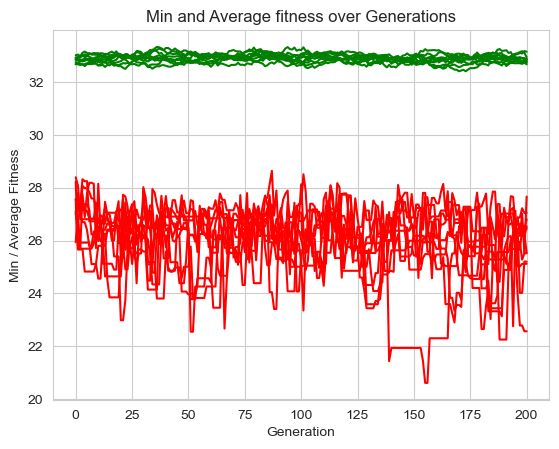

In [53]:
toolbox.register("select", tools.selNSGA2)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)


## Table of different algorithms - different selection methods
Below is the table showing the different selection methods and parameter tuning

In [54]:
sorted_by_fitness = results_df.sort_values('Avg Fitness', ascending=True)
print(sorted_by_fitness.T)

                                              12  \
Avg Fitness                             8.938879   
Population                                   300   
Max Generations                              200   
P_Crossover                                  0.9   
P_Mutation                                   0.1   
Selection Method     selTournament (tournsize=4)   
Crossover Method                    cxOrdered ()   
Mutation Method   mutShuffleIndexes (indpb=0.02)   
TSP Length                                  50.0   

                                              9   \
Avg Fitness                             9.465736   
Population                                  1000   
Max Generations                              200   
P_Crossover                                  0.4   
P_Mutation                                  0.05   
Selection Method     selTournament (tournsize=2)   
Crossover Method                    cxOrdered ()   
Mutation Method   mutShuffleIndexes (indpb=0.02)   
TSP Length 

## Best selection method

The best selection method in the case of the TSP appears to be selTournament. 
When the parameter for tournament size is set > 2 we can expect a better result in the short term, but  it means that we lack diversity in our algorithm due to only selecting the best.

# (6) Do the same comparison with different crossover and mutation mechanisms

Since many crossover methods aren't permutation friendly such as in the case of TSP we will only be exploring the other alternative built into DEAP which is Partially mapped crossover (PMX), previously I explored using cxOnePoint and cxTwoPoint and was under the impression that they were the best from research online, I have found that they can't be used natively in permutation problems

gen	nevals	min    	avg    
0  	300   	28.5954	32.8766
1  	146   	27.5409	31.5422
2  	142   	26.815 	30.7138
3  	149   	26.3962	29.8676
4  	122   	26.2997	29.2408
5  	122   	25.282 	28.6936
6  	129   	25.282 	28.3503
7  	123   	25.282 	27.7225
8  	134   	24.4718	26.8111
9  	130   	24.3951	26.3136
10 	129   	24.3951	25.8136
11 	138   	24.3951	25.736 
12 	132   	24.3951	25.9039
13 	144   	23.9783	25.6211
14 	105   	23.92  	25.1839
15 	119   	22.9988	25.0573
16 	139   	23.3491	25.103 
17 	147   	22.8502	25.0116
18 	141   	22.8502	24.5901
19 	141   	22.4745	24.1959
20 	114   	22.4745	23.9979
21 	110   	22.4745	23.629 
22 	134   	21.9157	23.2683
23 	125   	21.9157	22.7277
24 	128   	21.7149	22.4752
25 	130   	21.4168	22.2862
26 	143   	21.3857	22.0529
27 	109   	21.0533	21.8575
28 	111   	20.8403	21.6075
29 	143   	20.8403	21.4084
30 	117   	20.6524	21.2837
31 	122   	20.1183	20.9907
32 	129   	20.1183	20.8268
33 	133   	19.9426	20.6726
34 	126   	19.9426	20.4836
35 	99    	19.788 	20.279 
3

126	135   	13.2619	13.4239
127	115   	13.2619	13.3937
128	121   	13.2619	13.3065
129	133   	13.2619	13.3529
130	142   	13.2619	13.3669
131	141   	13.2619	13.3526
132	107   	13.2619	13.3354
133	112   	13.2619	13.3293
134	125   	13.2619	13.3501
135	147   	13.135 	13.3223
136	133   	13.135 	13.3885
137	128   	13.1345	13.3219
138	129   	13.1345	13.268 
139	115   	13.0076	13.249 
140	119   	13.0076	13.277 
141	129   	13.0076	13.1751
142	118   	12.8687	13.1867
143	125   	12.8687	13.0713
144	119   	12.8687	13.0564
145	130   	12.8687	13.0595
146	119   	12.8687	13.0113
147	125   	12.8687	12.9353
148	134   	12.8687	12.9189
149	134   	12.8687	12.9541
150	136   	12.8687	12.9344
151	137   	12.8687	12.943 
152	112   	12.8687	12.9195
153	109   	12.8687	12.9718
154	116   	12.8687	12.9919
155	128   	12.8655	12.925 
156	114   	12.8655	12.9235
157	116   	12.8655	12.9551
158	152   	12.8655	12.9495
159	119   	12.8655	12.9248
160	124   	12.8655	12.9408
161	130   	12.8655	12.9608
162	128   	12.8655	12.9589
1

49 	113   	16.0891	16.2511
50 	124   	16.0891	16.2473
51 	151   	16.0891	16.2327
52 	120   	16.0891	16.242 
53 	126   	16.0891	16.1843
54 	144   	16.0891	16.1515
55 	143   	16.0891	16.1243
56 	132   	16.0445	16.1465
57 	136   	15.9721	16.1429
58 	131   	15.9721	16.1442
59 	113   	15.9721	16.162 
60 	134   	15.928 	16.1351
61 	126   	15.928 	16.074 
62 	131   	15.8556	16.0548
63 	131   	15.8556	15.9981
64 	125   	15.8556	16.0339
65 	131   	15.8556	15.9576
66 	121   	15.8556	15.8786
67 	133   	15.8556	15.8836
68 	135   	15.8556	15.8985
69 	107   	15.8556	15.9523
70 	132   	15.8556	15.9345
71 	127   	15.8556	15.9668
72 	134   	15.8556	15.9577
73 	128   	15.8556	15.9187
74 	126   	15.8556	15.982 
75 	131   	15.8556	15.9479
76 	132   	15.8556	15.9024
77 	138   	15.8556	15.9078
78 	141   	15.8034	15.9504
79 	125   	15.8034	15.9115
80 	109   	15.8034	15.961 
81 	147   	15.7658	15.9251
82 	141   	15.7658	15.9094
83 	130   	15.7658	15.8382
84 	133   	15.7658	15.8358
85 	131   	15.7658	15.8746
8

184	131   	15.1388	15.1744
185	135   	15.1359	15.19  
186	152   	15.1359	15.219 
187	136   	15.1359	15.1922
188	113   	15.1359	15.2058
189	134   	15.1359	15.185 
190	129   	15.1359	15.2187
191	136   	15.1359	15.2423
192	106   	15.1359	15.2194
193	126   	15.1359	15.1699
194	133   	15.1359	15.2036
195	121   	15.1359	15.2513
196	121   	15.1359	15.1766
197	142   	15.0964	15.205 
198	129   	15.0964	15.1683
199	117   	15.0964	15.2389
200	143   	15.0964	15.1751
gen	nevals	min    	avg    
0  	300   	27.5677	32.8084
1  	129   	27.5536	31.0651
2  	124   	25.8543	30.0418
3  	128   	25.8543	29.4458
4  	129   	25.3426	28.8318
5  	140   	25.3426	28.4041
6  	132   	24.244 	27.7465
7  	106   	24.244 	26.8792
8  	122   	23.1767	26.5357
9  	146   	24.244 	26.6231
10 	125   	24.1009	26.1982
11 	123   	23.1592	25.7645
12 	142   	23.1592	24.9527
13 	127   	23.0647	24.4437
14 	127   	22.2717	24.3898
15 	125   	21.9187	24.1241
16 	111   	21.5704	23.4115
17 	140   	21.0657	22.9633
18 	116   	20.9983	22.4282
1

93 	139   	16.7506	16.8359
94 	125   	16.735 	16.8069
95 	122   	16.735 	16.8058
96 	138   	16.735 	16.845 
97 	108   	16.735 	16.8402
98 	126   	16.735 	16.8227
99 	141   	16.735 	16.7791
100	138   	16.7313	16.8293
101	137   	16.7313	16.7803
102	135   	16.7313	16.8249
103	100   	16.6531	16.8085
104	152   	16.3881	16.803 
105	145   	16.3845	16.7857
106	119   	16.3845	16.7777
107	110   	16.3845	16.6717
108	126   	16.3845	16.5115
109	144   	16.3845	16.4772
110	149   	15.902 	16.4897
111	122   	15.902 	16.4306
112	121   	15.902 	16.4315
113	131   	15.902 	16.3089
114	117   	15.6488	16.168 
115	137   	15.6488	15.9383
116	125   	15.6488	15.8924
117	108   	15.6488	15.8537
118	156   	15.5092	15.7452
119	153   	15.5092	15.6972
120	134   	15.3614	15.6785
121	133   	15.3614	15.6183
122	113   	15.2218	15.5693
123	135   	15.2218	15.5278
124	132   	15.2218	15.4595
125	135   	15.2218	15.3809
126	158   	15.2218	15.2895
127	141   	15.2218	15.3026
128	115   	15.2218	15.2827
129	125   	15.2218	15.3035
1

1  	133   	26.6945	31.202 
2  	142   	25.9607	30.1405
3  	122   	25.9607	29.3749
4  	131   	24.265 	28.7185
5  	150   	23.6127	27.9281
6  	136   	23.0829	26.7312
7  	130   	23.0829	26.2633
8  	121   	23.0829	25.8167
9  	127   	22.7576	25.3026
10 	115   	22.4389	24.9998
11 	121   	22.4248	24.0182
12 	125   	22.244 	23.4429
13 	138   	22.0604	23.1813
14 	133   	21.8672	22.8704
15 	124   	21.2054	22.4733
16 	110   	21.0218	22.1817
17 	128   	21.0218	22.041 
18 	143   	20.6304	21.8763
19 	139   	20.5557	21.454 
20 	118   	20.3008	20.9946
21 	121   	20.098 	20.7451
22 	121   	20.0309	20.6054
23 	105   	19.9561	20.5424
24 	119   	19.8639	20.3741
25 	135   	19.7079	20.274 
26 	125   	19.6224	20.1614
27 	123   	19.4335	20.0497
28 	132   	19.1767	19.9762
29 	114   	19.1039	19.8399
30 	116   	18.6465	19.6372
31 	133   	18.6465	19.4782
32 	137   	18.2198	19.3401
33 	138   	18.2198	19.1301
34 	138   	17.9597	18.9546
35 	133   	17.9597	18.8034
36 	115   	17.8985	18.7306
37 	137   	17.4992	18.5461
3

105	140   	13.8635	14.1303
106	119   	13.7199	14.1014
107	120   	13.7199	14.0531
108	130   	13.7199	13.9651
109	113   	13.7199	13.9389
110	139   	13.7199	13.855 
111	136   	13.7199	13.8004
112	136   	13.7199	13.7808
113	139   	13.7199	13.8201
114	114   	13.7199	13.758 
115	135   	13.7199	13.8136
116	122   	13.7199	13.7845
117	128   	13.7199	13.7494
118	121   	13.7199	13.8474
119	123   	13.4194	13.7904
120	120   	13.4194	13.7723
121	122   	13.4194	13.7582
122	127   	13.4194	13.7181
123	131   	13.4194	13.6734
124	128   	13.4194	13.487 
125	141   	13.4194	13.4791
126	108   	13.4194	13.4488
127	120   	13.4194	13.5188
128	120   	13.4194	13.514 
129	128   	13.4194	13.4789
130	125   	13.4194	13.503 
131	130   	13.4194	13.4716
132	119   	13.4194	13.4957
133	125   	13.4194	13.5019
134	120   	13.4194	13.526 
135	125   	13.2615	13.4962
136	128   	13.2615	13.5339
137	113   	13.2615	13.5226
138	120   	13.2615	13.4549
139	130   	13.2615	13.45  
140	152   	13.2615	13.4061
141	114   	13.2615	13.3071
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


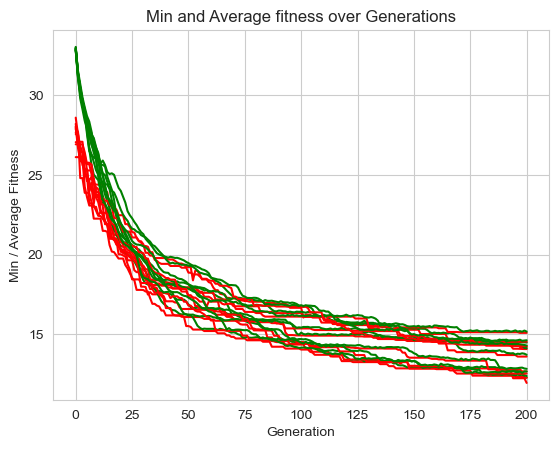

In [55]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("select", tools.selTournament, tournsize=4)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)


# Now to compare mutation mechanisms
From doing the above experiments

toolbox.register("mate", tools.mutShuffleIndexes )
toolbox.register("select", tools.selTournament, tournsize=4)

Have given us the best preformance without breaking the limitations/rules of TSP in which every city must be unique.

The orginal mutate method we have used up until this point is 
`toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))`

gen	nevals	min    	avg    
0  	300   	27.8326	32.9839
1  	112   	27.3147	31.2509
2  	140   	24.9821	29.8174
3  	124   	24.9821	28.695 
4  	131   	22.7806	27.8006
5  	127   	22.7806	27.017 
6  	115   	22.7806	26.0218
7  	108   	22.5941	24.9333
8  	149   	21.7673	24.1064
9  	119   	21.6324	23.1712
10 	112   	21.6324	22.8831
11 	165   	20.0753	22.9033
12 	121   	20.7283	22.4418
13 	169   	20.5874	22.3026
14 	115   	19.6581	21.8569
15 	107   	19.6581	21.5187
16 	118   	19.6581	21.2273
17 	131   	19.5889	20.8981
18 	147   	19.3218	20.6604
19 	145   	18.5628	20.1817
20 	119   	18.5628	19.8428
21 	130   	18.5628	19.8385
22 	119   	18.5628	19.7124
23 	132   	18.0278	19.5138
24 	127   	17.835 	19.1752
25 	132   	17.835 	18.7727
26 	132   	17.6174	18.5668
27 	137   	17.1761	18.3452
28 	147   	17.1553	18.236 
29 	146   	17.099 	18.0767
30 	127   	16.9383	17.9153
31 	115   	16.9383	17.6843
32 	132   	16.568 	17.6624
33 	102   	16.514 	17.2407
34 	148   	16.514 	17.3815
35 	123   	16.2472	17.0549
3

106	148   	11.3376	11.4736
107	128   	11.3376	11.4571
108	126   	11.3376	11.4581
109	128   	11.3376	11.4381
110	122   	11.3376	11.4495
111	127   	11.3376	11.416 
112	130   	11.3376	11.5041
113	117   	11.3376	11.4319
114	136   	11.3376	11.4824
115	139   	11.3376	11.4728
116	155   	11.3376	11.4165
117	142   	11.3376	11.4266
118	133   	11.3376	11.4612
119	130   	11.1527	11.4722
120	147   	11.1527	11.4204
121	151   	11.1527	11.4475
122	124   	11.1527	11.4114
123	135   	11.1527	11.4356
124	138   	11.145 	11.3713
125	119   	11.145 	11.3682
126	122   	11.145 	11.262 
127	118   	11.145 	11.1914
128	137   	11.145 	11.323 
129	113   	11.145 	11.2093
130	116   	11.145 	11.2351
131	127   	11.145 	11.256 
132	132   	11.145 	11.2435
133	138   	11.145 	11.2151
134	127   	11.145 	11.2379
135	119   	11.145 	11.1609
136	140   	11.145 	11.1673
137	135   	11.145 	11.2232
138	147   	11.0075	11.2624
139	133   	11.0075	11.2148
140	138   	11.0075	11.2621
141	148   	11.0075	11.3052
142	129   	11.0075	11.2364
1

31 	150   	15.8101	16.603 
32 	128   	15.6611	16.4669
33 	139   	15.4961	16.2259
34 	139   	15.4502	15.9094
35 	110   	15.3251	15.9088
36 	118   	15.2993	15.8917
37 	117   	15.1926	15.7305
38 	134   	15.1926	15.6208
39 	122   	15.1926	15.5564
40 	120   	15.025 	15.4926
41 	127   	14.6719	15.5024
42 	137   	14.6719	15.357 
43 	122   	14.6719	15.3751
44 	112   	14.6602	15.3503
45 	138   	14.3066	15.2714
46 	143   	14.3066	15.2395
47 	135   	14.1234	15.0893
48 	141   	14.1234	14.9717
49 	151   	14.029 	14.9202
50 	114   	13.7958	14.6374
51 	141   	13.7958	14.5822
52 	137   	13.7565	14.4653
53 	138   	13.6868	14.3085
54 	116   	13.6868	14.1159
55 	132   	13.6864	14.0658
56 	141   	13.6732	13.9253
57 	125   	13.5874	13.9618
58 	142   	13.5653	13.9745
59 	142   	13.5653	13.991 
60 	140   	13.3887	13.9457
61 	154   	13.2008	13.9358
62 	131   	13.2008	13.8303
63 	119   	13.2008	13.7999
64 	128   	13.2008	13.6709
65 	148   	13.2008	13.6403
66 	128   	13.1124	13.3961
67 	130   	13.1124	13.2729
6

146	136   	12.1753	12.1993
147	157   	12.1753	12.274 
148	145   	12.1753	12.2079
149	127   	12.1753	12.2726
150	155   	12.1753	12.2613
151	131   	12.1753	12.2441
152	135   	12.1753	12.2281
153	140   	12.1753	12.3039
154	117   	12.1753	12.2988
155	141   	12.1753	12.2129
156	116   	12.1753	12.2129
157	125   	12.1753	12.2913
158	134   	12.1753	12.2589
159	131   	12.1753	12.309 
160	133   	12.1753	12.2462
161	142   	12.1753	12.2354
162	116   	12.1753	12.2696
163	114   	12.1753	12.2284
164	125   	12.1753	12.2402
165	106   	12.1753	12.259 
166	144   	12.1184	12.2562
167	138   	12.1184	12.2515
168	140   	11.9668	12.303 
169	131   	11.9668	12.2815
170	127   	11.9625	12.1861
171	128   	11.9625	12.0756
172	116   	11.9625	12.0229
173	119   	11.9625	12.037 
174	154   	11.9625	12.0628
175	138   	11.9625	12.0405
176	141   	11.9625	12.0809
177	135   	11.9625	12.0201
178	119   	11.9625	11.9797
179	138   	11.9625	12.0618
180	143   	11.9625	12.0386
181	140   	11.9625	12.0145
182	107   	11.9625	12.0431
1

52 	133   	14.0693	14.4282
53 	141   	14.0693	14.4045
54 	115   	14.0693	14.2951
55 	137   	13.9955	14.2932
56 	131   	13.9955	14.2984
57 	129   	13.9125	14.1881
58 	146   	13.9125	14.2345
59 	137   	13.9125	14.2456
60 	145   	13.909 	14.2219
61 	129   	13.909 	14.1529
62 	142   	13.8347	14.1123
63 	128   	13.8658	14.07  
64 	121   	13.5622	14.0709
65 	116   	13.5622	14.0959
66 	127   	13.5622	14.1042
67 	136   	13.5243	14.0863
68 	122   	13.3956	13.8989
69 	117   	13.3797	13.7396
70 	131   	13.3797	13.731 
71 	139   	13.3797	13.68  
72 	117   	13.3522	13.6113
73 	121   	13.2027	13.6587
74 	141   	13.2027	13.6209
75 	108   	13.2027	13.5955
76 	127   	13.1659	13.5147
77 	152   	13.0123	13.3973
78 	147   	12.885 	13.3489
79 	115   	12.885 	13.265 
80 	120   	12.8059	13.2636
81 	112   	12.6101	13.2019
82 	148   	12.6101	13.0309
83 	140   	12.6101	12.9497
84 	124   	12.5743	12.9679
85 	147   	12.4421	12.7677
86 	144   	12.4421	12.7258
87 	114   	12.4421	12.7313
88 	125   	12.4421	12.8146
8

171	129   	12.3561	12.4796
172	131   	12.2212	12.4642
173	131   	12.2212	12.4358
174	156   	12.2212	12.4367
175	150   	12.2212	12.4608
176	151   	12.2212	12.4363
177	142   	12.2212	12.4255
178	138   	12.2212	12.3468
179	128   	12.0931	12.3219
180	118   	12.0931	12.3396
181	136   	12.0931	12.2862
182	141   	11.9472	12.3239
183	115   	11.9472	12.3589
184	135   	11.9472	12.2355
185	101   	11.9472	12.2963
186	138   	11.9472	12.1833
187	112   	11.9472	12.0509
188	119   	11.9315	12.0121
189	119   	11.9315	12.0357
190	148   	11.9315	12.0289
191	141   	11.8341	12.0149
192	149   	11.8341	12.0529
193	128   	11.8183	12.0364
194	125   	11.8183	12.0571
195	140   	11.7873	12.1598
196	135   	11.7873	12.0759
197	144   	11.7873	12.0047
198	134   	11.7873	11.9422
199	122   	11.7873	11.8649
200	118   	11.7873	11.8368
gen	nevals	min    	avg    
0  	300   	26.9416	32.9065
1  	137   	26.0468	30.9373
2  	129   	25.767 	29.4316
3  	106   	25.767 	28.2708
4  	131   	23.954 	27.4105
5  	140   	23.2246	26.5877
6

82 	153   	11.7826	12.0377
83 	136   	11.7437	12.0012
84 	115   	11.7437	12.0589
85 	137   	11.7437	11.9918
86 	119   	11.7437	11.9583
87 	136   	11.5739	11.9702
88 	142   	11.5739	12.0293
89 	132   	11.5739	11.9224
90 	121   	11.5739	11.9383
91 	130   	11.535 	11.9388
92 	132   	11.535 	11.8003
93 	133   	11.535 	11.718 
94 	138   	11.535 	11.7203
95 	137   	11.535 	11.7266
96 	126   	11.535 	11.6098
97 	122   	11.535 	11.6237
98 	115   	11.535 	11.609 
99 	133   	11.535 	11.6274
100	103   	11.535 	11.6192
101	110   	11.535 	11.6193
102	125   	11.535 	11.6666
103	134   	11.535 	11.5691
104	116   	11.535 	11.5615
105	119   	11.535 	11.6058
106	154   	11.535 	11.5819
107	119   	11.535 	11.6948
108	136   	11.535 	11.5963
109	127   	11.535 	11.6414
110	130   	11.535 	11.6052
111	119   	11.535 	11.6049
112	132   	11.535 	11.6104
113	126   	11.535 	11.6225
114	117   	11.535 	11.6142
115	114   	11.2721	11.6033
116	140   	11.2721	11.622 
117	132   	11.2721	11.6119
118	129   	11.2721	11.5676
1

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


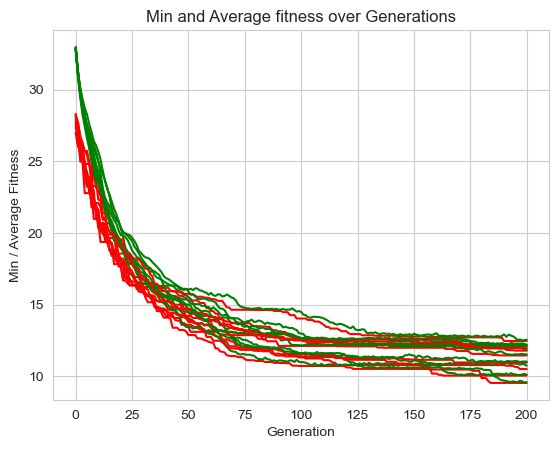

In [56]:
#Best method so far
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))

toolbox.register("mate", tools.cxOrdered) 
toolbox.register("select", tools.selTournament, tournsize=4)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)


In [57]:
print(results_df.T)

                         0                               1   \
Avg Fitness       89.489767                       22.677944   
Population              300                              50   
Max Generations         200                             200   
P_Crossover             0.9                             0.9   
P_Mutation              0.1                             0.1   
Selection Method         ()     selTournament (tournsize=2)   
Crossover Method         ()                    cxOrdered ()   
Mutation Method          ()  mutShuffleIndexes (indpb=0.02)   
TSP Length            200.0                            50.0   

                                              2   \
Avg Fitness                             14.42533   
Population                                    50   
Max Generations                              200   
P_Crossover                                  0.7   
P_Mutation                                   0.1   
Selection Method     selTournament (tournsize=2)   
Cross

gen	nevals	min    	avg    
0  	300   	28.3004	33.0528
1  	131   	27.0677	31.3963
2  	114   	27.0677	30.0393
3  	131   	25.3401	29.1409
4  	122   	24.6388	28.2701
5  	163   	23.4822	27.5566
6  	137   	21.2296	26.6974
7  	132   	21.2296	25.7959
8  	134   	20.5898	24.9092
9  	148   	20.5898	24.1921
10 	111   	20.5898	23.2846
11 	107   	19.1688	22.4968
12 	133   	19.1688	21.7795
13 	119   	16.9496	21.0178
14 	138   	15.2115	20.1546
15 	118   	14.9302	18.6517
16 	128   	9.26927	16.6459
17 	135   	4.4738 	14.339 
18 	135   	0      	10.8075
19 	119   	0      	6.76957
20 	133   	0      	2.92864
21 	136   	0      	0.594416
22 	119   	0      	0.0648846
23 	103   	0      	0.0408439
24 	146   	0      	0.0589968
25 	135   	0      	0.0272293
26 	141   	0      	0.0317675
27 	121   	0      	0.0385748
28 	107   	0      	0.0385748
29 	136   	0      	0.0317675
30 	142   	0      	0.0317675
31 	124   	0      	0.0294984
32 	120   	0      	0.0294984
33 	146   	0      	0.0385748
34 	137   	0      	0.0340366
3

88 	147   	0      	0.0181529
89 	126   	0      	0.0158838
90 	125   	0      	0.0272293
91 	143   	0      	0.0249602
92 	118   	0      	0.043113 
93 	128   	0      	0.0408439
94 	123   	0      	0.043113 
95 	126   	0      	0.0340366
96 	132   	0      	0.0340366
97 	131   	0      	0.0249602
98 	119   	0      	0.0317675
99 	134   	0      	0.0272293
100	139   	0      	0.063535 
101	147   	0      	0.0249602
102	133   	0      	0.0862261
103	114   	0      	0.0181529
104	121   	0      	0.0249602
105	132   	0      	0.0499204
106	145   	0      	0.020422 
107	140   	0      	0.0680732
108	126   	0      	0.0181529
109	130   	0      	0.0499204
110	126   	0      	0.0476513
111	126   	0      	0.0272293
112	122   	0      	0.0317675
113	129   	0      	0.0385748
114	128   	0      	0.0226911
115	112   	0      	0.0181529
116	122   	0      	0.0294984
117	127   	0      	0.063535 
118	136   	0      	0.0272293
119	123   	0      	0.0385748
120	127   	0      	0.0408439
121	119   	0      	0.0294984
122	114   	0  

188	125   	0      	0.020422  
189	132   	0      	0.0385748 
190	133   	0      	0.0408439 
191	119   	0      	0.0294984 
192	128   	0      	0.0249602 
193	134   	0      	0.0340366 
194	135   	0      	0.0476513 
195	128   	0      	0.043113  
196	134   	0      	0.0408439 
197	133   	0      	0.0272293 
198	95    	0      	0.0385748 
199	124   	0      	0.0363057 
200	119   	0      	0.0385748 
gen	nevals	min    	avg    
0  	300   	28.6923	33.0352
1  	118   	27.6037	31.353 
2  	136   	26.7694	30.1402
3  	124   	25.9353	29.1235
4  	123   	25.5224	28.1488
5  	123   	25.5224	27.4572
6  	114   	24.0802	26.8159
7  	132   	24.0873	26.2782
8  	138   	23.3517	25.8571
9  	145   	22.9383	25.3365
10 	118   	21.7318	24.7601
11 	127   	21.7318	24.1554
12 	121   	21.5859	23.6862
13 	121   	20.6112	23.2317
14 	115   	20.6112	22.6862
15 	105   	19.8525	22.118 
16 	136   	19.3812	21.7522
17 	119   	17.9751	21.2391
18 	126   	17.9751	20.784 
19 	129   	17.3316	20.2176
20 	130   	16.5763	19.7828
21 	135   	13.43

71 	144   	0      	0.0272293 
72 	146   	0      	0.0453822 
73 	123   	0      	0.0226911 
74 	140   	0      	0.0317675 
75 	116   	0      	0.0363057 
76 	114   	0      	0.043113  
77 	143   	0      	0.020422  
78 	126   	0      	0.0363057 
79 	125   	0      	0.0363057 
80 	125   	0      	0.0408439 
81 	136   	0      	0.0226911 
82 	132   	0      	0.00907643
83 	126   	0      	0.0226911 
84 	143   	0      	0.0272293 
85 	148   	0      	0.0294984 
86 	129   	0      	0.0363057 
87 	113   	0      	0.0385748 
88 	126   	0      	0.0408439 
89 	141   	0      	0.0136146 
90 	130   	0      	0.0363057 
91 	140   	0      	0.0272293 
92 	119   	0      	0.0453822 
93 	122   	0      	0.0113455 
94 	158   	0      	0.0408439 
95 	146   	0      	0.0294984 
96 	136   	0      	0.0272293 
97 	157   	0      	0.020422  
98 	119   	0      	0.020422  
99 	122   	0      	0.00453822
100	138   	0      	0.0499204 
101	128   	0      	0.0272293 
102	116   	0      	0.020422  
103	114   	0      	0.0181529 
104	128   

164	135   	0        	0.0442083
165	145   	0        	0.143677 
166	125   	0        	0.0552603
167	131   	0        	0.110521 
168	117   	0        	0.0607864
169	122   	0        	0.0663124
170	135   	0        	0.0994686
171	104   	0        	0.0497343
172	130   	0        	0.121573 
173	117   	0        	0.0552603
174	137   	0        	0.0552603
175	124   	0        	0.0386822
176	127   	0        	0.0718385
177	144   	0        	0.0442083
178	115   	0        	0.0497343
179	130   	0        	0.138151 
180	138   	0        	0.0663124
181	151   	0        	0.0497343
182	149   	0        	0.0994686
183	112   	0        	0.0607864
184	144   	0        	0.0994686
185	119   	0        	0.0497343
186	137   	0        	0.121573 
187	131   	0        	0.160255 
188	132   	0        	0.0773645
189	121   	0        	0.104995 
190	122   	0        	0.0994686
191	139   	0        	0.138151 
192	126   	0        	0.0884166
193	130   	0        	0.154729 
194	137   	0        	0.0884166
195	126   	0        	0.0994686
196	123 

55 	124   	0      	0.0294984 
56 	119   	0      	0.0317675 
57 	108   	0      	0.0136146 
58 	154   	0      	0.020422  
59 	128   	0      	0.0294984 
60 	131   	0      	0.0226911 
61 	108   	0      	0.0567277 
62 	124   	0      	0.0136146 
63 	121   	0      	0.043113  
64 	130   	0      	0.0226911 
65 	141   	0      	0.0385748 
66 	107   	0      	0.0249602 
67 	116   	0      	0.0294984 
68 	142   	0      	0.0317675 
69 	116   	0      	0.0453822 
70 	148   	0      	0.0181529 
71 	122   	0      	0.0136146 
72 	140   	0      	0.0476513 
73 	130   	0      	0.0294984 
74 	138   	0      	0.063535  
75 	135   	0      	0.0294984 
76 	129   	0      	0.043113  
77 	115   	0      	0.0317675 
78 	137   	0      	0.043113  
79 	131   	0      	0.0453822 
80 	136   	0      	0.0408439 
81 	113   	0      	0.0453822 
82 	134   	0      	0.0294984 
83 	114   	0      	0.0272293 
84 	114   	0      	0.0544586 
85 	126   	0      	0.0317675 
86 	117   	0      	0.0521895 
87 	139   	0      	0.0408439 
88 	131   

159	139   	0      	0.0680732 
160	117   	0      	0.020422  
161	131   	0      	0.0226911 
162	127   	0      	0.043113  
163	148   	0      	0.0408439 
164	142   	0      	0.0226911 
165	130   	0      	0.0226911 
166	134   	0      	0.0476513 
167	115   	0      	0.0476513 
168	156   	0      	0.0408439 
169	136   	0      	0.0567277 
170	115   	0      	0.0408439 
171	112   	0      	0.0158838 
172	111   	0      	0.0317675 
173	131   	0      	0.0408439 
174	123   	0      	0.0136146 
175	117   	0      	0.0249602 
176	137   	0      	0.0385748 
177	111   	0      	0.0317675 
178	143   	0      	0.0453822 
179	121   	0      	0.0408439 
180	104   	0      	0.0544586 
181	145   	0      	0.0589968 
182	139   	0      	0.020422  
183	140   	0      	0.0363057 
184	121   	0      	0.0317675 
185	151   	0      	0.0453822 
186	136   	0      	0.0408439 
187	135   	0      	0.063535  
188	152   	0      	0.0294984 
189	138   	0      	0.0589968 
190	118   	0      	0.0340366 
191	122   	0      	0.0249602 
192	144   

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


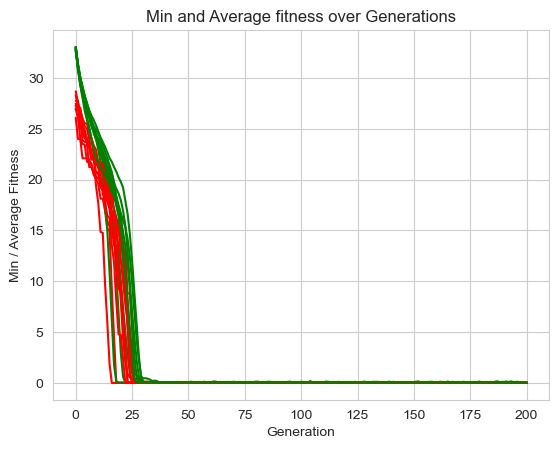

In [58]:
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(tsp))


toolbox.register("mate", tools.cxOrdered)
toolbox.register("select", tools.selTournament, tournsize=4)
update_methods()
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)


Despite mutate tools.mutFlipBit looking good in preformance it is a lie. It is flipping the numbers of the path to 0 and 1's. This violates the rule of the TSP.

With the current selection technique, tournament size of 2 - It seems as though it is better to have a smaller population size.

# (3) The experiments and results when refining your initial design. Show only those with significant improvements (no more than 4). Provide analyses of each set of results and discuss what contributed to the improvements.

From below this point we cover the best algorithms that were made based on the experiments above.

After this part we cover the best design and results and then conclusion.

In [59]:
print(results_df.T)

                         0                               1   \
Avg Fitness       89.489767                       22.677944   
Population              300                              50   
Max Generations         200                             200   
P_Crossover             0.9                             0.9   
P_Mutation              0.1                             0.1   
Selection Method         ()     selTournament (tournsize=2)   
Crossover Method         ()                    cxOrdered ()   
Mutation Method          ()  mutShuffleIndexes (indpb=0.02)   
TSP Length            200.0                            50.0   

                                              2   \
Avg Fitness                             14.42533   
Population                                    50   
Max Generations                              200   
P_Crossover                                  0.7   
P_Mutation                                   0.1   
Selection Method     selTournament (tournsize=2)   
Cross

In [60]:
sorted_by_fitness = results_df.sort_values('Avg Fitness', ascending=True)
print(sorted_by_fitness.T)

                                           20                              12  \
Avg Fitness                          0.038754                        8.938879   
Population                                300                             300   
Max Generations                           200                             200   
P_Crossover                               0.4                             0.9   
P_Mutation                               0.05                             0.1   
Selection Method  selTournament (tournsize=4)     selTournament (tournsize=4)   
Crossover Method                 cxOrdered ()                    cxOrdered ()   
Mutation Method       mutFlipBit (indpb=0.02)  mutShuffleIndexes (indpb=0.02)   
TSP Length                               50.0                            50.0   

                                              9   \
Avg Fitness                             9.465736   
Population                                  1000   
Max Generations                  



For this question we will discussing which parameters changes/selection/mutation/crossover methods resulted in signifcant improvements

## Improvement 1.
#### Modification of crossover parameter
When we initially lowered the crossover parameter I noticed that it improved our algorithm significantly in the case of using a max generation size of 200.

In the initial algorithm we had a probability of crossover of 0.9. This resulted in an average fitness of 22.04425 and best fitness of 19.4855, When we modified this crossover to 0.7 we got an average fitness of 15.0352 with a best fitness of 13.500. When we decreased this crossover to 0.4 our algorithm improved more as we got a average fitness of 9.51972 and a best fitness of 8.2578

##### Why having a lower crossover leads to a better algorithm.
When we were experimenting with lowering the crossover probability it helped with lowering the amount of individuals
that would have their genetics combined with others to make offspring. This means instead they may go into the next generation unchanged.

While we were modifying the crossover parameter we had a selection method of `tournament selection, size of 2` this selection method doesn't have much selection pressure and meant many with poor genetics would be passed on to the next generation (due to the tournament size). This may be good for exploration but it results in many poor solutions. Since we combined this with a crossover which had a low probability is resulted in improving this algorithm

##### My thoughts on using a low crossover probability
Using a low crossover score combined with a tournament selection with a size of 2 results in a great performance but it also focuses more on exploitation than exploration. This may lead to getting local optimum, but results in fast performance when trying to find a good TSP path in a short amount of time

## Improvement 2
#### Modification of population
Modifying the population size results in better best fitnesses in every case of the algorithm. This is shown when we increase our population size, when we have increased the population size we can expect to see better fitnesses in the metric, best fitness (This isn't in the table but is in every experiment next to the graph) Increasing the population size.

A greater population results in more diversity, this can help in some cases as it means we can find better solutions.
Despite the population size resulting in a better fitness it also meant a algorithm which took longer to complete.

## Improvement 3
#### LexiCase selection method
Lexicase
Avg = 13.8444
Best fitness = 12.909

Despite the Lexicase method not having the lowest fitness in terms of average or best fitness

it showed a very efficient graph compared to other selection methods. This was due to the way fitness decreased over generations. The Lexicase selection method didn't outshine the tournament selection method in the case of the current parameters such as max generation and population size. It is possible in a enviorment in which the algorithm has more generations that the lexicase selection method may result in a better fitness.

The lexicase promotes diversity this is the real why that the algorithm didn't preform as good in the context of 200 generations but if we had more computional power we could expect a great algorithm for solving TSP combined with the other parameters we have. 













# Results of the experiments, and the best algorithms for minimising fitness for TSP 50 cities

After doing all the experiments such as modifying parameters, selection method, mutation and crossover methods we will discuss the best algorithms - note: This is based on using 50 cities, though performance should be similar on 200 cities.

Based on all of the algorithms the best performing one had an average fitness of 5.034399.
This algorithm was using `mutFlipBit` which is actually misleading so we will **disqualify**

## Best Algorithm

At the time of writing the best algorithm used
The Tournament selection method with a size of 4
A Crossover method of CxOrdered
Mutation method of mutShuffleIndexes

A population size of 300
Max generations of 200
Probability of crossover 0.9
Probability of mutation 0.1

Now we will be testing this with the original population of 200


# Scaling Population to 200 and using our Best Algorithm

In [61]:
# create the desired traveling salesman problem instace:
TSP_NAME = "d200-7"  # name of problem
tsp = TravelingSalesmanProblem(TSP_NAME)
tsp_lenth = len(tsp)
print(tsp_lenth)

# Genetic Algorithm constants:
POPULATION_SIZE = 300
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1  # probability for mutating an individual

length = 200, locations = [array([0.577415, 0.979374], dtype=float32), array([0.450028, 0.663745], dtype=float32), array([0.512647, 0.514206], dtype=float32), array([0.898622, 0.974126], dtype=float32), array([0.739949, 0.147543], dtype=float32), array([0.187987, 1.014345], dtype=float32), array([0.200212, 0.303877], dtype=float32), array([1.126736, 0.410751], dtype=float32), array([0.901877, 0.42644 ], dtype=float32), array([1.355639, 0.757939], dtype=float32), array([0.633797, 0.550195], dtype=float32), array([0.526203, 1.176042], dtype=float32), array([0.697197, 1.252739], dtype=float32), array([0.37523 , 1.092364], dtype=float32), array([0.229429, 0.76595 ], dtype=float32), array([1.222864, 0.672509], dtype=float32), array([1.278286, 1.226356], dtype=float32), array([0.743149, 0.488997], dtype=float32), array([0.22513 , 0.960315], dtype=float32), array([0.725579, 0.630836], dtype=float32), array([0.916381, 0.37342 ], dtype=float32), array([0.803347, 1.271614], dtype=float32), array

3, 34: location1 = [0.898622 0.974126], location2 = [0.624327 0.519002] => distance = 0.5313901901245117
3, 35: location1 = [0.898622 0.974126], location2 = [0.196315 0.566238] => distance = 0.8121623396873474
3, 36: location1 = [0.898622 0.974126], location2 = [1.188285 1.038988] => distance = 0.2968362271785736
3, 37: location1 = [0.898622 0.974126], location2 = [0.25036  0.793996] => distance = 0.6728227138519287
3, 38: location1 = [0.898622 0.974126], location2 = [0.229251 0.468714] => distance = 0.8387483954429626
3, 39: location1 = [0.898622 0.974126], location2 = [1.336032 1.208735] => distance = 0.49635565280914307
3, 40: location1 = [0.898622 0.974126], location2 = [0.824819 1.242595] => distance = 0.2784285545349121
3, 41: location1 = [0.898622 0.974126], location2 = [0.418841 0.393133] => distance = 0.7534869313240051
3, 42: location1 = [0.898622 0.974126], location2 = [0.750629 0.369707] => distance = 0.6222734451293945
3, 43: location1 = [0.898622 0.974126], location2 = [0

4, 159: location1 = [0.739949 0.147543], location2 = [0.797885 0.480897] => distance = 0.3383511006832123
4, 160: location1 = [0.739949 0.147543], location2 = [0.833911 0.829788] => distance = 0.6886850595474243
4, 161: location1 = [0.739949 0.147543], location2 = [0.671117 0.734309] => distance = 0.5907894372940063
4, 162: location1 = [0.739949 0.147543], location2 = [0.37656  0.964851] => distance = 0.8944517374038696
4, 163: location1 = [0.739949 0.147543], location2 = [0.084563 0.506787] => distance = 0.7473868131637573
4, 164: location1 = [0.739949 0.147543], location2 = [0.753524 0.435165] => distance = 0.28794217109680176
4, 165: location1 = [0.739949 0.147543], location2 = [0.600481 0.152381] => distance = 0.13955190777778625
4, 166: location1 = [0.739949 0.147543], location2 = [0.447369 0.354651] => distance = 0.35846444964408875
4, 167: location1 = [0.739949 0.147543], location2 = [0.406432 0.641105] => distance = 0.5956819653511047
4, 168: location1 = [0.739949 0.147543], lo

8, 35: location1 = [0.901877 0.42644 ], location2 = [0.196315 0.566238] => distance = 0.7192782759666443
8, 36: location1 = [0.901877 0.42644 ], location2 = [1.188285 1.038988] => distance = 0.6761986613273621
8, 37: location1 = [0.901877 0.42644 ], location2 = [0.25036  0.793996] => distance = 0.7480452656745911
8, 38: location1 = [0.901877 0.42644 ], location2 = [0.229251 0.468714] => distance = 0.6739531755447388
8, 39: location1 = [0.901877 0.42644 ], location2 = [1.336032 1.208735] => distance = 0.8946932554244995
8, 40: location1 = [0.901877 0.42644 ], location2 = [0.824819 1.242595] => distance = 0.8197846412658691
8, 41: location1 = [0.901877 0.42644 ], location2 = [0.418841 0.393133] => distance = 0.4841829240322113
8, 42: location1 = [0.901877 0.42644 ], location2 = [0.750629 0.369707] => distance = 0.16153818368911743
8, 43: location1 = [0.901877 0.42644 ], location2 = [0.494115 0.019506] => distance = 0.5760773420333862
8, 44: location1 = [0.901877 0.42644 ], location2 = [0

11, 110: location1 = [0.526203 1.176042], location2 = [0.467734 0.363946] => distance = 0.8141980767250061
11, 111: location1 = [0.526203 1.176042], location2 = [0.335966 0.486739] => distance = 0.7150724530220032
11, 112: location1 = [0.526203 1.176042], location2 = [0.131253 0.656488] => distance = 0.6526268720626831
11, 113: location1 = [0.526203 1.176042], location2 = [0.624571 0.49817 ] => distance = 0.6849719882011414
11, 114: location1 = [0.526203 1.176042], location2 = [0.534161 0.385216] => distance = 0.7908660173416138
11, 115: location1 = [0.526203 1.176042], location2 = [0.638418 0.244086] => distance = 0.9386873841285706
11, 116: location1 = [0.526203 1.176042], location2 = [0.467252 0.405829] => distance = 0.772465705871582
11, 117: location1 = [0.526203 1.176042], location2 = [0.166012 0.296436] => distance = 0.9504967927932739
11, 118: location1 = [0.526203 1.176042], location2 = [0.958479 0.803183] => distance = 0.5708645582199097
11, 119: location1 = [0.526203 1.17604

13, 31: location1 = [0.37523  1.092364], location2 = [0.939697 0.184526] => distance = 1.0690149068832397
13, 32: location1 = [0.37523  1.092364], location2 = [0.492804 0.825359] => distance = 0.29174527525901794
13, 33: location1 = [0.37523  1.092364], location2 = [0.116085 0.253823] => distance = 0.8776713609695435
13, 34: location1 = [0.37523  1.092364], location2 = [0.624327 0.519002] => distance = 0.6251345276832581
13, 35: location1 = [0.37523  1.092364], location2 = [0.196315 0.566238] => distance = 0.5557149648666382
13, 36: location1 = [0.37523  1.092364], location2 = [1.188285 1.038988] => distance = 0.8148051500320435
13, 37: location1 = [0.37523  1.092364], location2 = [0.25036  0.793996] => distance = 0.3234439194202423
13, 38: location1 = [0.37523  1.092364], location2 = [0.229251 0.468714] => distance = 0.6405069231987
13, 39: location1 = [0.37523  1.092364], location2 = [1.336032 1.208735] => distance = 0.9678237438201904
13, 40: location1 = [0.37523  1.092364], locatio

17, 198: location1 = [0.743149 0.488997], location2 = [0.705379 0.522333] => distance = 0.05037718638777733
17, 199: location1 = [0.743149 0.488997], location2 = [0.462782 0.514952] => distance = 0.2815658152103424
18, 19: location1 = [0.22513  0.960315], location2 = [0.725579 0.630836] => distance = 0.5991707444190979
18, 20: location1 = [0.22513  0.960315], location2 = [0.916381 0.37342 ] => distance = 0.9067930579185486
18, 21: location1 = [0.22513  0.960315], location2 = [0.803347 1.271614] => distance = 0.6566901206970215
18, 22: location1 = [0.22513  0.960315], location2 = [1.210521 1.065641] => distance = 0.9910039901733398
18, 23: location1 = [0.22513  0.960315], location2 = [0.481422 0.750601] => distance = 0.3311578929424286
18, 24: location1 = [0.22513  0.960315], location2 = [1.260955 0.817833] => distance = 1.0455785989761353
18, 25: location1 = [0.22513  0.960315], location2 = [0.801021 0.767294] => distance = 0.6073775887489319
18, 26: location1 = [0.22513  0.960315], lo

19, 79: location1 = [0.725579 0.630836], location2 = [0.933457 0.421097] => distance = 0.29530274868011475
19, 80: location1 = [0.725579 0.630836], location2 = [0.543309 0.203231] => distance = 0.4648315906524658
19, 81: location1 = [0.725579 0.630836], location2 = [0.434454 1.175386] => distance = 0.6174855828285217
19, 82: location1 = [0.725579 0.630836], location2 = [0.224718 0.19352 ] => distance = 0.6649113297462463
19, 83: location1 = [0.725579 0.630836], location2 = [1.329618 0.188191] => distance = 0.7488642930984497
19, 84: location1 = [0.725579 0.630836], location2 = [1.240578 0.286324] => distance = 0.6196067333221436
19, 85: location1 = [0.725579 0.630836], location2 = [0.202053 0.858412] => distance = 0.5708504915237427
19, 86: location1 = [0.725579 0.630836], location2 = [0.629605 1.388557] => distance = 0.7637748718261719
19, 87: location1 = [0.725579 0.630836], location2 = [0.07774  0.502357] => distance = 0.6604560613632202
19, 88: location1 = [0.725579 0.630836], loca

23, 194: location1 = [0.481422 0.750601], location2 = [0.732854 0.746042] => distance = 0.2514733374118805
23, 195: location1 = [0.481422 0.750601], location2 = [0.745234 0.584325] => distance = 0.3118404448032379
23, 196: location1 = [0.481422 0.750601], location2 = [0.087265 0.685945] => distance = 0.3994247615337372
23, 197: location1 = [0.481422 0.750601], location2 = [0.299941 0.236489] => distance = 0.5452031493186951
23, 198: location1 = [0.481422 0.750601], location2 = [0.705379 0.522333] => distance = 0.31978586316108704
23, 199: location1 = [0.481422 0.750601], location2 = [0.462782 0.514952] => distance = 0.2363850623369217
24, 25: location1 = [1.260955 0.817833], location2 = [0.801021 0.767294] => distance = 0.46270236372947693
24, 26: location1 = [1.260955 0.817833], location2 = [0.848621 0.480769] => distance = 0.5325706005096436
24, 27: location1 = [1.260955 0.817833], location2 = [0.817893 0.221125] => distance = 0.7432121634483337
24, 28: location1 = [1.260955 0.817833

30, 106: location1 = [0.393648 0.670161], location2 = [0.672651 0.868515] => distance = 0.3423258364200592
30, 107: location1 = [0.393648 0.670161], location2 = [0.41938  0.872425] => distance = 0.20389424264431
30, 108: location1 = [0.393648 0.670161], location2 = [0.321188 0.435316] => distance = 0.2457694709300995
30, 109: location1 = [0.393648 0.670161], location2 = [0.925106 0.627582] => distance = 0.533160924911499
30, 110: location1 = [0.393648 0.670161], location2 = [0.467734 0.363946] => distance = 0.31504979729652405
30, 111: location1 = [0.393648 0.670161], location2 = [0.335966 0.486739] => distance = 0.19227802753448486
30, 112: location1 = [0.393648 0.670161], location2 = [0.131253 0.656488] => distance = 0.2627509832382202
30, 113: location1 = [0.393648 0.670161], location2 = [0.624571 0.49817 ] => distance = 0.28793463110923767
30, 114: location1 = [0.393648 0.670161], location2 = [0.534161 0.385216] => distance = 0.3177067041397095
30, 115: location1 = [0.393648 0.6701

36, 186: location1 = [1.188285 1.038988], location2 = [0.532537 0.899082] => distance = 0.6705066561698914
36, 187: location1 = [1.188285 1.038988], location2 = [0.808603 0.228683] => distance = 0.8948478102684021
36, 188: location1 = [1.188285 1.038988], location2 = [0.348235 0.885618] => distance = 0.8539357781410217
36, 189: location1 = [1.188285 1.038988], location2 = [0.767399 0.728764] => distance = 0.5228613018989563
36, 190: location1 = [1.188285 1.038988], location2 = [0.651249 0.531449] => distance = 0.7389204502105713
36, 191: location1 = [1.188285 1.038988], location2 = [0.442541 0.294773] => distance = 1.053560733795166
36, 192: location1 = [1.188285 1.038988], location2 = [0.554762 0.130857] => distance = 1.1072728633880615
36, 193: location1 = [1.188285 1.038988], location2 = [0.609049 0.495574] => distance = 0.7942374348640442
36, 194: location1 = [1.188285 1.038988], location2 = [0.732854 0.746042] => distance = 0.5415115356445312
36, 195: location1 = [1.188285 1.03898

42, 98: location1 = [0.750629 0.369707], location2 = [0.292583 0.270822] => distance = 0.468598335981369
42, 99: location1 = [0.750629 0.369707], location2 = [0.444258 1.020063] => distance = 0.7189062237739563
42, 100: location1 = [0.750629 0.369707], location2 = [0.765698 0.381489] => distance = 0.019128277897834778
42, 101: location1 = [0.750629 0.369707], location2 = [0.34014  0.454186] => distance = 0.41909176111221313
42, 102: location1 = [0.750629 0.369707], location2 = [0.766027 0.618806] => distance = 0.2495744675397873
42, 103: location1 = [0.750629 0.369707], location2 = [0.601568 0.342721] => distance = 0.15148410201072693
42, 104: location1 = [0.750629 0.369707], location2 = [0.701774 0.649783] => distance = 0.2843050956726074
42, 105: location1 = [0.750629 0.369707], location2 = [0.364477 0.375758] => distance = 0.386199414730072
42, 106: location1 = [0.750629 0.369707], location2 = [0.672651 0.868515] => distance = 0.504866361618042
42, 107: location1 = [0.750629 0.36970

49, 112: location1 = [0.449949 0.156314], location2 = [0.131253 0.656488] => distance = 0.5930776596069336
49, 113: location1 = [0.449949 0.156314], location2 = [0.624571 0.49817 ] => distance = 0.3838728666305542
49, 114: location1 = [0.449949 0.156314], location2 = [0.534161 0.385216] => distance = 0.24390117824077606
49, 115: location1 = [0.449949 0.156314], location2 = [0.638418 0.244086] => distance = 0.20790500938892365
49, 116: location1 = [0.449949 0.156314], location2 = [0.467252 0.405829] => distance = 0.25011423230171204
49, 117: location1 = [0.449949 0.156314], location2 = [0.166012 0.296436] => distance = 0.3166297376155853
49, 118: location1 = [0.449949 0.156314], location2 = [0.958479 0.803183] => distance = 0.8228257894515991
49, 119: location1 = [0.449949 0.156314], location2 = [0.418884 0.283848] => distance = 0.1312628984451294
49, 120: location1 = [0.449949 0.156314], location2 = [0.40809 0.65246] => distance = 0.4979086220264435
49, 121: location1 = [0.449949 0.156

57, 127: location1 = [1.057236 0.114617], location2 = [0.688786 0.777561] => distance = 0.7584524750709534
57, 128: location1 = [1.057236 0.114617], location2 = [0.516991 0.368442] => distance = 0.5969017744064331
57, 129: location1 = [1.057236 0.114617], location2 = [0.602701 0.308118] => distance = 0.49400877952575684
57, 130: location1 = [1.057236 0.114617], location2 = [0.514238 0.341211] => distance = 0.5883805155754089
57, 131: location1 = [1.057236 0.114617], location2 = [0.181275 0.579969] => distance = 0.9918972253799438
57, 132: location1 = [1.057236 0.114617], location2 = [0.268186 0.180517] => distance = 0.7917971014976501
57, 133: location1 = [1.057236 0.114617], location2 = [0.900572 0.430452] => distance = 0.35255545377731323
57, 134: location1 = [1.057236 0.114617], location2 = [0.728763 0.290244] => distance = 0.37247732281684875
57, 135: location1 = [1.057236 0.114617], location2 = [0.520516 0.664931] => distance = 0.7687091827392578
57, 136: location1 = [1.057236 0.1

66, 96: location1 = [0.371319 0.799175], location2 = [0.703428 1.243076] => distance = 0.554386556148529
66, 97: location1 = [0.371319 0.799175], location2 = [0.275661 0.616777] => distance = 0.20595991611480713
66, 98: location1 = [0.371319 0.799175], location2 = [0.292583 0.270822] => distance = 0.5341874957084656
66, 99: location1 = [0.371319 0.799175], location2 = [0.444258 1.020063] => distance = 0.2326190322637558
66, 100: location1 = [0.371319 0.799175], location2 = [0.765698 0.381489] => distance = 0.5744531154632568
66, 101: location1 = [0.371319 0.799175], location2 = [0.34014  0.454186] => distance = 0.3463951051235199
66, 102: location1 = [0.371319 0.799175], location2 = [0.766027 0.618806] => distance = 0.4339670240879059
66, 103: location1 = [0.371319 0.799175], location2 = [0.601568 0.342721] => distance = 0.5112385749816895
66, 104: location1 = [0.371319 0.799175], location2 = [0.701774 0.649783] => distance = 0.36265477538108826
66, 105: location1 = [0.371319 0.799175]

75, 141: location1 = [0.93753  0.961376], location2 = [0.767636 0.569745] => distance = 0.4268943965435028
75, 142: location1 = [0.93753  0.961376], location2 = [0.827015 0.660732] => distance = 0.3203129768371582
75, 143: location1 = [0.93753  0.961376], location2 = [0.659496 0.718068] => distance = 0.369461327791214
75, 144: location1 = [0.93753  0.961376], location2 = [0.716308 0.800961] => distance = 0.27326202392578125
75, 145: location1 = [0.93753  0.961376], location2 = [0.418872 0.654621] => distance = 0.6025817394256592
75, 146: location1 = [0.93753  0.961376], location2 = [0.268169 0.631   ] => distance = 0.7464532256126404
75, 147: location1 = [0.93753  0.961376], location2 = [0.738609 0.605353] => distance = 0.40782585740089417
75, 148: location1 = [0.93753  0.961376], location2 = [0.790976 0.389827] => distance = 0.5900392532348633
75, 149: location1 = [0.93753  0.961376], location2 = [0.73418  0.792575] => distance = 0.2642820477485657
75, 150: location1 = [0.93753  0.961

84, 181: location1 = [1.240578 0.286324], location2 = [0.499558 0.677062] => distance = 0.8377272486686707
84, 182: location1 = [1.240578 0.286324], location2 = [0.696619 0.945946] => distance = 0.8549810647964478
84, 183: location1 = [1.240578 0.286324], location2 = [0.515005 0.752243] => distance = 0.8622857928276062
84, 184: location1 = [1.240578 0.286324], location2 = [0.78143  0.428641] => distance = 0.48069849610328674
84, 185: location1 = [1.240578 0.286324], location2 = [0.450517 0.792023] => distance = 0.9380447864532471
84, 186: location1 = [1.240578 0.286324], location2 = [0.532537 0.899082] => distance = 0.9363731145858765
84, 187: location1 = [1.240578 0.286324], location2 = [0.808603 0.228683] => distance = 0.4358038008213043
84, 188: location1 = [1.240578 0.286324], location2 = [0.348235 0.885618] => distance = 1.074908971786499
84, 189: location1 = [1.240578 0.286324], location2 = [0.767399 0.728764] => distance = 0.6478052139282227
84, 190: location1 = [1.240578 0.2863

94, 152: location1 = [0.387245 0.175141], location2 = [0.497868 0.595128] => distance = 0.43431153893470764
94, 153: location1 = [0.387245 0.175141], location2 = [0.330873 0.794006] => distance = 0.6214271187782288
94, 154: location1 = [0.387245 0.175141], location2 = [0.462607 0.679571] => distance = 0.5100284218788147
94, 155: location1 = [0.387245 0.175141], location2 = [0.651777 0.398458] => distance = 0.3461902141571045
94, 156: location1 = [0.387245 0.175141], location2 = [0.770157 0.492061] => distance = 0.4970511496067047
94, 157: location1 = [0.387245 0.175141], location2 = [0.380994 0.41084 ] => distance = 0.23578187823295593
94, 158: location1 = [0.387245 0.175141], location2 = [0.79892  0.843181] => distance = 0.7846997976303101
94, 159: location1 = [0.387245 0.175141], location2 = [0.797885 0.480897] => distance = 0.5119686722755432
94, 160: location1 = [0.387245 0.175141], location2 = [0.833911 0.829788] => distance = 0.7925106883049011
94, 161: location1 = [0.387245 0.17

106, 130: location1 = [0.672651 0.868515], location2 = [0.514238 0.341211] => distance = 0.5505853891372681
106, 131: location1 = [0.672651 0.868515], location2 = [0.181275 0.579969] => distance = 0.5698325634002686
106, 132: location1 = [0.672651 0.868515], location2 = [0.268186 0.180517] => distance = 0.7980809807777405
106, 133: location1 = [0.672651 0.868515], location2 = [0.900572 0.430452] => distance = 0.4938088655471802
106, 134: location1 = [0.672651 0.868515], location2 = [0.728763 0.290244] => distance = 0.5809870362281799
106, 135: location1 = [0.672651 0.868515], location2 = [0.520516 0.664931] => distance = 0.25414860248565674
106, 136: location1 = [0.672651 0.868515], location2 = [0.333492 0.203816] => distance = 0.7462262511253357
106, 137: location1 = [0.672651 0.868515], location2 = [0.442777 0.626474] => distance = 0.3338051736354828
106, 138: location1 = [0.672651 0.868515], location2 = [0.405721 0.693899] => distance = 0.31897079944610596
106, 139: location1 = [0.6

118, 168: location1 = [0.958479 0.803183], location2 = [0.496192 0.578574] => distance = 0.5139634609222412
118, 169: location1 = [0.958479 0.803183], location2 = [0.78686  0.562527] => distance = 0.2955814599990845
118, 170: location1 = [0.958479 0.803183], location2 = [0.845883 0.650345] => distance = 0.18983493745326996
118, 171: location1 = [0.958479 0.803183], location2 = [0.649302 0.575686] => distance = 0.3838558495044708
118, 172: location1 = [0.958479 0.803183], location2 = [0.278204 0.426835] => distance = 0.777439296245575
118, 173: location1 = [0.958479 0.803183], location2 = [0.400801 0.443865] => distance = 0.663411021232605
118, 174: location1 = [0.958479 0.803183], location2 = [0.744381 0.90905 ] => distance = 0.23884253203868866
118, 175: location1 = [0.958479 0.803183], location2 = [0.567597 0.304524] => distance = 0.6336004734039307
118, 176: location1 = [0.958479 0.803183], location2 = [0.698985 0.53118 ] => distance = 0.37592920660972595
118, 177: location1 = [0.95

136, 152: location1 = [0.333492 0.203816], location2 = [0.497868 0.595128] => distance = 0.4244343936443329
136, 153: location1 = [0.333492 0.203816], location2 = [0.330873 0.794006] => distance = 0.5901958346366882
136, 154: location1 = [0.333492 0.203816], location2 = [0.462607 0.679571] => distance = 0.492963969707489
136, 155: location1 = [0.333492 0.203816], location2 = [0.651777 0.398458] => distance = 0.3730829060077667
136, 156: location1 = [0.333492 0.203816], location2 = [0.770157 0.492061] => distance = 0.5232222080230713
136, 157: location1 = [0.333492 0.203816], location2 = [0.380994 0.41084 ] => distance = 0.212403804063797
136, 158: location1 = [0.333492 0.203816], location2 = [0.79892  0.843181] => distance = 0.7908291816711426
136, 159: location1 = [0.333492 0.203816], location2 = [0.797885 0.480897] => distance = 0.5407723784446716
136, 160: location1 = [0.333492 0.203816], location2 = [0.833911 0.829788] => distance = 0.8014113903045654
136, 161: location1 = [0.33349

153, 191: location1 = [0.330873 0.794006], location2 = [0.442541 0.294773] => distance = 0.5115694403648376
153, 192: location1 = [0.330873 0.794006], location2 = [0.554762 0.130857] => distance = 0.6999234557151794
153, 193: location1 = [0.330873 0.794006], location2 = [0.609049 0.495574] => distance = 0.4079749584197998
153, 194: location1 = [0.330873 0.794006], location2 = [0.732854 0.746042] => distance = 0.4048323929309845
153, 195: location1 = [0.330873 0.794006], location2 = [0.745234 0.584325] => distance = 0.4643933176994324
153, 196: location1 = [0.330873 0.794006], location2 = [0.087265 0.685945] => distance = 0.2664996087551117
153, 197: location1 = [0.330873 0.794006], location2 = [0.299941 0.236489] => distance = 0.5583744049072266
153, 198: location1 = [0.330873 0.794006], location2 = [0.705379 0.522333] => distance = 0.46266719698905945
153, 199: location1 = [0.330873 0.794006], location2 = [0.462782 0.514952] => distance = 0.3086601793766022
154, 155: location1 = [0.46

In [62]:

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # return a tuple


toolbox.register("evaluate", tpsDistance)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=4)
toolbox.register("mate", tools.cxOrdered )
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))
update_methods()

C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\PC\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min   	avg    
0  	300   	97.617	106.957
1  	268   	97.5172	104.05 
2  	279   	96.2109	102.293
3  	282   	95.5988	100.972
4  	286   	93.7917	99.7619
5  	262   	91.0491	98.564 
6  	275   	90.0126	97.1621
7  	273   	89.7261	96.3543
8  	262   	88.0178	94.9694
9  	263   	88.0649	94.014 
10 	275   	87.7327	93.2992
11 	289   	87.2805	92.262 
12 	263   	86.8663	91.4064
13 	278   	84.8892	90.8841
14 	267   	84.2668	89.8966
15 	270   	82.2749	89.2555
16 	277   	82.8705	88.668 
17 	274   	81.3509	87.6805
18 	266   	80.9887	86.7363
19 	280   	79.7255	85.8997
20 	257   	79.745 	85.0653
21 	267   	78.4934	84.2065
22 	277   	77.6846	83.5738
23 	281   	77.8141	82.9194
24 	283   	77.8141	82.4646
25 	272   	77.5892	82.0222
26 	273   	77.5169	81.4473
27 	278   	76.8789	81.0321
28 	278   	76.3247	80.2322
29 	276   	75.6299	79.5223
30 	282   	75.343 	78.882 
31 	267   	74.3488	78.4497
32 	271   	73.5276	77.8311
33 	271   	72.9324	77.035 
34 	265   	72.7183	76.3533
35 	287   	71.7424	75.8743
36 

102	274   	55.0276	59.1969
103	270   	54.4903	58.9342
104	267   	55.3483	58.8574
105	275   	55.7739	58.7931
106	273   	55.0698	58.7123
107	268   	54.8575	58.8453
108	270   	54.8575	58.7529
109	264   	54.8081	58.4016
110	280   	53.2994	58.1939
111	272   	54.0284	58.1584
112	273   	54.4364	57.708 
113	254   	54.4338	57.55  
114	273   	54.2698	57.3982
115	288   	54.0534	57.3179
116	270   	54.0534	57.2572
117	267   	54.1693	57.0884
118	268   	54.3564	56.8862
119	280   	53.7223	56.7393
120	274   	53.7223	56.7044
121	268   	53.755 	56.3794
122	277   	52.6723	56.3255
123	275   	53.618 	56.1365
124	274   	52.8113	55.9267
125	277   	52.1536	55.9596
126	282   	52.9369	55.9377
127	269   	52.617 	55.7556
128	261   	52.1839	55.4281
129	273   	52.1892	55.3055
130	276   	51.6092	55.2568
131	286   	51.3521	54.985 
132	269   	51.5238	54.7598
133	260   	51.3339	54.5947
134	282   	50.8954	54.4722
135	266   	50.3649	54.2652
136	274   	50.9515	53.9287
137	271   	49.8479	53.6503
138	274   	50.1353	53.4489
1

7  	282   	89.3516	95.5127
8  	285   	88.1036	94.0698
9  	272   	86.6755	93.048 
10 	268   	86.8873	91.9438
11 	278   	83.8153	91.0593
12 	275   	84.4369	90.4056
13 	273   	84.2457	89.7845
14 	275   	84.2169	88.8469
15 	266   	83.7538	88.2901
16 	281   	82.2707	87.953 
17 	274   	82.1111	87.172 
18 	268   	81.4592	86.0401
19 	270   	80.6739	85.3802
20 	272   	79.44  	84.7668
21 	272   	77.7431	84.2203
22 	269   	78.3451	83.7578
23 	261   	79.0288	82.945 
24 	267   	78.2524	82.4013
25 	286   	75.7021	81.9612
26 	272   	76.5293	81.4147
27 	275   	76.2233	81.1686
28 	279   	76.1566	81.1973
29 	278   	75.9495	80.5374
30 	273   	75.4604	80.409 
31 	275   	74.3885	80.1247
32 	276   	74.1567	79.5842
33 	274   	74.1567	79.277 
34 	264   	73.9069	79.1633
35 	262   	73.8676	78.8888
36 	277   	73.1389	78.6087
37 	273   	73.1597	78.1784
38 	282   	72.9819	77.9786
39 	266   	72.2282	77.8141
40 	260   	72.2282	77.0073
41 	276   	72.1913	76.4813
42 	277   	71.4897	76.2205
43 	283   	71.2321	75.7944
4

111	281   	52.0487	56.1936
112	285   	52.7699	55.9284
113	272   	52.6817	55.7736
114	265   	52.6801	55.4111
115	277   	52.6801	55.3334
116	268   	52.2909	54.9908
117	273   	52.2909	54.907 
118	280   	51.77  	54.9527
119	269   	51.7063	54.6953
120	280   	50.9433	54.5744
121	277   	51.1861	54.5581
122	264   	51.1861	54.2557
123	269   	50.954 	54.1   
124	269   	50.7954	53.8631
125	272   	50.608 	53.6785
126	272   	50.608 	53.4614
127	284   	50.621 	53.4819
128	274   	50.5405	53.3929
129	280   	50.5405	53.3458
130	274   	50.5405	53.4735
131	259   	50.4968	53.3074
132	261   	49.4073	53.191 
133	281   	50.4533	53.2459
134	278   	50.3164	53.3292
135	266   	50.3164	53.5676
136	268   	50.2238	53.5742
137	273   	49.6418	53.5714
138	274   	50.0845	53.8335
139	264   	49.9611	53.6192
140	277   	49.9611	53.4401
141	272   	49.2678	53.5445
142	265   	48.7199	53.2088
143	279   	48.7199	52.9639
144	284   	49.0649	52.6777
145	270   	49.3394	52.5713
146	281   	48.4932	52.4965
147	274   	48.6044	52.4268
1

16 	272   	83.8094	88.4402
17 	272   	82.9964	87.5949
18 	273   	82.6725	87.0442
19 	273   	81.5904	86.4394
20 	281   	81.2451	85.867 
21 	274   	80.322 	85.6247
22 	274   	79.327 	84.7674
23 	272   	78.4341	83.935 
24 	276   	77.6262	83.237 
25 	268   	77.6262	82.3742
26 	272   	76.9101	81.5699
27 	281   	76.8661	81.2987
28 	273   	75.9122	80.7281
29 	275   	76.1983	80.055 
30 	277   	75.9834	79.6631
31 	275   	75.5674	79.1768
32 	268   	74.3624	78.746 
33 	269   	74.0473	78.6112
34 	286   	72.8027	78.1356
35 	273   	73.8337	77.9299
36 	279   	73.1163	77.5343
37 	273   	72.9651	77.048 
38 	281   	72.3209	76.7159
39 	275   	71.674 	76.3206
40 	280   	70.5058	75.576 
41 	273   	70.0764	75.0316
42 	268   	69.8971	74.3075
43 	277   	70.2196	73.9891
44 	278   	70.1361	73.5813
45 	271   	68.6676	73.1488
46 	270   	67.7069	72.922 
47 	271   	67.7418	72.3709
48 	272   	67.7418	71.903 
49 	271   	66.9035	71.6033
50 	269   	67.4929	71.2636
51 	262   	67.6368	71.147 
52 	269   	66.7389	71.0468
5

120	278   	55.7623	59.7046
121	269   	55.5444	59.5   
122	268   	55.5444	59.2362
123	277   	55.5444	59.1363
124	275   	56.2964	59.2484
125	271   	55.9909	59.1925
126	273   	55.3839	59.1115
127	278   	55.1461	58.8202
128	271   	55.3015	58.7107
129	281   	55.1412	58.5663
130	274   	55.2966	58.3325
131	275   	55.2966	58.0881
132	277   	55.1206	57.9585
133	267   	54.9163	57.9014
134	259   	54.9163	57.6334
135	286   	54.8278	57.6044
136	280   	54.7293	57.3866
137	288   	54.1351	57.2753
138	271   	54.1351	57.0411
139	255   	53.939 	56.665 
140	270   	53.7137	56.6093
141	250   	53.6959	56.4154
142	266   	53.4653	56.261 
143	277   	53.1178	56.3497
144	262   	53.1178	56.3104
145	273   	53.0088	56.0224
146	278   	53.2869	55.994 
147	270   	53.2442	55.9452
148	279   	53.0596	56.0852
149	266   	53.2206	55.9067
150	274   	51.8433	55.7531
151	279   	52.2372	55.606 
152	270   	52.2372	55.4758
153	274   	52.2372	55.1649
154	276   	51.8347	55.0578
155	272   	51.8347	54.8056
156	275   	51.8491	54.6331
1

23 	285   	79.201 	83.9021
24 	273   	78.6737	83.6309
25 	266   	78.9558	83.3157
26 	265   	76.2477	82.6934
27 	271   	76.2477	82.5086
28 	271   	76.2477	81.7641
29 	270   	76.474 	81.37  
30 	269   	75.7922	80.6918
31 	278   	75.7922	80.0124
32 	277   	73.2402	79.4158
33 	278   	73.6474	78.8022
34 	269   	73.0088	78.2352
35 	264   	73.1025	77.6365
36 	290   	73.1761	77.0255
37 	284   	70.1457	76.5186
38 	259   	70.1457	76.1143
39 	270   	70.9947	75.6414
40 	280   	71.4315	75.7601
41 	274   	70.9491	75.5355
42 	267   	70.4073	75.2551
43 	262   	70.1141	75.0527
44 	273   	70.6225	75.1771
45 	272   	70.0326	74.7107
46 	256   	70.4803	74.1671
47 	269   	68.5337	73.8825
48 	278   	67.6424	73.4734
49 	281   	67.0404	72.9072
50 	284   	67.0404	72.8441
51 	273   	68.0948	72.4122
52 	273   	67.1781	72.2206
53 	276   	67.1781	71.9194
54 	266   	67.1238	71.5044
55 	271   	66.2773	71.2847
56 	262   	66.2159	70.88  
57 	268   	65.7734	70.1998
58 	266   	65.4361	69.421 
59 	280   	65.1081	68.8919
6

C:\Users\PC\AppData\Local\Temp\ipykernel_21628\2357321094.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Avg Fitness': avg_best_fitness,


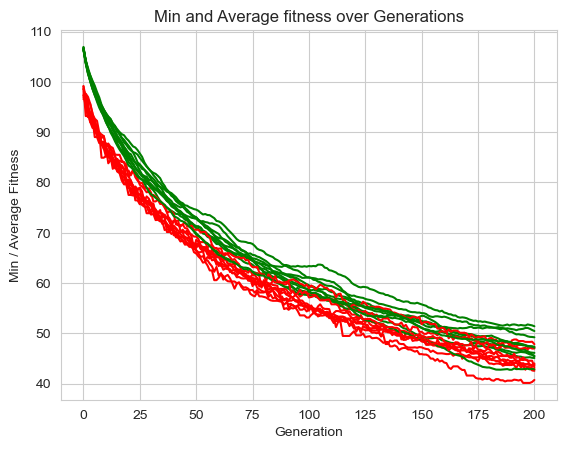

In [63]:
results_df = run_main(num_runs = 10, hall_of_fame = False, results_df=results_df)

## Best algorithm

Above is the best algorithm after testing different algorithms on 50 cities, we have scaled this back up to 200 cities

At the time of writing this, the inital algorithm had a average fitness of 89.414226, compared to now it has a average fitness of 47.8.

This shows the great returns we got on the algorithm. We managed to make it just about twice as efficent.

In [64]:
print(results_df)

    Avg Fitness Population Max Generations  P_Crossover  P_Mutation  \
0     89.489767        300             200          0.9        0.10   
1     22.677944         50             200          0.9        0.10   
2     14.425330         50             200          0.7        0.10   
3     15.605909        100             200          0.7        0.10   
4     17.951738         50             200          0.7        0.20   
5     18.429167        300             200          0.7        0.10   
6     24.710754        300             200          0.9        0.10   
7     11.470245        300             200          0.5        0.10   
8      9.908314       1000             200          0.4        0.10   
9      9.465736       1000             200          0.4        0.05   
10    11.078780        300             200          0.4        0.05   
11    10.628066        300             200          0.4        0.05   
12     8.938879        300             200          0.9        0.10   
13    

# Conclusion

The algorithms produced by the experiments that I conducted are good starting points for solving this TSP problem, but I believe many were limited by generation size and population size.
This led to me making more exploitative algorithms than explorative algorithms. I believe the initial algorithm is a good starting point as it is good at exploring but often isn't finding the best solutions - This would be fine if we had more generations and more intensive computing power.

 The problem with many of my algorithms is that I was focusing on performance in the context of only 200 generations. This meant I chose algorithms which resulted in the best score within this context but often these algorithms were exploitative and the performance of these algorithms suffered due to many of the individuals having similar genetics which means that algorithms result in lack of diversity. This results in stagnation when I choose algorithms based on fast performance.

If I were to do this experiment with more computational power I would have a greater population size such as > 10000 and have an algorithm which balances between searching at the beginning stage of the algorithm and in the later stages of the algorithm becomes more exploitative. That way there can be more diversity but also a more effective algorithm at minimising the fitness

One part of this assignment which I struggled with was choosing efficient mutation and crossover methods as many of them weren't meant for permutation problems such as TSP.  There are many crossover methods that can be done but not many are built into DEAP. Due to my limited knowledge on writing crossover methods and mutation methods I ended up only choosing those in DEAP, for this reason my algorithms lack diversity in the case of different crossover methods and mutation methods. Originally I had more methods but I realised that they were misleading as they broke the constraint of TSP, in which every city must appear only once.

To conclude, solving the TSP problem with Genetic Algorithms was challenging as the biggest challenge was balancing between exploitative and explorative. This was hard in the case of managing computational power.



